# Preprocessing
---

In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', None)

# df_연결[df_연결["회사명"].str.contains('인수목적')].index # 포함하는거 표시

In [2]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. 결산월 12월인 것만 선택
# : 전체 데이터 4963개 중에서 12월 결산인 데이터가 4836개이다. 나머지 결산월의 데이터가 전체의 2.5%로 데이터량이 작기도하고 결측치가 많아 제거
def func_yearin(x):
    if x[5:7] == '12':
        return True
    else:
        return False

# 3. 회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])

# 4. 연결, 개별재무제표 통합을 위해 연결재무 데이터 컬럼명 통일화 : "(IFRS연결)"제거
def func_replace_col1(x):
    x = x.replace(" ","")
    x = x.replace(",","")
    x = x.replace("(비교)","")
    return x.replace("(IFRS연결)","")

# 5. 연결, 개별재무제표 통합을 위해 개별재무 데이터 컬럼명 통일화 : "(IFRS)"제거
def func_replace_col2(x):
    x = x.replace(" ","")
    x = x.replace(",","")
    x = x.replace("(비교)","")
    return x.replace("(IFRS)","")

# 6. 2020년 raw data 제외
def func_rm_2020(x):
    if x[:4] == "2020":
        return False
    else:
        return True

# 7. True, False 반전
def func_not(x):
    return not x

---
## 주가 상승 확인

In [46]:
# df[df["회사명"]=="LG이노텍(주)"]
# (주)경인양행 2015-2016
# (주)금비 2014-2015
# LG이노텍(주) 2013-2014
# 기간 : 02.01 ~ 03.30

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/2190819290.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

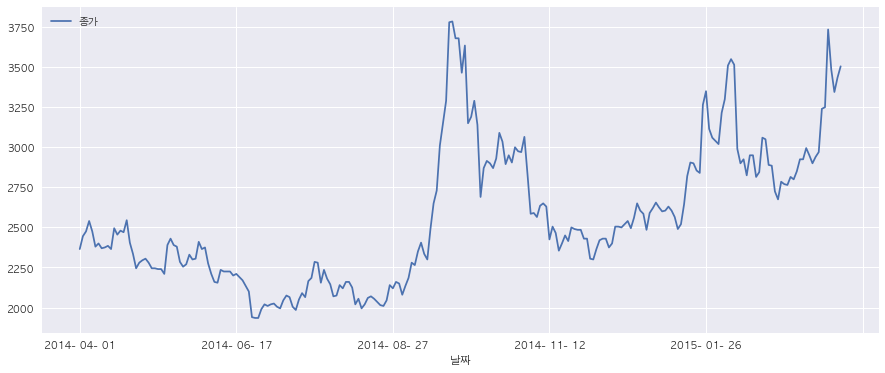

In [13]:
df_원익큐브 = pd.read_csv("./datasets/raw/주가상승확인/원익큐브_20140401.csv", index_col="날짜")
df_원익큐브.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_원익큐브["종가"] = df_원익큐브["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_원익큐브.plot(y = ['종가'], figsize = [15,6], grid = True)

In [17]:
(3505-2365)/2365

0.4820295983086681

In [16]:
df_원익큐브

,종가,오픈,고가,저가,거래량,변동 %
날짜,,,,,,
2014- 04- 01,2365,"2,410","2,420","2,340",172.17K,-1.66%
2014- 04- 02,2445,"2,435","2,475","2,375",331.89K,3.38%
2014- 04- 03,2475,"2,405","2,545","2,400",235.46K,1.23%
2014- 04- 04,2540,"2,465","2,560","2,465",302.27K,2.63%
2014- 04- 07,2475,"2,455","2,505","2,435",357.32K,-2.56%
...,...,...,...,...,...,...
2015- 03- 25,3735,"3,265","3,735","3,265",3.54M,14.92%
2015- 03- 26,3485,"3,670","3,830","3,410",2.67M,-6.69%
2015- 03- 27,3345,"3,570","3,615","3,180",2.92M,-4.02%


/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/1283740010.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

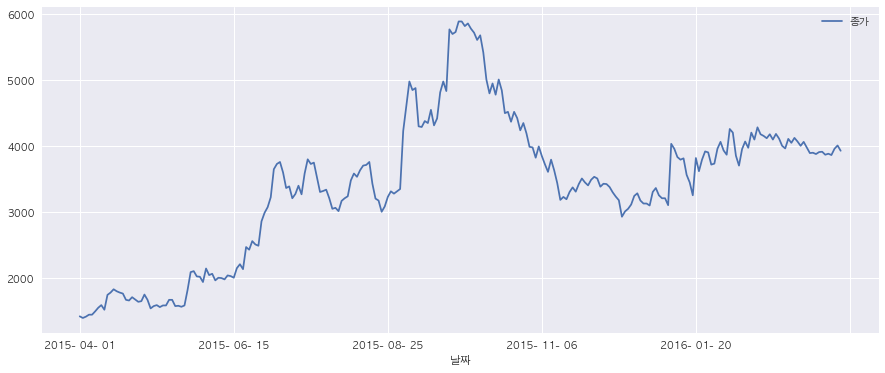

In [14]:
df_라온시큐어 = pd.read_csv("./datasets/raw/주가상승확인/라온시큐어_20140401.csv", index_col="날짜")
df_라온시큐어.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_라온시큐어["종가"] = df_라온시큐어["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_라온시큐어.plot(y = ['종가'], figsize = [15,6], grid = True)

In [97]:
(3930-1420)/1420

1.767605633802817

In [96]:
df_라온시큐어

,종가,오픈,고가,저가,거래량,변동 %
날짜,,,,,,
2015- 04- 01,1420,"1,390","1,445","1,385",402.41K,1.43%
2015- 04- 02,1395,"1,420","1,425","1,385",467.19K,-1.76%
2015- 04- 03,1415,"1,395","1,420","1,385",295.01K,1.43%
2015- 04- 06,1445,"1,440","1,465","1,420",741.13K,2.12%
2015- 04- 07,1445,"1,450","1,455","1,425",360.07K,0.00%
...,...,...,...,...,...,...
2016- 03- 25,3885,"3,880","3,925","3,855",307.41K,0.39%
2016- 03- 28,3865,"3,900","3,960","3,860",313.34K,-0.51%
2016- 03- 29,3960,"3,850","4,055","3,850",898.19K,2.46%


/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/757142729.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='날짜'>

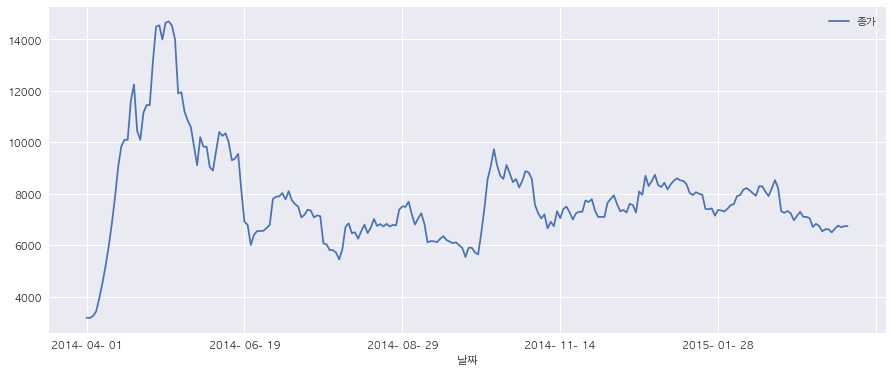

In [15]:
df_홈캐스트 = pd.read_csv("./datasets/raw/주가상승확인/홈캐스트_20140401.csv", index_col="날짜")
df_홈캐스트.sort_values(by="날짜", ascending=True, inplace=True)

def func_replace(x):
    return int(x.replace(",",""))

df_홈캐스트["종가"] = df_홈캐스트["종가"].map(func_replace)

import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_홈캐스트.plot(y = ['종가'], figsize = [15,6], grid = True)

---
## 재무데이터 전처리
- 연결재무제표, 별도재무재표, 추가변수, 시가총액 통합

### 1. 데이터 통합(연결,별도)

In [101]:
# 드랍해야하는 컬럼(중복) - 생산성
list_overlap1 = ['부가가치(IFRS연결)(백만원)', '종업원1인당 부가가치(IFRS연결)(백만원)', '총자본투자효율(IFRS연결)', '기계투자효율(IFRS연결)', '부가가치율(IFRS연결)']
list_overlap2 = ['부가가치(IFRS)(백만원)', '종업원1인당 부가가치(IFRS)(백만원)', '총자본투자효율(IFRS)', '기계투자효율(IFRS)', '부가가치율(IFRS)']

# 안쓰는 컬럼 - 부가,생산,성장,수익,안정,활동 나눠서 드랍하고 처음부터 다시!
# 1) 연결재무제표
list_drop_연결_부가가치1 = ['세금과공과(IFRS연결)(백만원)', "기계투자효율(IFRS연결)"]
list_drop_연결_성장성1 = ['비유동생물자산증가율(IFRS연결)', '투자부동산증가율(IFRS연결)',]
list_drop_연결_수익성1 = ['기타손익비률(IFRS연결)', '외환이익 대 매출액비율(IFRS연결)', '광고선전비 대 매출액비율(IFRS연결)', '세금과공과 대 세금과공과 차감전순이익률(IFRS연결)', '세금과공과 대 총비용비율(IFRS연결)', '감가상각비 대 총비용비율(IFRS연결)',
                    '감가상각률(IFRS연결)', '누적감가상각률(IFRS연결)', '1주당매출액(IFRS연결)(원)', '1주당순이익(IFRS연결)(원)', '1주당 CASH FLOW(IFRS연결)(원)', '1주당정상영업이익(IFRS연결)(원)',]
list_drop_연결_안정성1 = ['비유동비율(IFRS연결)','비유동장기적합률(IFRS연결)','매출채권 대 매입채무비율(IFRS연결)','매출채권 대 상,제품비율(IFRS연결)', '부채비율(IFRS연결)','단기차입금 대 총차입금비율(IFRS연결)','유보액대비율(IFRS연결)','유보액 대 납입자본배율(IFRS연결)',
                    '유동자산집중도(IFRS연결)','비유동자산집중도(IFRS연결)','투자집중도(IFRS연결)', '정상영업이익대비이자보상배율(IFRS연결)', '이자보상배율(순금융비용)(IFRS연결)']
list_drop_연결_활동성1 = ['경영자본회전률(IFRS연결)','상품,제품회전률(IFRS연결)','원,부재료회전률(IFRS연결)','재공품회전률(IFRS연결)']
# 2) 개별재무제표
list_drop_별도_부가가치2 = ['세금과공과(IFRS)(백만원)', "기계투자효율(IFRS)"]
list_drop_별도_성장성2 = ['비유동생물자산증가율(IFRS)', '투자부동산증가율(IFRS)',]
list_drop_별도_수익성2 = ['기타손익비률(IFRS)', '외환이익 대 매출액비율(IFRS)', '광고선전비 대 매출액비율(IFRS)', '세금과공과 대 세금과공과 차감전순이익률(IFRS)', '세금과공과 대 총비용비율(IFRS)', '감가상각비 대 총비용비율(IFRS)',
                    '감가상각률(IFRS)', '누적감가상각률(IFRS)', '1주당매출액(IFRS)(원)', '1주당순이익(IFRS)(원)', '1주당 CASH FLOW(IFRS)(원)', '1주당정상영업이익(IFRS)(원)',]
list_drop_별도_안정성2 = ['비유동비율(IFRS)','비유동장기적합률(IFRS)','매출채권 대 매입채무비율(IFRS)','매출채권 대 상,제품비율(IFRS)', '부채비율(IFRS)','단기차입금 대 총차입금비율(IFRS)','유보액대비율(IFRS)','유보액 대 납입자본배율(IFRS)',
                    '유동자산집중도(IFRS)','비유동자산집중도(IFRS)','투자집중도(IFRS)', '정상영업이익대비이자보상배율(IFRS)', '이자보상배율(순금융비용)(IFRS)']
list_drop_별도_활동성2 = ['경영자본회전률(IFRS)','상품,제품회전률(IFRS)','원,부재료회전률(IFRS)','재공품회전률(IFRS)']
# drop column(2차)
list_col_drop = ['임차료(백만원)','총자본투자효율', '부가가치율', '설비투자효율', '노동소득분배율', '자본분배율', '이윤분배율','정상영업이익증가율', '총포괄이익증가율', '매출액정상영업이익률',
    '총자본정상영업이익률', '자기자본정상영업이익률', '경영자본정상영업이익률', '자본금정상영업이익률', '수지비율(관계기업투자손익제외)', 'R&D투자효율','적립금비율(재정비율)', '당좌자산구성비율',
    '비유동자산구성비율','당좌비율', '재고자산대순운전자본비율', '유동부채비율', '비유동부채비율', '비유동부채대순운전자본비율', 'CASHFLOW대부채비율', 'CASHFLOW대차입금비율', 'CASHFLOW대총자본비율',
    'CASHFLOW대매출액비율', '매입채무회전기간', '재고자산회전기간', '매출채권회전기간', '종업원1인당정상영업이익(백만원)', '1회전기간', '종업원1인당부가가치(백만원)', '종업원1인당매출액(백만원)',
    '종업원1인당정상영업이익(백만원)', '종업원1인당순이익(백만원)', '종업원1인당인건비(백만원)', '노동장비율', '기계장비율', '자본집약도', '종업원1인당부가가치증가율', '종업원1인당매출액증가율', '종업원1인당인건비증가율']

In [102]:
df_연결_부가가치 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_부가가치.xlsx")
df_연결_생산성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_생산성.xlsx")
df_연결_성장성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_성장성.xlsx")
df_연결_수익성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_수익성.xlsx")
df_연결_안정성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_안정성.xlsx")
df_연결_활동성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_활동성.xlsx")
df_연결_부가가치.drop(list_drop_연결_부가가치1, axis=1, inplace=True)
df_연결_생산성 = df_연결_생산성.drop(list_overlap1, axis=1)
df_연결_성장성.drop(list_drop_연결_성장성1, axis=1, inplace=True)
df_연결_수익성.drop(list_drop_연결_수익성1, axis=1, inplace=True)
df_연결_안정성.drop(list_drop_연결_안정성1, axis=1, inplace=True)
df_연결_활동성.drop(list_drop_연결_활동성1, axis=1, inplace=True)

df_사업보고서_연결 = pd.merge(df_연결_부가가치, df_연결_생산성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_성장성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_수익성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_안정성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_연결 = pd.merge(df_사업보고서_연결, df_연결_활동성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_연결["거래소코드"] = df_사업보고서_연결["거래소코드"].map(padding) # 거래소코드 padding
df_사업보고서_연결 = df_사업보고서_연결[df_사업보고서_연결["회계년도"].map(func_yearin)] # 12월 결산 기업만
df_사업보고서_연결["회계년도"] = df_사업보고서_연결["회계년도"].map(change_year) # 년도만 표시

list_col = list() # 컬럼명에서 "IFRS연결", " ", "," 제거
for i in list(df_사업보고서_연결.columns):
    list_col.append(func_replace_col1(i))
df_사업보고서_연결.columns = list_col

df_사업보고서_연결.drop(list_col_drop, axis=1, inplace=True)
df_사업보고서_연결.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_사업보고서_연결.reset_index(drop=True, inplace=True)

df_사업보고서_연결.to_csv("./datasets/raw/사업보고서/사업보고서_연결.csv")
df_사업보고서_연결.shape

(19145, 69)

In [103]:
df_별도_부가가치 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_부가가치.xlsx")
df_별도_생산성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_생산성.xlsx")
df_별도_성장성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_성장성.xlsx")
df_별도_수익성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_수익성.xlsx")
df_별도_안정성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_안정성.xlsx")
df_별도_활동성 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_활동성.xlsx")
df_별도_부가가치.drop(list_drop_별도_부가가치2, axis=1, inplace=True)
df_별도_생산성 = df_별도_생산성.drop(list_overlap2, axis=1)
df_별도_성장성.drop(list_drop_별도_성장성2, axis=1, inplace=True)
df_별도_수익성.drop(list_drop_별도_수익성2, axis=1, inplace=True)
df_별도_안정성.drop(list_drop_별도_안정성2, axis=1, inplace=True)
df_별도_활동성.drop(list_drop_별도_활동성2, axis=1, inplace=True)

df_사업보고서_별도 = pd.merge(df_별도_부가가치, df_별도_생산성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_성장성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_수익성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_안정성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_별도 = pd.merge(df_사업보고서_별도, df_별도_활동성, on=["회사명","거래소코드","회계년도"], how = 'inner')
df_사업보고서_별도 = df_사업보고서_별도[df_사업보고서_별도["회계년도"].map(func_rm_2020)]
df_사업보고서_별도["거래소코드"] = df_사업보고서_별도["거래소코드"].map(padding)
df_사업보고서_별도 = df_사업보고서_별도[df_사업보고서_별도["회계년도"].map(func_yearin)]
df_사업보고서_별도["회계년도"] = df_사업보고서_별도["회계년도"].map(change_year)

list_col = list() # 컬럼명에서 "IFRS", " ", "," 제거
for i in list(df_사업보고서_별도.columns):
    list_col.append(func_replace_col2(i))
df_사업보고서_별도.columns = list_col

df_사업보고서_별도.drop(list_col_drop, axis=1, inplace=True)
df_사업보고서_별도.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_사업보고서_별도.reset_index(drop=True, inplace=True)

df_사업보고서_별도.to_csv("./datasets/raw/사업보고서/사업보고서_별도.csv")
df_사업보고서_별도.shape

(19145, 69)

### 2. 연결재무데이터 결측치 확인

In [37]:
df_연결 = pd.read_csv("./datasets/raw/사업보고서/사업보고서_연결.csv", index_col=0)
df_연결.reset_index(drop=True, inplace=True)
df_연결["거래소코드"] = df_연결["거래소코드"].map(padding)
df_연결
# df_연결["거래소코드"].value_counts() # 거래소코드 + 회계년도 중복인거 확인

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),종업원수,총자본증가율,...,타인자본회전률,매입채무회전률,유동자산회전률,당좌자산회전률,재고자산회전률,매출채권회전률,비유동자산회전률,유형자산회전율,순운전자본회전률,운전자본회전률
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,1344.09,NaN,1.98,...,2.01,11.95,1.25,1.55,6.42,2.45,1.38,1.77,0.86,0.00
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,1404.34,NaN,109.15,...,0.93,7.83,0.52,0.57,5.71,1.85,1.48,1.71,0.42,0.00
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,1116.14,NaN,-2.09,...,1.26,6.20,0.48,0.52,5.39,2.07,1.47,2.03,0.42,0.79
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,1464.84,NaN,3.86,...,2.85,5.27,0.68,0.80,4.77,1.86,0.96,1.54,0.56,0.74
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,1890.05,NaN,-2.64,...,2.88,5.66,0.99,1.22,5.22,2.10,0.90,1.48,0.75,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,흥아해운(주),003280,2015,103792.31,13509.26,52570.08,18751.33,18964.51,NaN,21.93,...,1.54,16.05,5.83,6.38,68.48,25.33,1.47,2.09,2.15,0.01
19141,흥아해운(주),003280,2016,105291.39,-16576.37,70010.36,26701.98,25157.71,NaN,21.08,...,1.20,16.26,6.98,7.96,56.47,25.24,1.10,1.44,2.19,0.02
19142,흥아해운(주),003280,2017,46072.27,-72565.48,60440.89,30688.04,27508.83,NaN,-11.43,...,1.12,15.39,7.68,9.30,44.09,23.08,1.05,1.36,2.09,0.02
19143,흥아해운(주),003280,2018,34054.90,-91209.02,68757.28,32180.14,24326.58,NaN,-5.33,...,1.03,11.87,6.73,8.14,38.87,19.15,1.06,1.43,1.75,0.02


외국계기업 제거

In [38]:
def func_isnt_fcompany(x):
    if x[:1] == '9':
        return False
    else:
        return True

print("제거할 외국계기업 데이터 수 : ", len(df_연결[df_연결["거래소코드"].map(func_isnt_fcompany).map(func_not)]))
df_연결 = df_연결[df_연결["거래소코드"].map(func_isnt_fcompany)]
df_연결.shape # 외국계기업 데이터 140개 제거

제거할 외국계기업 데이터 수 :  140


(19005, 69)

거래소 코드가 2개인 기업(26개)과 기업명이 2개인 거래소 코드가 존재

In [39]:
print("회사수 : ", len(df_연결["회사명"].unique()))
print("거래소코드수 : ", len(df_연결["거래소코드"].unique()))
# 25개 차이

회사수 :  2478
거래소코드수 :  2504


 - 거래소코드 중복기업 전처리(최신 거래소코드의 데이터만 남긴다)

In [40]:
list_overlap_code = list()
for i in list(df_연결["회사명"].unique()):
    if len(df_연결[df_연결["회사명"]==i]["거래소코드"].unique()) > 1:
        list_overlap_code.append(i)
print("거래소코드가 2개인 기업 수", len(list_overlap_code), "개")
# list_overlap_code

거래소코드가 2개인 기업 수 26 개


In [41]:
# 거래소코드 2개인 기업 리스트
list_overlap_code

['(주)본느',
 '(주)세화피앤씨',
 '(주)신성이엔지',
 '(주)아이엘사이언스',
 '(주)알로이스',
 '(주)에스에이티',
 '(주)엔케이맥스',
 '(주)원바이오젠',
 '(주)원익피앤이',
 '(주)인산가',
 '(주)자비스',
 '(주)정다운',
 '(주)카이노스메드',
 '(주)티에스트릴리온',
 '(주)판타지오',
 '(주)포인트엔지니어링',
 '(주)한국비엔씨',
 '나무기술(주)',
 '삼성물산(주)',
 '소프트캠프(주)',
 '씨아이에스(주)',
 '에스케이(주)',
 '엠에프엠코리아(주)',
 '원텍(주)',
 '줌인터넷(주)',
 '패션플랫폼(주)']

In [42]:
# 중복 거래소코드 제거
def func_overlap_code(x):
    if x == (df_연결[df_연결["회사명"]==company_name]["거래소코드"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_연결["회사명"].unique())
dfs = list()
for i in list_companyname:
    company_name = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_연결[df_연결["회사명"]==i]
    df_concat = df_concat[df_concat["거래소코드"].map(func_overlap_code)] # 거래소코드 바뀌기 전의 거래소코드의 데이터는 삭제
    dfs.append(df_concat)
df_연결 = pd.concat(dfs)
df_연결.reset_index(drop=True, inplace=True)

 - 회사명 중복기업 전처리(최신 회사명의 데이터만 남긴다) -> 없었음

In [43]:
# 회사명이 2개인 거래소코드 존재 확인 - 엄슴
list_overlap_code = list()
for i in list(df_연결["거래소코드"].unique()):
    if len(df_연결[df_연결["거래소코드"]==i]["회사명"].unique()) > 1:
        list_overlap_code.append(i)
list_overlap_code

[]

In [44]:
# 중복 회사명 제거
def func_overlap_code(x):
    if x == (df_연결[df_연결["거래소코드"]==company_code]["회사명"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_연결["거래소코드"].unique())
dfs = list()
for i in list_companyname:
    company_code = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_연결[df_연결["거래소코드"]==i]
    df_concat = df_concat[df_concat["회사명"].map(func_overlap_code)] # 회사명 바뀌기 전의 회사명의 데이터는 삭제
    dfs.append(df_concat)
df_연결 = pd.concat(dfs)
df_연결.reset_index(drop=True, inplace=True)

In [45]:
df_연결.shape # 19005개 -> 18877

(18877, 69)

스팩주 확인
- 직접 and 코드로 찾아본 결과 없었음
- 결측치데이터는 drop되어 다 누락된 것으로 예상

In [46]:
# 리스트 뽑아서 성연이형이 직접 확인
a = pd.DataFrame(df_연결["회사명"].unique())
# a.to_excel("./datasets/스팩주확인.xlsx")

In [47]:
df_연결[df_연결["회사명"].str.contains('인수목적')].index # spac회사 확인

Int64Index([], dtype='int64')

In [48]:
len(df_연결["거래소코드"].unique())

2478

결측치 확인!

In [49]:
df_연결.shape

(18877, 69)

In [50]:
df_연결.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 6077,
 '법인세비용차감전(계속사업)손익(백만원)': 6077,
 '인건비(백만원)': 6077,
 '금융비용(백만원)': 6077,
 '감가상각비(백만원)': 6077,
 '종업원수': 18877,
 '총자본증가율': 6077,
 '유형자산증가율': 6077,
 '비유동자산증가율': 6077,
 '유동자산증가율': 6077,
 '재고자산증가율': 6077,
 '자기자본증가율': 6077,
 '매출액증가율': 6077,
 '순이익증가율': 6077,
 '종업원수증가율': 18877,
 '매출액총이익률': 6077,
 '매출액순이익률': 6077,
 '총자본사업이익률': 6077,
 '총자본순이익률': 6077,
 '자기자본순이익률': 6077,
 '경영자본순이익률': 6077,
 '자본금순이익률': 6077,
 '매출원가대매출액비율': 6077,
 '영업비용대영업수익비율': 6077,
 '금융손익비율': 6077,
 '금융비용부담률': 6077,
 '기업순이익률': 6077,
 '인건비대총비용비율': 6077,
 '금융비용대총비용비율': 6077,
 '이자부담률': 6077,
 '지급이자율': 6077,
 '차입금평균이자율': 6077,
 '유보율': 6077,
 '사내유보율': 18877,
 '사내유보대자기자본비율': 18877,
 '평균배당률': 18877,
 '자기자본배당률': 18877,
 '배당성향': 18877,
 '1주당순자산(원)': 18877,
 '유동자산구성비율': 6077,
 '재고자산대유동자산비율': 6077,
 '유동자산대비유동자산비율': 6077,
 '자기자본구성비율': 6077,
 '타인자본구성비율': 6077,
 '자기자본배율': 6077,
 '유동비율': 6077,
 '현금비율': 6077,
 '매출채권비율': 6077,
 '매입채무대재고자산비율': 6077,
 '순운전자본비율': 6077,
 '차입금의존도': 6077,
 '차입금비율':

In [51]:
# df_연결.isna().sum().to_dict()
na_1 = int(list(df_연결.isna().sum().to_dict().values()).count(0))
na_2 = int(list(df_연결.isna().sum().to_dict().values()).count(18877)) # 데이터 하나도 없는 컬럼!
na_3 = int(list(df_연결.isna().sum().to_dict().values()).count(6077)) # 데이터 하나도 없는 기업&회계년도 데이터
print("전체컬럼수 :", len(list(df_연결.isna().sum().to_dict().values())))
print("1) 인덱스컬럼수 : ", na_1)
print("2) 데이터 하나도 없는 컬럼수 : ", na_2)
print("3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 : ", na_3)
print(" -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재")


# df_연결.isna().sum().to_dict()
# 2) 데이터 하나도 없는 컬럼 리스트 : 8개
list_na_col = ['배당성향', '종업원수', '종업원수증가율', '사내유보율', '사내유보대자기자본비율', '평균배당률', '자기자본배당률', '1주당순자산(원)']

# 대표적으로 "배당성향" 컬럼이 연결재무제표 데이터에 없다.
# 그 이유는 ts2000이 "한국거래소 배당성향 계산 기준"인 별도 재무제표 기준으로 계산하기 떄문.

# ts2000의 배당성향과 naver 기준 배당성향이 다른데 ts2000은 한국거래소 기준으로 별도 재무제표 기준으로 계산하고있어 그에 따른 수치이고 
# Naver는 금감원기준으로 연결 재무제표 기준으로 계산하고 있어 두 곳의 값이 다른걸 확인했다. 따라서 우리는 한국거래소기준으로 배당성향을 사용함을 확인.
# 나머지 7개 컬럼도 이와 같은 이유로 개별재무제표에서만 계산되기에 연결재무제표 데이터에서 누락됐을 것이라 예상.

전체컬럼수 : 69
1) 인덱스컬럼수 :  3
2) 데이터 하나도 없는 컬럼수 :  8
3) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 :  58
 -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재


### 3. 별도재무데이터로 결측치 대체(데이터 하나도 없는 컬럼)

In [52]:
# 개별재무제표 데이터 불러오기
df_별도 = pd.read_csv("./datasets/raw/사업보고서/사업보고서_별도.csv", index_col=0)
df_별도["거래소코드"] = df_별도["거래소코드"].map(padding)
df_별도.shape

(19145, 69)

In [53]:
# 중복 거래소코드 제거
def func_overlap_code(x):
    if x == (df_별도[df_별도["회사명"]==company_name]["거래소코드"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_별도["회사명"].unique())
dfs = list()
for i in list_companyname:
    company_name = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_별도[df_별도["회사명"]==i]
    df_concat = df_concat[df_concat["거래소코드"].map(func_overlap_code)] # 거래소코드 바뀌기 전의 거래소코드의 데이터는 삭제
    dfs.append(df_concat)
df_별도 = pd.concat(dfs)
df_별도.reset_index(drop=True, inplace=True)

In [54]:
# 중복 회사명 제거
def func_overlap_code(x):
    if x == (df_별도[df_별도["거래소코드"]==company_code]["회사명"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df_별도["거래소코드"].unique())
dfs = list()
for i in list_companyname:
    company_code = i
    #각 기업별로 데이터프레임 생성
    df_concat = df_별도[df_별도["거래소코드"]==i]
    df_concat = df_concat[df_concat["회사명"].map(func_overlap_code)] # 회사명 바뀌기 전의 회사명의 데이터는 삭제
    dfs.append(df_concat)
df_별도 = pd.concat(dfs)
df_별도.reset_index(drop=True, inplace=True)

In [55]:
df_별도["회사명"].value_counts()

(주)CMG제약         9
(주)휴먼엔           9
(주)휴맥스           9
(주)휴니드테크놀러지스     9
(주)휠라홀딩스         9
                ..
(주)티브로드도봉강북방송    1
(주)티브로드한빛방송      1
풍림산업(주)          1
(주)소마젠           1
에스에스씨피(주)        1
Name: 회사명, Length: 2506, dtype: int64

In [56]:
# df_연결에서 데이터가 하나도 없는 컬럼을 개별재무데이터로 대체한 "df_재무" 생성
df_재무 = df_연결.copy()
df_재무 = df_재무.drop(list_na_col, axis=1)
df_재무.reset_index(drop=True, inplace=True)
df_별도_대체 = df_별도[["거래소코드","회계년도"]+list_na_col]
df_별도_대체.reset_index(drop=True, inplace=True)

df_재무 = pd.merge(df_재무, df_별도_대체, on=["거래소코드","회계년도"], how = 'left')
df_재무.shape

(18877, 69)

In [57]:
df_재무.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 6077,
 '법인세비용차감전(계속사업)손익(백만원)': 6077,
 '인건비(백만원)': 6077,
 '금융비용(백만원)': 6077,
 '감가상각비(백만원)': 6077,
 '총자본증가율': 6077,
 '유형자산증가율': 6077,
 '비유동자산증가율': 6077,
 '유동자산증가율': 6077,
 '재고자산증가율': 6077,
 '자기자본증가율': 6077,
 '매출액증가율': 6077,
 '순이익증가율': 6077,
 '매출액총이익률': 6077,
 '매출액순이익률': 6077,
 '총자본사업이익률': 6077,
 '총자본순이익률': 6077,
 '자기자본순이익률': 6077,
 '경영자본순이익률': 6077,
 '자본금순이익률': 6077,
 '매출원가대매출액비율': 6077,
 '영업비용대영업수익비율': 6077,
 '금융손익비율': 6077,
 '금융비용부담률': 6077,
 '기업순이익률': 6077,
 '인건비대총비용비율': 6077,
 '금융비용대총비용비율': 6077,
 '이자부담률': 6077,
 '지급이자율': 6077,
 '차입금평균이자율': 6077,
 '유보율': 6077,
 '유동자산구성비율': 6077,
 '재고자산대유동자산비율': 6077,
 '유동자산대비유동자산비율': 6077,
 '자기자본구성비율': 6077,
 '타인자본구성비율': 6077,
 '자기자본배율': 6077,
 '유동비율': 6077,
 '현금비율': 6077,
 '매출채권비율': 6077,
 '매입채무대재고자산비율': 6077,
 '순운전자본비율': 6077,
 '차입금의존도': 6077,
 '차입금비율': 6077,
 '이자보상배율(이자비용)': 6077,
 '총자본회전률': 6077,
 '자기자본회전률': 6077,
 '자본금회전률': 6077,
 '타인자본회전률': 6077,
 '매입채무회전률': 6077,
 '유동자산회전률': 6077,
 '당좌자산회전률': 

### 4. 별도재무데이터로 결측치 대체(데이터 하나도 없는 행)

In [58]:
# df_재무를 완전데이터와 결측데이터로 나눈 뒤 결측데이터를 개별재무데이터로 대체시키고, df_재무로 다시 통합하면 끝!
df_재무_완전 = df_재무[df_재무["총자본증가율"].isna().map(func_not)]
# df_재무_완전

df_재무_결측 = df_재무[df_재무["총자본증가율"].isna()]
df_재무_결측

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),총자본증가율,유형자산증가율,...,순운전자본회전률,운전자본회전률,배당성향,종업원수,종업원수증가율,사내유보율,사내유보대자기자본비율,평균배당률,자기자본배당률,1주당순자산(원)
63,(주)SNT에너지,100840,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,184.0,2.22,0.0,76.67,0.00,0.00,22041.59
64,(주)SNT에너지,100840,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.59,195.0,5.98,0.0,72.32,40.00,0.77,25109.67
65,(주)SNT에너지,100840,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.13,209.0,7.18,0.0,74.22,60.00,1.07,27059.53
66,(주)SNT에너지,100840,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31.45,218.0,4.31,0.0,75.09,0.00,1.71,28251.49
67,(주)SNT에너지,100840,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.11,232.0,6.42,0.0,77.63,0.00,1.53,31655.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,흥구석유(주),024060,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.68,99.0,-8.33,0.0,44.07,77.55,1.70,4467.15
18864,흥구석유(주),024060,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,66.77,96.0,-3.03,0.0,44.84,96.94,2.10,4511.11
18865,흥구석유(주),024060,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70.43,93.0,-3.13,0.0,45.23,96.94,2.08,4549.57
18866,흥구석유(주),024060,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73.63,84.0,-9.68,0.0,45.83,116.33,2.48,4576.04


In [59]:
# 행전체가 결측치인 것 중 개별재무 데이터로 대체한 컬럼 말고 나머지 결측치 컬럼 리스트(58개))
list_na_col2 = ['부가가치(백만원)', '법인세비용차감전(계속사업)손익(백만원)', '인건비(백만원)', '금융비용(백만원)', '감가상각비(백만원)', '총자본증가율', '유형자산증가율', '비유동자산증가율',
    '유동자산증가율', '재고자산증가율', '자기자본증가율', '매출액증가율', '순이익증가율', '매출액총이익률', '매출액순이익률', '총자본사업이익률', '총자본순이익률', '자기자본순이익률',
    '경영자본순이익률', '자본금순이익률', '매출원가대매출액비율', '영업비용대영업수익비율', '금융손익비율', '금융비용부담률', '기업순이익률', '인건비대총비용비율', '금융비용대총비용비율',
    '이자부담률', '지급이자율', '차입금평균이자율', '유보율', '유동자산구성비율', '재고자산대유동자산비율', '유동자산대비유동자산비율', '자기자본구성비율', '타인자본구성비율', '자기자본배율',
    '유동비율', '현금비율', '매출채권비율', '매입채무대재고자산비율', '순운전자본비율', '차입금의존도', '차입금비율', '이자보상배율(이자비용)', '총자본회전률', '자기자본회전률',
    '자본금회전률', '타인자본회전률', '매입채무회전률', '유동자산회전률', '당좌자산회전률', '재고자산회전률', '매출채권회전률', '비유동자산회전률', '유형자산회전율', '순운전자본회전률', '운전자본회전률']

df_재무_결측 = df_재무_결측.drop(list_na_col2, axis=1)
df_재무_결측 = pd.merge(df_재무_결측, df_별도[["거래소코드","회계년도"]+list_na_col2], on=["거래소코드","회계년도"], how = 'left')
# df_재무_결측

In [60]:
df_재무 = pd.concat([df_재무_완전,df_재무_결측], axis=0)
# df_재무

In [61]:
df_재무.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 1939,
 '법인세비용차감전(계속사업)손익(백만원)': 1939,
 '인건비(백만원)': 1939,
 '금융비용(백만원)': 1939,
 '감가상각비(백만원)': 1939,
 '총자본증가율': 1939,
 '유형자산증가율': 1939,
 '비유동자산증가율': 1939,
 '유동자산증가율': 1939,
 '재고자산증가율': 1939,
 '자기자본증가율': 1939,
 '매출액증가율': 1939,
 '순이익증가율': 1939,
 '매출액총이익률': 1939,
 '매출액순이익률': 1939,
 '총자본사업이익률': 1939,
 '총자본순이익률': 1939,
 '자기자본순이익률': 1939,
 '경영자본순이익률': 1939,
 '자본금순이익률': 1939,
 '매출원가대매출액비율': 1939,
 '영업비용대영업수익비율': 1939,
 '금융손익비율': 1939,
 '금융비용부담률': 1939,
 '기업순이익률': 1939,
 '인건비대총비용비율': 1939,
 '금융비용대총비용비율': 1939,
 '이자부담률': 1939,
 '지급이자율': 1939,
 '차입금평균이자율': 1939,
 '유보율': 1939,
 '유동자산구성비율': 1939,
 '재고자산대유동자산비율': 1939,
 '유동자산대비유동자산비율': 1939,
 '자기자본구성비율': 1939,
 '타인자본구성비율': 1939,
 '자기자본배율': 1939,
 '유동비율': 1939,
 '현금비율': 1939,
 '매출채권비율': 1939,
 '매입채무대재고자산비율': 1939,
 '순운전자본비율': 1939,
 '차입금의존도': 1939,
 '차입금비율': 1939,
 '이자보상배율(이자비용)': 1939,
 '총자본회전률': 1939,
 '자기자본회전률': 1939,
 '자본금회전률': 1939,
 '타인자본회전률': 1939,
 '매입채무회전률': 1939,
 '유동자산회전률': 1939,
 '당좌자산회전률': 

In [62]:
print("제거행 갯수 : ", len(df_재무[df_재무["종업원수"].isna()]))
print("제거기업 갯수 : ", len(list(df_재무[df_재무["종업원수"].isna()]["거래소코드"].unique())))
# 737개 기업의 어떤 년도에는 재무,별도 데이터 둘 다 없는 컬럼이 존재하기에 해당 연도 데이터 제거!(1948행)
# 데이터 누락된 사유 : "필수 공시 지표가 아닌 지표는 누락되어 데이터 존재x" 또는 "비상장기업(이었던 기업) 데이터"

제거행 갯수 :  1949
제거기업 갯수 :  738


In [63]:
df_재무 = df_재무[df_재무["종업원수"].isna().map(func_not)] # 위 결측치 없는 데이터로 필터링
df_재무

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),총자본증가율,유형자산증가율,...,순운전자본회전률,운전자본회전률,배당성향,종업원수,종업원수증가율,사내유보율,사내유보대자기자본비율,평균배당률,자기자본배당률,1주당순자산(원)
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,1344.09,1.98,-5.90,...,0.86,0.00,0.00,135.0,4.65,0.0,-245.87,0.00,0.00,386.51
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,1404.34,109.15,-4.12,...,0.42,0.00,0.00,134.0,-0.74,0.0,-165.71,0.00,0.00,643.72
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,1116.14,-2.09,16.09,...,0.42,0.79,0.00,136.0,1.49,0.0,-106.33,0.00,0.00,492.83
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,1464.84,3.86,74.30,...,0.56,0.74,0.00,164.0,20.59,0.0,-106.65,0.00,0.00,447.56
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,1890.05,-2.64,-5.37,...,0.75,0.60,0.00,156.0,-4.88,0.0,-120.22,0.00,0.00,397.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6072,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,393.85,12.89,-0.74,...,8.87,0.00,39.68,99.0,-8.33,0.0,44.07,77.55,1.70,4467.15
6073,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,384.73,1.39,-5.61,...,8.24,0.00,66.77,96.0,-3.03,0.0,44.84,96.94,2.10,4511.11
6074,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,396.07,0.98,-0.56,...,7.20,0.00,70.43,93.0,-3.13,0.0,45.23,96.94,2.08,4549.57
6075,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,359.35,-5.89,-0.36,...,8.08,0.00,73.63,84.0,-9.68,0.0,45.83,116.33,2.48,4576.04


In [64]:
df_재무.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '감가상각비(백만원)': 0,
 '총자본증가율': 0,
 '유형자산증가율': 0,
 '비유동자산증가율': 0,
 '유동자산증가율': 0,
 '재고자산증가율': 0,
 '자기자본증가율': 0,
 '매출액증가율': 0,
 '순이익증가율': 0,
 '매출액총이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본순이익률': 0,
 '자기자본순이익률': 0,
 '경영자본순이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '인건비대총비용비율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '매입채무대재고자산비율': 0,
 '순운전자본비율': 0,
 '차입금의존도': 0,
 '차입금비율': 0,
 '이자보상배율(이자비용)': 0,
 '총자본회전률': 0,
 '자기자본회전률': 0,
 '자본금회전률': 0,
 '타인자본회전률': 0,
 '매입채무회전률': 0,
 '유동자산회전률': 0,
 '당좌자산회전률': 0,
 '재고자산회전률': 0,
 '매출채권회전률': 0,
 '비유동자산회전률': 0,
 '유형자산회전율': 0,
 '순운전자본회전률': 0,
 '운전자본회전률': 0,
 '배당성향': 0,
 '종업원수': 0,
 '종업원수증가율': 0,
 '사내유보율': 0,
 '사내유보

### 5. 추가변수 전처리 - 데이터 결측치 대체(별도로)

In [65]:
df_연결_추가변수 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_연결/연결_추가변수.xlsx") # 32개 컬럼 추가
df_연결_추가변수["거래소코드"] = df_연결_추가변수["거래소코드"].map(padding) # 거래소코드 padding
df_연결_추가변수 = df_연결_추가변수[df_연결_추가변수["회계년도"].map(func_yearin)] # 12월 결산 기업만
df_연결_추가변수["회계년도"] = df_연결_추가변수["회계년도"].map(change_year) # 년도만 표시

list_col = list() # 컬럼명에서 "IFRS연결", " ", "," 제거
for i in list(df_연결_추가변수.columns):
    list_col.append(func_replace_col1(i))
df_연결_추가변수.columns = list_col

df_연결_추가변수["외국인_주식분포비율"] = df_연결_추가변수["외국인_주식분포비율"].fillna(0) # 상장, 비상장 기업에 결측치 존재. 비상장기업의 경우 나중에 시가총액 데이터와 결합할 때 필터링되어 삭제. 상장기업의 결측치는 실제 0이라는 의미라 0으로 대체
df_연결_추가변수["보통주배당금_현금(천원)"] = df_연결_추가변수["보통주배당금_현금(천원)"].fillna(0) # 결측치 값은 배당을 안했다는 의미라 0으로 대체
df_연결_추가변수["우선주배당금_현금(천원)"] = df_연결_추가변수["우선주배당금_현금(천원)"].fillna(0)
df_연결_추가변수["배당금(총합)_현금(천원)"] = df_연결_추가변수["보통주배당금_현금(천원)"] + df_연결_추가변수["우선주배당금_현금(천원)"]

df_연결_추가변수.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_연결_추가변수.reset_index(drop=True, inplace=True)
df_연결_추가변수

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원)
0,(주)CMG제약,058820,2011,0.0,27305.0,-1508.0,1152.0,-2560.0,-1773.0,3039.0,...,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,10326.0,0.0
1,(주)CMG제약,058820,2012,0.0,57108.0,-6660.0,4674.0,-1573.0,-30266.0,35361.0,...,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,11387.0,0.0
2,(주)CMG제약,058820,2013,0.0,55913.0,296.0,21705.0,-3939.0,21135.0,-157.0,...,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,12507.0,0.0
3,(주)CMG제약,058820,2014,0.0,58068.0,158.0,8827.0,725.0,-13611.0,5.0,...,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,14318.0,0.0
4,(주)CMG제약,058820,2015,0.0,56533.0,-3650.0,2566.0,2411.0,-8671.0,0.0,...,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,17238.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,흥아해운(주),003280,2015,64641.0,791641.0,10517.0,20371.0,33913.0,-601.0,-29516.0,...,0.0,618564.0,300.0,0.0,15000.0,229502.0,0.0,33.91,792690.0,584594.0
19141,흥아해운(주),003280,2016,46829.0,958532.0,-17173.0,14116.0,-1390.0,-14735.0,10295.0,...,0.0,766045.0,646.0,0.0,25800.0,380300.0,0.0,26.52,794370.0,632567.0
19142,흥아해운(주),003280,2017,37958.0,873409.0,-61992.0,19970.0,-6892.0,-2001.0,14484.0,...,0.0,737426.0,4988.0,0.0,8664.0,322422.0,0.0,26.40,818871.0,0.0
19143,흥아해운(주),003280,2018,25794.0,803698.0,-86540.0,15273.0,-33795.0,84962.0,-55273.0,...,0.0,730550.0,328.0,5115.0,23120.0,328654.0,0.0,27.33,95416.0,0.0


In [66]:
df_연결_추가변수.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '장기차입금(요약)(백만원)': 5799,
 '자산(*)(요약)(백만원)': 5799,
 '당기순이익(손실)(요약)(백만원)': 5799,
 '현금및현금성자산(요약)(백만원)': 5799,
 '영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)': 5799,
 '투자활동으로인한현금흐름(*)(요약)(백만원)': 5799,
 '재무활동으로인한현금흐름(*)(요약)(백만원)': 5799,
 '유동자산(*)(요약)(백만원)': 5799,
 '유동부채(*)(요약)(백만원)': 5799,
 '법인세비용차감전순이익(손실)(요약)(백만원)': 5799,
 '*이자비용(요약)(백만원)': 5799,
 '배당금지급(-)(요약)(백만원)': 5799,
 '재고자산(요약)(백만원)': 5799,
 '매출채권및기타유동채권(요약)(백만원)': 5799,
 '단기차입금(요약)(백만원)': 5799,
 '유형자산(요약)(백만원)': 5799,
 '매출액(수익)(요약)(백만원)': 5799,
 '*(정상)영업손익(보고서기재)(요약)(백만원)': 5799,
 '이익잉여금(결손금)(요약)(백만원)': 5799,
 '자본(*)(요약)(백만원)': 5799,
 '통계청한국표준산업분류10차(대분류)': 0,
 '보통주배당금_현금(천원)': 0,
 '우선주배당금_현금(천원)': 0,
 '부채(*)(요약)(백만원)': 5799,
 '비유동금융부채(요약)(백만원)': 5799,
 '유동금융부채(요약)(백만원)': 5799,
 '사채(요약)(백만원)': 5799,
 '장기매입채무및기타비유동채무(요약)(백만원)': 5799,
 '기타금융업부채(요약)(백만원)': 5799,
 '외국인_주식분포비율': 0,
 '매출원가(요약)(백만원)': 5799,
 '배당금(총합)_현금(천원)': 0}

In [67]:
# df_연결_추가변수.isna().sum().to_dict()
na_1 = int(list(df_연결_추가변수.isna().sum().to_dict().values()).count(0))
na_2 = int(list(df_연결_추가변수.isna().sum().to_dict().values()).count(5799)) # 대표 : '장기차입금(요약)'
print("전체컬럼수 :", len(list(df_연결_추가변수.isna().sum().to_dict().values())))
print("1) 결측치 없는 컬럼 수 : ", na_1)
print("2) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 : ", na_2)
print(" -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재")

전체컬럼수 : 35
1) 결측치 없는 컬럼 수 :  8
2) 데이터 하나도 없는 행의 컬럼수에서 위 2)번 컬럼수 제외 :  27
 -> 인덱스컬럼을 제외한 모든 컬럼에 결측치 존재


In [68]:
df_별도_추가변수 = pd.read_excel("./datasets/raw/사업보고서/사업보고서_별도/별도_추가변수.xlsx") # 26컬럼 추가
df_별도_추가변수["거래소코드"] = df_별도_추가변수["거래소코드"].map(padding) # 거래소코드 padding
df_별도_추가변수 = df_별도_추가변수[df_별도_추가변수["회계년도"].map(func_yearin)] # 12월 결산 기업만
df_별도_추가변수["회계년도"] = df_별도_추가변수["회계년도"].map(change_year) # 년도만 표시

list_col = list() # 컬럼명에서 "IFRS연결", " ", "," 제거
for i in list(df_별도_추가변수.columns):
    list_col.append(func_replace_col2(i))
df_별도_추가변수.columns = list_col

df_별도_추가변수.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_별도_추가변수.reset_index(drop=True, inplace=True)
df_별도_추가변수

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,*(정상)영업손익(보고서기재)(요약)(백만원),이익잉여금(결손금)(요약)(백만원),자본(*)(요약)(백만원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),매출원가(요약)(백만원)
0,(주)CMG제약,058820,2011,0.0,27549.0,-1264.0,1152.0,-2488.0,-1845.0,3039.0,...,698.0,-44917.0,18291.0,9258.0,0.0,0.0,478.0,0.0,0.0,10326.0
1,(주)CMG제약,058820,2012,0.0,56989.0,-6893.0,4673.0,-1453.0,-30287.0,35261.0,...,-2988.0,-52369.0,31603.0,25386.0,0.0,2133.0,17362.0,0.0,0.0,11387.0
2,(주)CMG제약,058820,2013,0.0,55962.0,335.0,21705.0,-3891.0,20989.0,-57.0,...,823.0,-52151.0,49048.0,6913.0,0.0,0.0,1415.0,0.0,0.0,12507.0
3,(주)CMG제약,058820,2014,0.0,58127.0,172.0,8827.0,730.0,-13611.0,0.0,...,446.0,-52330.0,49067.0,9060.0,0.0,0.0,0.0,0.0,0.0,14318.0
4,(주)CMG제약,058820,2015,0.0,56592.0,-3649.0,2566.0,2411.0,-8671.0,0.0,...,-2571.0,-56348.0,46873.0,9719.0,0.0,0.0,0.0,0.0,0.0,17238.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,흥아해운(주),003280,2015,64641.0,771212.0,8827.0,9908.0,34043.0,-809.0,-29514.0,...,16258.0,122169.0,161825.0,609388.0,300.0,0.0,15000.0,229498.0,0.0,763643.0
19141,흥아해운(주),003280,2016,46829.0,942587.0,-16149.0,2385.0,-4726.0,-12882.0,10281.0,...,1154.0,104193.0,183829.0,758757.0,646.0,0.0,25800.0,380298.0,0.0,756985.0
19142,흥아해운(주),003280,2017,37958.0,858558.0,-56408.0,10381.0,-5349.0,-1880.0,14486.0,...,-18550.0,59204.0,126713.0,731845.0,4988.0,0.0,8664.0,322252.0,0.0,777976.0
19143,흥아해운(주),003280,2018,25794.0,782787.0,-96954.0,9561.0,-30464.0,85526.0,-55272.0,...,-15867.0,-40239.0,56732.0,726055.0,328.0,5115.0,23120.0,328348.0,0.0,94465.0


In [69]:
# df_연결_추가변수 를 완전데이터와 결측데이터로 나눈 뒤 결측데이터를 개별재무데이터로 대체시키고, 다시 통합
df_연결_추가변수_완전 = df_연결_추가변수[df_연결_추가변수['장기차입금(요약)(백만원)'].isna().map(func_not)]

df_연결_추가변수_결측 = df_연결_추가변수[df_연결_추가변수['장기차입금(요약)(백만원)'].isna()]
df_연결_추가변수_결측

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원)
8,(주)CMG제약,058820,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.12,NaN,0.0
63,(주)SNT에너지,100840,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.0
64,(주)SNT에너지,100840,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1417000.0
65,(주)SNT에너지,100840,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23,NaN,2125384.0
66,(주)SNT에너지,100840,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,3542306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19131,흥구석유(주),024060,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.60,NaN,1163265.0
19132,흥구석유(주),024060,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.97,NaN,1454082.0
19133,흥구석유(주),024060,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,1454082.0
19134,흥구석유(주),024060,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.73,NaN,1744898.0


In [70]:
# 연결_추가변수 에 없는 데이터를 별도_추가변수 데이터로 대체

# list(df_연결_추가변수_결측.columns) - 회사명, 거래소코드, 회계년도, '통계청한국표준산업분류10차(대분류)', '보통주배당금_현금', '우선주배당금_현금' 제외
list_na_col3 = ['장기차입금(요약)(백만원)', '자산(*)(요약)(백만원)', '당기순이익(손실)(요약)(백만원)', '현금및현금성자산(요약)(백만원)', '영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)', '투자활동으로인한현금흐름(*)(요약)(백만원)', '재무활동으로인한현금흐름(*)(요약)(백만원)', '유동자산(*)(요약)(백만원)', '유동부채(*)(요약)(백만원)', '법인세비용차감전순이익(손실)(요약)(백만원)', '*이자비용(요약)(백만원)', '배당금지급(-)(요약)(백만원)', '재고자산(요약)(백만원)', '매출채권및기타유동채권(요약)(백만원)',
    '단기차입금(요약)(백만원)', '유형자산(요약)(백만원)', '매출액(수익)(요약)(백만원)', '*(정상)영업손익(보고서기재)(요약)(백만원)', '이익잉여금(결손금)(요약)(백만원)', '자본(*)(요약)(백만원)', '부채(*)(요약)(백만원)', '비유동금융부채(요약)(백만원)', '유동금융부채(요약)(백만원)', '사채(요약)(백만원)', '장기매입채무및기타비유동채무(요약)(백만원)', '기타금융업부채(요약)(백만원)', '매출원가(요약)(백만원)']

df_연결_추가변수_결측 = df_연결_추가변수_결측.drop(list_na_col3, axis=1)
df_연결_추가변수_결측 = pd.merge(df_연결_추가변수_결측, df_별도_추가변수[["거래소코드","회계년도"]+list_na_col3], on=["거래소코드","회계년도"], how = 'left')
df_연결_추가변수_결측

,회사명,거래소코드,회계년도,통계청한국표준산업분류10차(대분류),보통주배당금_현금(천원),우선주배당금_현금(천원),외국인_주식분포비율,배당금(총합)_현금(천원),장기차입금(요약)(백만원),자산(*)(요약)(백만원),...,*(정상)영업손익(보고서기재)(요약)(백만원),이익잉여금(결손금)(요약)(백만원),자본(*)(요약)(백만원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),매출원가(요약)(백만원)
0,(주)CMG제약,058820,2019,제조업,0.0,0.0,2.12,0.0,0.0,192243.0,...,2604.0,5055.0,180158.0,12085.0,157.0,130.0,0.0,0.0,0.0,29700.0
1,(주)SNT에너지,100840,2011,제조업,0.0,0.0,0.00,0.0,0.0,276512.0,...,-6713.0,126000.0,160596.0,115916.0,0.0,2092.0,0.0,112.0,0.0,181220.0
2,(주)SNT에너지,100840,2012,제조업,1417000.0,0.0,0.00,1417000.0,0.0,292802.0,...,15133.0,135114.0,183306.0,109496.0,0.0,0.0,0.0,198.0,0.0,191839.0
3,(주)SNT에너지,100840,2013,제조업,2125384.0,0.0,0.23,2125384.0,0.0,311675.0,...,16804.0,149995.0,198165.0,113511.0,0.0,0.0,0.0,232.0,0.0,161808.0
4,(주)SNT에너지,100840,2014,제조업,3542306.0,0.0,0.01,3542306.0,0.0,304512.0,...,13778.0,159223.0,207713.0,96799.0,0.0,2600.0,0.0,222.0,0.0,203611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,흥구석유(주),024060,2015,도매 및 소매업,1163265.0,0.0,0.60,1163265.0,5000.0,78054.0,...,462.0,31876.0,68227.0,9827.0,0.0,0.0,0.0,1070.0,0.0,147810.0
5795,흥구석유(주),024060,2016,도매 및 소매업,1454082.0,0.0,0.97,1454082.0,5000.0,79137.0,...,964.0,32826.0,69178.0,9960.0,0.0,0.0,0.0,623.0,0.0,136171.0
5796,흥구석유(주),024060,2017,도매 및 소매업,1454082.0,0.0,0.03,1454082.0,0.0,79912.0,...,751.0,33357.0,69754.0,10158.0,0.0,0.0,0.0,523.0,0.0,147631.0
5797,흥구석유(주),024060,2018,도매 및 소매업,1744898.0,0.0,1.73,1744898.0,0.0,75206.0,...,1092.0,34091.0,70442.0,4763.0,0.0,0.0,0.0,391.0,0.0,157891.0


In [71]:
# NA수가 5799 -> 1843으로 줄어듬.
df_연결_추가변수_결측.isna().sum()

회사명                                 0
거래소코드                               0
회계년도                                0
통계청한국표준산업분류10차(대분류)                 0
보통주배당금_현금(천원)                       0
우선주배당금_현금(천원)                       0
외국인_주식분포비율                          0
배당금(총합)_현금(천원)                      0
장기차입금(요약)(백만원)                   1843
자산(*)(요약)(백만원)                   1843
당기순이익(손실)(요약)(백만원)               1843
현금및현금성자산(요약)(백만원)                1843
영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)    1843
투자활동으로인한현금흐름(*)(요약)(백만원)         1843
재무활동으로인한현금흐름(*)(요약)(백만원)         1843
유동자산(*)(요약)(백만원)                 1843
유동부채(*)(요약)(백만원)                 1843
법인세비용차감전순이익(손실)(요약)(백만원)         1843
*이자비용(요약)(백만원)                   1843
배당금지급(-)(요약)(백만원)                1843
재고자산(요약)(백만원)                    1843
매출채권및기타유동채권(요약)(백만원)             1843
단기차입금(요약)(백만원)                   1843
유형자산(요약)(백만원)                    1843
매출액(수익)(요약)(백만원)                 1843
*(정상)영업손익(보고서기재)(요약)(백만원)        1843
이익잉여금(결손금)(요

In [72]:
df_연결_추가변수 = pd.concat([df_연결_추가변수_완전,df_연결_추가변수_결측], axis=0)
df_연결_추가변수

,회사명,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원)
0,(주)CMG제약,058820,2011,0.0,27305.0,-1508.0,1152.0,-2560.0,-1773.0,3039.0,...,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,10326.0,0.0
1,(주)CMG제약,058820,2012,0.0,57108.0,-6660.0,4674.0,-1573.0,-30266.0,35361.0,...,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,11387.0,0.0
2,(주)CMG제약,058820,2013,0.0,55913.0,296.0,21705.0,-3939.0,21135.0,-157.0,...,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,12507.0,0.0
3,(주)CMG제약,058820,2014,0.0,58068.0,158.0,8827.0,725.0,-13611.0,5.0,...,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,14318.0,0.0
4,(주)CMG제약,058820,2015,0.0,56533.0,-3650.0,2566.0,2411.0,-8671.0,0.0,...,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,17238.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,흥구석유(주),024060,2015,5000.0,78054.0,2931.0,2528.0,4504.0,-11484.0,5041.0,...,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,147810.0,1163265.0
5795,흥구석유(주),024060,2016,5000.0,79137.0,2178.0,1440.0,1116.0,-2297.0,93.0,...,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,136171.0,1454082.0
5796,흥구석유(주),024060,2017,0.0,79912.0,2065.0,1588.0,1558.0,58.0,-1468.0,...,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,147631.0,1454082.0
5797,흥구석유(주),024060,2018,0.0,75206.0,2370.0,4017.0,5043.0,4839.0,-7453.0,...,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,157891.0,1744898.0


In [73]:
df_연결_추가변수.isna().sum() # 연결재무제표 결측치를 개별재무제표 데이터로 대체하였지만, 개별재무제표 데이터에도 결측치가 있어 대체 못하는 1843개의 데이터가 존재. -> 드랍!

회사명                                 0
거래소코드                               0
회계년도                                0
장기차입금(요약)(백만원)                   1843
자산(*)(요약)(백만원)                   1843
당기순이익(손실)(요약)(백만원)               1843
현금및현금성자산(요약)(백만원)                1843
영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)    1843
투자활동으로인한현금흐름(*)(요약)(백만원)         1843
재무활동으로인한현금흐름(*)(요약)(백만원)         1843
유동자산(*)(요약)(백만원)                 1843
유동부채(*)(요약)(백만원)                 1843
법인세비용차감전순이익(손실)(요약)(백만원)         1843
*이자비용(요약)(백만원)                   1843
배당금지급(-)(요약)(백만원)                1843
재고자산(요약)(백만원)                    1843
매출채권및기타유동채권(요약)(백만원)             1843
단기차입금(요약)(백만원)                   1843
유형자산(요약)(백만원)                    1843
매출액(수익)(요약)(백만원)                 1843
*(정상)영업손익(보고서기재)(요약)(백만원)        1843
이익잉여금(결손금)(요약)(백만원)              1843
자본(*)(요약)(백만원)                   1843
통계청한국표준산업분류10차(대분류)                 0
보통주배당금_현금(천원)                       0
우선주배당금_현금(천원)                       0
부채(*)(요약)(백만

In [74]:
df_추가변수 = df_연결_추가변수[df_연결_추가변수["장기차입금(요약)(백만원)"].isna().map(func_not)] # 17302개
df_추가변수 = df_추가변수.drop(["회사명"], axis=1)
df_추가변수

,거래소코드,회계년도,장기차입금(요약)(백만원),자산(*)(요약)(백만원),당기순이익(손실)(요약)(백만원),현금및현금성자산(요약)(백만원),영업활동으로인한현금흐름(간접법)(*)(요약)(백만원),투자활동으로인한현금흐름(*)(요약)(백만원),재무활동으로인한현금흐름(*)(요약)(백만원),유동자산(*)(요약)(백만원),...,우선주배당금_현금(천원),부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원)
0,058820,2011,0.0,27305.0,-1508.0,1152.0,-2560.0,-1773.0,3039.0,15341.0,...,0.0,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,10326.0,0.0
1,058820,2012,0.0,57108.0,-6660.0,4674.0,-1573.0,-30266.0,35361.0,47109.0,...,0.0,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,11387.0,0.0
2,058820,2013,0.0,55913.0,296.0,21705.0,-3939.0,21135.0,-157.0,38210.0,...,0.0,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,12507.0,0.0
3,058820,2014,0.0,58068.0,158.0,8827.0,725.0,-13611.0,5.0,28301.0,...,0.0,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,14318.0,0.0
4,058820,2015,0.0,56533.0,-3650.0,2566.0,2411.0,-8671.0,0.0,26272.0,...,0.0,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,17238.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,024060,2015,5000.0,78054.0,2931.0,2528.0,4504.0,-11484.0,5041.0,13780.0,...,0.0,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,147810.0,1163265.0
5795,024060,2016,5000.0,79137.0,2178.0,1440.0,1116.0,-2297.0,93.0,14794.0,...,0.0,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,136171.0,1454082.0
5796,024060,2017,0.0,79912.0,2065.0,1588.0,1558.0,58.0,-1468.0,15880.0,...,0.0,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,147631.0,1454082.0
5797,024060,2018,0.0,75206.0,2370.0,4017.0,5043.0,4839.0,-7453.0,12515.0,...,0.0,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,157891.0,1744898.0


### 6. 시가총액
- 시가총액 데이터에는 비상장기업 데이터가 없기 때문에 나중에 데이터를 합칠 때 비상장 데이터가 필터링된다.

In [75]:
# from pykrx import stock

# df_시가총액_2011 = stock.get_market_cap("20111229")
# df_시가총액_2011["회계년도"] = "2011"
# df_시가총액_2012 = stock.get_market_cap("20121228")
# df_시가총액_2012["회계년도"] = "2012"
# df_시가총액_2013 = stock.get_market_cap("20131230")
# df_시가총액_2013["회계년도"] = "2013"
# df_시가총액_2014 = stock.get_market_cap("20141230")
# df_시가총액_2014["회계년도"] = "2014"
# df_시가총액_2015 = stock.get_market_cap("20151230")
# df_시가총액_2015["회계년도"] = "2015"
# df_시가총액_2016 = stock.get_market_cap("20161229")
# df_시가총액_2016["회계년도"] = "2016"
# df_시가총액_2017 = stock.get_market_cap("20171228")
# df_시가총액_2017["회계년도"] = "2017"
# df_시가총액_2018 = stock.get_market_cap("20181228")
# df_시가총액_2018["회계년도"] = "2018"
# df_시가총액_2019 = stock.get_market_cap("20191230")
# df_시가총액_2019["회계년도"] = "2019"

In [76]:
# df_시가총액 = pd.concat([df_시가총액_2011,df_시가총액_2012,df_시가총액_2013,df_시가총액_2014,df_시가총액_2015,df_시가총액_2016,df_시가총액_2017,df_시가총액_2018,df_시가총액_2019], axis=0)
# df_시가총액 = df_시가총액.reset_index()
# df_시가총액 = df_시가총액[["티커", "회계년도", "시가총액"]]
# df_시가총액.columns = ["거래소코드", "회계년도", "시가총액"]
# df_시가총액["거래소코드"] = df_시가총액["거래소코드"].map(padding)
# df_시가총액.to_csv("./datasets/raw/사업보고서/시가총액/시가총액_통합.csv")

In [77]:
df_시가총액 = pd.read_csv("./datasets/raw/사업보고서/시가총액/시가총액_통합.csv", index_col=0)
df_시가총액["거래소코드"] = df_시가총액["거래소코드"].map(padding)
df_별도_추가변수.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df_별도_추가변수.reset_index(drop=True, inplace=True)
df_시가총액

,거래소코드,회계년도,시가총액
0,005930,2011,155842698546000
1,005380,2011,46918890027000
2,005490,2011,33130997300000
3,012330,2011,28424407996000
4,000270,2011,26934445359100
...,...,...,...
19485,245450,2019,2701731600
19486,276240,2019,2587200000
19487,001529,2019,2552590900
19488,238500,2019,2224028850


### 7. 재무데이터 통합(4,5,6) & 결측치, inf확인

In [78]:
df_재무_통합 = pd.merge(df_재무,df_추가변수, on=["거래소코드","회계년도"], how = 'left')
df_재무_통합 = pd.merge(df_재무_통합,df_시가총액, on=["거래소코드","회계년도"], how = 'left')
df_재무_통합

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),총자본증가율,유형자산증가율,...,부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원),시가총액
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,1344.09,1.98,-5.90,...,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,10326.0,0.0,3.429916e+10
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,1404.34,109.15,-4.12,...,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,11387.0,0.0,8.781397e+10
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,1116.14,-2.09,16.09,...,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,12507.0,0.0,8.073624e+10
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,1464.84,3.86,74.30,...,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,14318.0,0.0,7.900370e+10
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,1890.05,-2.64,-5.37,...,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,17238.0,0.0,1.863072e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,393.85,12.89,-0.74,...,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,147810.0,1163265.0,4.560000e+10
16924,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,384.73,1.39,-5.61,...,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,136171.0,1454082.0,5.137500e+10
16925,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,396.07,0.98,-0.56,...,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,147631.0,1454082.0,4.162500e+10
16926,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,359.35,-5.89,-0.36,...,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,157891.0,1744898.0,4.057500e+10


금융 및 보험업 제거(통계청한국표준산업분류10대분류에 따른)

In [79]:
print("금융 및 보험업 데이터 수 :", len(df_재무_통합[(df_재무_통합['통계청한국표준산업분류10차(대분류)']!='금융 및 보험업').map(func_not)]))
df_재무_통합 = df_재무_통합[df_재무_통합['통계청한국표준산업분류10차(대분류)']!='금융 및 보험업']

금융 및 보험업 데이터 수 : 69


결측치 제거

In [80]:
print("row수 :", df_재무_통합.shape[0])
df_재무_통합.isna().sum().to_dict()
# df_재무_통합[df_재무_통합["시가총액"].isna()] # 시기총액 결측치 1129개는 비상장데이터임. 이를 drop시킴으로써 비상장데이터 모두를 필터링.

row수 : 16859


{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '감가상각비(백만원)': 0,
 '총자본증가율': 0,
 '유형자산증가율': 0,
 '비유동자산증가율': 0,
 '유동자산증가율': 0,
 '재고자산증가율': 0,
 '자기자본증가율': 0,
 '매출액증가율': 0,
 '순이익증가율': 0,
 '매출액총이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본순이익률': 0,
 '자기자본순이익률': 0,
 '경영자본순이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '인건비대총비용비율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '매입채무대재고자산비율': 0,
 '순운전자본비율': 0,
 '차입금의존도': 0,
 '차입금비율': 0,
 '이자보상배율(이자비용)': 0,
 '총자본회전률': 0,
 '자기자본회전률': 0,
 '자본금회전률': 0,
 '타인자본회전률': 0,
 '매입채무회전률': 0,
 '유동자산회전률': 0,
 '당좌자산회전률': 0,
 '재고자산회전률': 0,
 '매출채권회전률': 0,
 '비유동자산회전률': 0,
 '유형자산회전율': 0,
 '순운전자본회전률': 0,
 '운전자본회전률': 0,
 '배당성향': 0,
 '종업원수': 0,
 '종업원수증가율': 0,
 '사내유보율': 0,
 '사내유보

In [81]:
df_재무_통합 = df_재무_통합.dropna(axis=0) # 위 결측치 없는 데이터로 필터링(시가총액의 경우 1179로 결측치가 많음. 비상장기업 데이터가 다수)
df_재무_통합 # 16859 -> 15456

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),총자본증가율,유형자산증가율,...,부채(*)(요약)(백만원),비유동금융부채(요약)(백만원),유동금융부채(요약)(백만원),사채(요약)(백만원),장기매입채무및기타비유동채무(요약)(백만원),기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원),시가총액
0,(주)CMG제약,058820,2011,3472.17,-1508.28,3118.67,141.57,1344.09,1.98,-5.90,...,9271.0,0.0,2134.0,478.0,0.0,0.0,0.07,10326.0,0.0,3.429916e+10
1,(주)CMG제약,058820,2012,269.31,-6660.15,4712.51,411.52,1404.34,109.15,-4.12,...,25517.0,0.0,2233.0,17362.0,0.0,0.0,0.29,11387.0,0.0,8.781397e+10
2,(주)CMG제약,058820,2013,6994.90,311.19,4986.26,337.40,1116.14,-2.09,16.09,...,6915.0,0.0,0.0,1415.0,0.0,0.0,0.25,12507.0,0.0,8.073624e+10
3,(주)CMG제약,058820,2014,7061.34,158.04,5599.85,-147.32,1464.84,3.86,74.30,...,9066.0,0.0,0.0,0.0,0.0,0.0,0.34,14318.0,0.0,7.900370e+10
4,(주)CMG제약,058820,2015,4315.37,-3650.09,6218.50,-29.83,1890.05,-2.64,-5.37,...,9726.0,0.0,0.0,0.0,0.0,0.0,0.65,17238.0,0.0,1.863072e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,흥구석유(주),024060,2015,7835.95,3745.60,3353.12,-64.43,393.85,12.89,-0.74,...,9827.0,0.0,0.0,0.0,1070.0,0.0,0.60,147810.0,1163265.0,4.560000e+10
16924,흥구석유(주),024060,2016,6993.48,2746.52,3362.28,26.86,384.73,1.39,-5.61,...,9960.0,0.0,0.0,0.0,623.0,0.0,0.97,136171.0,1454082.0,5.137500e+10
16925,흥구석유(주),024060,2017,6826.79,2570.80,3251.42,106.86,396.07,0.98,-0.56,...,10158.0,0.0,0.0,0.0,523.0,0.0,0.03,147631.0,1454082.0,4.162500e+10
16926,흥구석유(주),024060,2018,7373.52,3013.26,3500.30,-19.39,359.35,-5.89,-0.36,...,4763.0,0.0,0.0,0.0,391.0,0.0,1.73,157891.0,1744898.0,4.057500e+10


inf 값 확인

In [82]:
list(df_재무_통합.select_dtypes(include="object").columns) # 카테고리 피쳐 확인

['회사명', '거래소코드', '통계청한국표준산업분류10차(대분류)']

In [83]:
# inf값 없음 확인!(다만 999999999는 있음 주의)

list_inf = list()
list_재무_columns = list(df_재무_통합.columns)
# df_재무_통합.select_dtypes(include="object")
list_재무_columns.remove("회사명")
list_재무_columns.remove("거래소코드")
list_재무_columns.remove("회계년도")
list_재무_columns.remove("통계청한국표준산업분류10차(대분류)")

# 1) inf값 있는 기업 리스트로 확인
for i in list_재무_columns:
    if len(df_재무_통합[np.isinf(abs(df_재무_통합[i]))]) > 0:
        list_inf.append(i)
list_inf


# 데이터프레임으로 확인
# dfs = list()
# for i in list_재무_columns:
#     if len(df_재무_통합[np.isinf(abs(df_재무_통합[i]))]) > 0:
#         dfs.append(df_재무_통합[np.isinf(abs(df_재무_통합[i]))])
# df_result = pd.concat(dfs)
# df_result

[]

### 8. 반정형데이터 전처리(하나만) : 매출원가축소(COGS)
- 매출원가축소(COGS) : 전년도 매출액 대비 매출원가 비율이 산업 중간 값 보다 높고, 당기 비율이 4분위 아래로 떨어지는 경우 1, 아닐 경우0
- 각 산업별 매출액대매출원가비율의 중간값이 필요하기 때문에 부실징후기업데이터로 전처리하기 전 미리 생성

In [84]:
# 전년도 데이터 컬럼을 만들기 위해서 shift메소드 사용.
# 각 기업별로 데이터를 만들어야하기 떄문에 아래 for문을 사용
# 2011~2019년 중간에 데이터가 누락된 기업도 있을 수 있으니 누락된 연도 데이터를 임의로 생성한 뒤 shift한다.

list_companycode = list(df_재무_통합["거래소코드"].unique())

dfs = list()
for i in list_companycode:
    #각 기업별로 데이터프레임 생성
    df_concat = df_재무_통합[df_재무_통합["거래소코드"]==i]
    # 연도 누락된거 생성하여 shift 문제없도록
    list_year_all = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
    list_year_real = list(df_concat["회계년도"].unique())
    for i in list_year_real:
        list_year_all.remove(i)
    df_year_all = pd.DataFrame({"회계년도":list_year_all})
    df_concat = pd.concat([df_concat,df_year_all])
    df_concat.sort_values(by="회계년도", inplace=True, ascending=True)
    
    df_concat['매출원가(요약)(백만원)_전년도'] = df_concat["매출원가(요약)(백만원)"].shift(1)
    df_concat['매출액(수익)(요약)(백만원)_전년도'] = df_concat["매출액(수익)(요약)(백만원)"].shift(1)
    dfs.append(df_concat)

df_재무_통합 = pd.concat(dfs)
df_재무_통합.reset_index(drop=True, inplace=True)

In [85]:
df_재무_통합['매출액대매출원가비율'] = df_재무_통합['매출원가(요약)(백만원)']/df_재무_통합['매출액(수익)(요약)(백만원)']*100
df_재무_통합['매출액대매출원가비율_전년도'] = df_재무_통합['매출원가(요약)(백만원)_전년도']/df_재무_통합['매출액(수익)(요약)(백만원)_전년도']*100

In [86]:
# df_재무_통합[(df_재무_통합['매출원가(요약)(백만원)_전년도']==0)&(df_재무_통합['매출액(수익)(요약)(백만원)_전년도']==0)][['매출액대매출원가비율_전년도','매출원가(요약)(백만원)_전년도','매출액(수익)(요약)(백만원)_전년도']]
# df_재무_통합[(df_재무_통합['매출원가(요약)(백만원)']==0)&(df_재무_통합['매출액(수익)(요약)(백만원)']==0)][['매출액대매출원가비율','매출원가(요약)(백만원)','매출액(수익)(요약)(백만원)']]

In [87]:
list_bigcode = list(df_재무_통합['통계청한국표준산업분류10차(대분류)'].unique())

def func_medi(x):
        if x > median:
            return True
        else:
            return False

def func_4q(x):
    if x <= q75:
        return True
    else:
        return False

dfs = list()
for i in list_bigcode:
    #각 기업별로 데이터프레임 생성
    df_concat = df_재무_통합[df_재무_통합["통계청한국표준산업분류10차(대분류)"]==i]
    
    median = df_재무_통합[df_재무_통합["통계청한국표준산업분류10차(대분류)"]==i]["매출액대매출원가비율_전년도"].quantile(.50)
    q75 = df_재무_통합[df_재무_통합["통계청한국표준산업분류10차(대분류)"]==i]["매출액대매출원가비율"].quantile(.75)
    
    df_concat["매출원가대매출원가비율_전년도_중간값상위여부"] = df_재무_통합["매출액대매출원가비율_전년도"].map(func_medi)
    df_concat["매출원가대매출원가비율_4분위하위여부"] = df_재무_통합["매출액대매출원가비율"].map(func_4q)
    dfs.append(df_concat)

df_재무_통합 = pd.concat(dfs)
df_재무_통합.reset_index(drop=True, inplace=True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/1107393789.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["매출원가대매출원가비율_전년도_중간값상위여부"] = df_재무_통합["매출액대매출원가비율_전년도"].map(func_medi)
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/1107393789.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["매출원가대매출원가비율_4분위하위여부"] = df_재무_통합["매출액대매출원가비율"].map(func_4q)
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/1107393789.py:23: SettingWithCopyWarning

In [88]:
df_재무_통합_매출원가1 = df_재무_통합[(df_재무_통합["매출원가대매출원가비율_전년도_중간값상위여부"]==True)&(df_재무_통합["매출원가대매출원가비율_4분위하위여부"]==True)]
df_재무_통합_매출원가0 = df_재무_통합[((df_재무_통합["매출원가대매출원가비율_전년도_중간값상위여부"]==True)&(df_재무_통합["매출원가대매출원가비율_4분위하위여부"]==True)).map(func_not)]
df_재무_통합_매출원가1["매출원가축소_여부"] = 1
df_재무_통합_매출원가0["매출원가축소_여부"] = 0
df_재무_통합 = pd.concat([df_재무_통합_매출원가1, df_재무_통합_매출원가0],axis=0)
df_재무_통합.drop(["매출원가대매출원가비율_전년도_중간값상위여부","매출원가대매출원가비율_4분위하위여부"], axis=1, inplace=True)
df_재무_통합.reset_index(drop=True, inplace=True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/1098298661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_재무_통합_매출원가1["매출원가축소_여부"] = 1
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/1098298661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_재무_통합_매출원가0["매출원가축소_여부"] = 0


### 9. 부실징후기업 데이터로 필터링

In [89]:
list_부실징후기업대상 = list(df_재무_통합[df_재무_통합["이자보상배율(이자비용)"]<1]["거래소코드"].unique())
print(len(list_부실징후기업대상)) # 1330

1330


In [90]:
def func_company_filter(x): # 이자보상배율이 1미만인 데이터가 최소 1개 있는 기업들(부실징후기업대상)
    if x in list_부실징후기업대상:
        return True
    else:
        return False
    
df_재무_통합 = df_재무_통합[df_재무_통합["거래소코드"].map(func_company_filter)]

## 저장!!!
df_재무_통합.sort_values(by=["거래소코드","회계년도"], inplace=True)
df_재무_통합.reset_index(drop=True, inplace=True)
df_재무_통합.to_csv("./datasets/사업보고서_통합.csv")
df_재무_통합

,회사명,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),총자본증가율,유형자산증가율,...,기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원),시가총액,매출원가(요약)(백만원)_전년도,매출액(수익)(요약)(백만원)_전년도,매출액대매출원가비율,매출액대매출원가비율_전년도,매출원가축소_여부
0,케이알모터스(주),000040,2011.0,2815.70,1904.75,0.00,910.95,4089.55,-7.85,-3.04,...,0.0,0.15,112256.0,0.0,7.936202e+10,NaN,NaN,87.892264,NaN,0
1,케이알모터스(주),000040,2012.0,-24385.88,-8232.05,-12026.31,726.84,3605.56,-10.51,-3.38,...,0.0,0.00,92177.0,0.0,5.895464e+10,112256.0,127720.0,94.128279,87.892264,0
2,케이알모터스(주),000040,2013.0,9379.15,-6614.45,11471.40,603.89,3494.34,-2.01,1.02,...,0.0,0.11,91997.0,0.0,5.227152e+10,92177.0,97927.0,92.410073,94.128279,0
3,케이알모터스(주),000040,2014.0,4401.73,-12730.80,11786.16,2087.03,2821.24,17.03,13.52,...,0.0,16.16,78547.0,0.0,1.235183e+11,91997.0,99553.0,98.496476,92.410073,0
4,케이알모터스(주),000040,2015.0,4620.05,-16719.74,13481.55,3107.67,3067.83,15.14,3.81,...,0.0,11.26,78630.0,0.0,2.226409e+11,78547.0,79746.0,97.484472,98.496476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,(주)지놈앤컴퍼니,314130,2019.0,-78762.39,-84668.52,3722.52,1998.51,570.03,0.00,0.00,...,0.0,0.00,0.0,0.0,3.233185e+11,NaN,NaN,0.000000,NaN,0
9975,(주)라닉스,317120,2019.0,1781.44,-198.58,1523.15,38.58,269.32,0.00,0.00,...,0.0,0.88,3478.0,0.0,6.604850e+10,NaN,NaN,38.456435,NaN,0
9976,(주)캐리소프트,317530,2019.0,2221.02,-2413.75,3048.56,356.82,970.54,73.17,26.97,...,0.0,0.00,0.0,0.0,5.354867e+10,NaN,NaN,0.000000,NaN,0
9977,(주)티움바이오,321550,2019.0,-5711.75,-7091.43,1461.92,-945.65,834.31,0.00,0.00,...,0.0,0.09,0.0,0.0,4.140659e+11,NaN,NaN,0.000000,NaN,0


In [91]:
print(len(list(df_재무_통합["회사명"].unique())))
print(len(list(df_재무_통합["거래소코드"].unique())))

1330
1330


In [94]:
df_재무_통합[df_재무_통합["거래소코드"]=="014190"][["회사명","거래소코드","회계년도","이자보상배율(이자비용)"]] # 원익큐브(2013)

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
2357,(주)원익큐브,014190,2011.0,1.30
2358,(주)원익큐브,014190,2012.0,0.70
2359,(주)원익큐브,014190,2013.0,0.94
2360,(주)원익큐브,014190,2014.0,2.88
2361,(주)원익큐브,014190,2015.0,1.46
2362,(주)원익큐브,014190,2016.0,5.41
2363,(주)원익큐브,014190,2017.0,2.68
2364,(주)원익큐브,014190,2018.0,-0.66
2365,(주)원익큐브,014190,2019.0,-0.90


In [95]:
df_재무_통합[df_재무_통합["거래소코드"]=="042510"][["회사명", "거래소코드","회계년도","이자보상배율(이자비용)"]] # 라온시큐어(2014)

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
4466,라온시큐어(주),042510,2011.0,-17.44
4467,라온시큐어(주),042510,2012.0,2.81
4468,라온시큐어(주),042510,2013.0,-6.39
4469,라온시큐어(주),042510,2014.0,-42.34
4470,라온시큐어(주),042510,2015.0,13.64
4471,라온시큐어(주),042510,2016.0,43.75
4472,라온시큐어(주),042510,2017.0,201.54
4473,라온시큐어(주),042510,2018.0,867.01
4474,라온시큐어(주),042510,2019.0,3.10


---
## Labeling - 이자보상배율
- 결측치가 없는 재무데이터를 만들었지만, 바로 이상치 처리를 하면 안된다.
- 왜냐면 우리가 실제로 쓰는 데이터는 잠재한계기업(2년 연속 이자보상배율 1미만)이기 때문.
- 그래서 부실징후기업을 정의하는 "이자보상배율"컬럼과 "내년이자보상배율"을 사용해서 라벨링을 하여 우리가 실제로 사용할 라벨링데이터를 만든다.
- 이후 라벨링데이터에 재무데이터를 결합하고 이상치 처리를 진행

### 1. 데이터통합
- 2011~2019년 데이터
- 2010년 데이터(IFRS적용전)

In [67]:
# 이자보상배율 2011~2019
df_이자보상배율 = pd.read_csv("./datasets/사업보고서_통합.csv", index_col=0)
df_이자보상배율["거래소코드"] = df_이자보상배율["거래소코드"].map(padding)
df_이자보상배율 = df_이자보상배율[["회사명", "거래소코드", "회계년도", "이자보상배율(이자비용)", '*(정상)영업손익(보고서기재)(요약)(백만원)', '*이자비용(요약)(백만원)']]
df_이자보상배율.sort_values(by=["거래소코드","회계년도"],inplace=True)
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
0,케이알모터스(주),000040,2011.0,2.21,2493.0,1361.0
1,케이알모터스(주),000040,2012.0,-6.47,-6199.0,958.0
2,케이알모터스(주),000040,2013.0,-4.29,-3487.0,813.0
3,케이알모터스(주),000040,2014.0,-4.60,-11468.0,2491.0
4,케이알모터스(주),000040,2015.0,-4.59,-16056.0,3499.0
...,...,...,...,...,...,...
9974,(주)지놈앤컴퍼니,314130,2019.0,-6.54,-13821.0,2112.0
9975,(주)라닉스,317120,2019.0,-0.02,-2.0,105.0
9976,(주)캐리소프트,317530,2019.0,-4.23,-1713.0,405.0
9977,(주)티움바이오,321550,2019.0,-408.77,-8020.0,20.0


In [68]:
# 이자보상배율 2010 : IFRS이전(이상치 많음)
df_이자보상배율_2010 = pd.read_csv("./datasets/raw/사업보고서/사업보고서_연결/이자보상배율_9년_10년.csv", encoding="CP949")
df_이자보상배율_2010["거래소코드"] = df_이자보상배율_2010["거래소코드"].map(padding)
df_이자보상배율_2010 = df_이자보상배율_2010[df_이자보상배율_2010["회계년도"].map(func_yearin)]
df_이자보상배율_2010["회계년도"] = df_이자보상배율_2010["회계년도"].map(change_year)
df_이자보상배율_2010 = df_이자보상배율_2010[df_이자보상배율_2010["회계년도"]==2010]
df_이자보상배율_2010 = df_이자보상배율_2010.dropna(axis=0)

def func_company_filter(x): # 이자보상배율이 1미만인 데이터가 최소 1개 있는 기업들(부실징후기업대상) / 위에서 저장한 1330개 기업 리스트
    if x in list_부실징후기업대상:
        return True
    else:
        return False
    
df_이자보상배율_2010 = df_이자보상배율_2010[df_이자보상배율_2010["거래소코드"].map(func_company_filter)]
df_이자보상배율_2010

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
1,(주)CMG제약,058820,2010,-7.33
3,(주)DB하이텍,000990,2010,-2.80
5,(주)ES큐브,050120,2010,9.56
7,(주)HJ중공업,097230,2010,1.05
11,(주)MH에탄올,023150,2010,1.84
...,...,...,...,...
3473,화천기계(주),010660,2010,25.21
3483,휴림네트웍스(주),192410,2010,1014.86
3485,휴림로봇(주),090710,2010,3.56
3487,흥구석유(주),024060,2010,2.86


In [69]:
# 이자보상배율 통합 : 2010~2019
df_이자보상배율 = pd.concat([df_이자보상배율,df_이자보상배율_2010], axis=0)
df_이자보상배율.sort_values(by=["거래소코드","회계년도"],inplace=True)
df_이자보상배율

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
3144,케이알모터스(주),000040,2010.0,3.74,NaN,NaN
0,케이알모터스(주),000040,2011.0,2.21,2493.0,1361.0
1,케이알모터스(주),000040,2012.0,-6.47,-6199.0,958.0
2,케이알모터스(주),000040,2013.0,-4.29,-3487.0,813.0
3,케이알모터스(주),000040,2014.0,-4.60,-11468.0,2491.0
...,...,...,...,...,...,...
9974,(주)지놈앤컴퍼니,314130,2019.0,-6.54,-13821.0,2112.0
9975,(주)라닉스,317120,2019.0,-0.02,-2.0,105.0
9976,(주)캐리소프트,317530,2019.0,-4.23,-1713.0,405.0
9977,(주)티움바이오,321550,2019.0,-408.77,-8020.0,20.0


데이터가 1개만 있는 기업데이터 삭제
- 라벨링을 하기 위해서는 당해년도 이자보상배율과 내년 이자보상배율이 필요하기에 최소 2개가 요구됨

In [70]:
list_companycode = list(df_이자보상배율["거래소코드"].unique())

dfs = list()
for i in list_companycode:
    #각 기업별로 데이터프레임 생성
    df_concat = df_이자보상배율[df_이자보상배율["거래소코드"]==i]
    if len(df_concat) >= 2: # 각 기업 데이터가 최소 2개 미만이면 drop
        dfs.append(df_concat)

df_이자보상배율 = pd.concat(dfs)
df_이자보상배율.reset_index(drop=True, inplace=True)
df_이자보상배율.shape # 48개 drop

(10910, 6)

### 2. 이상치 확인 및 제거,대체
- 라벨링은 1이상이냐 1미만이냐가 중요하기 떄문에 이자비용이 0이어서 inf(999999999)가 된 이상치를 winsorizing
- winsorize(위 아래 5%씩)

#### 1 ) TS2000에서의 계산 오류 확인(네이버증권에서는 -0.02), 그러나 모든 데이터를 수정하기에는 한계가 있음

In [71]:
df_이자보상배율[(df_이자보상배율["회사명"]=="(주)HJ중공업")&(df_이자보상배율["회계년도"]==2017)]

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
8786,(주)HJ중공업,097230,2017.0,-1.08,-1926.0,98465.0


#### 2 ) 이자비용이 (-)인 기업 확인
- 이자비용을 선취하였을 경우 중도상환을 하게되면 이자비용을 환급받은 경우 이자비용이 (-)가 된다.

In [72]:
df_이자보상배율[(df_이자보상배율["*이자비용(요약)(백만원)"]<0)]

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)


#### 3 ) 영업손익이 너무 작아서 백만단위에서는 0으로 나오며, 이자보상배율 계산에 민감하여 값이 극단적으로 나올 수 있음.
> 제거

In [73]:
df_이자보상배율[(df_이자보상배율["*(정상)영업손익(보고서기재)(요약)(백만원)"]==0)]

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
6891,(주)와이오엠,066430,2015.0,-4.74,0.0,0.0
7269,(주)위니아,071460,2016.0,2.53,0.0,0.0
9520,(주)초록뱀헬스케어,118000,2012.0,-3.05,0.0,0.0


In [74]:
# 위의 케이스 제거
# df_이자보상배율 = df_이자보상배율[(df_이자보상배율["*이자비용(요약)(백만원)"]<0).map(func_not)] # 제거
df_이자보상배율 = df_이자보상배율[(df_이자보상배율["*(정상)영업손익(보고서기재)(요약)(백만원)"]==0).map(func_not)] # 제거

#### 4 ) inf값 전처리

- 2012년도 잠재한계기업 전처리
- 
- 이자보상배율은 영업손익/이자비용인데 이자비용이 0이면 inf값이 된다. inf값은 다 삭제해야한다. 그러나
- 여기서 2012년도 데이터에서 한계기업을 필터링 하기 위해서는 2010년도, 2011년도 데이터가 필요한데 2010년도 데이터 중 -inf값(999999)을 확인하기 위해선 2010년도 영업손익이 필요한데
- IFRS적용 전이라 영업손익 데이터를 사용하지 않아 2012년도에 한계기업인지 판단하기 어렵다. 그렇다고 2010년도 inf값을 다 삭제해버리면 해당 데이터 2012년도 데이터를 못 쓰기 때문에 2011년도, 2012년도의 이자보상배율이 1이상이면 2012년에 한계기업이 될 수 없기에
- 결론적으로 2010년도 이자보상배율이 inf이고 2011, 2012년도에는 (-)인 경우 잠재한계기업이라 판단하고 제거한다.(2010년도에 -inf인지, inf인지 모름

In [75]:
df_이자보상배율_정상 = df_이자보상배율[(df_이자보상배율["이자보상배율(이자비용)"]>999999990).map(func_not)]
df_이자보상배율_inf = df_이자보상배율[(df_이자보상배율["이자보상배율(이자비용)"]>999999990)]
df_이자보상배율_inf

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
40,성창기업지주(주),000180,2010.0,999999999.0,NaN,NaN
127,(주)천일고속,000650,2013.0,999999999.0,1336.0,0.0
128,(주)천일고속,000650,2014.0,999999999.0,2632.0,0.0
129,(주)천일고속,000650,2015.0,999999999.0,2824.0,0.0
130,(주)천일고속,000650,2016.0,999999999.0,1081.0,0.0
...,...,...,...,...,...,...
10839,(주)얼라인드제네틱스,238120,2016.0,999999999.0,-1597.0,0.0
10840,(주)얼라인드제네틱스,238120,2017.0,999999999.0,-1541.0,0.0
10841,(주)얼라인드제네틱스,238120,2018.0,999999999.0,-1924.0,0.0
10848,피씨엘(주),241820,2018.0,999999999.0,-6003.0,0.0


In [76]:
# 2010년도에 99999999인 값은 +인지 -인지 모름
# 2010년도 데이터는 12년도 데이터가 한계기업인지를 알아보기 위해 존재.
# 만약 11, 12년도에 이자보상배율이 1이상인 경우, 12년에 한계기업이 될 수 없는데 10년도 99999데이터를 지우면 2012년 데이터를 사용할 수 없음.
# 반대의 경우 11,12년도에 이자보상배율이 1미만이면 한계기업일 가능성이 있기에 데이터를 직접 조회하여 찾아봄.
df_이자보상배율_inf[df_이자보상배율_inf["회계년도"]==2010].head(3)

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
40,성창기업지주(주),000180,2010.0,999999999.0,NaN,NaN
966,남양유업(주),003920,2010.0,999999999.0,NaN,NaN
976,롯데정밀화학(주),004000,2010.0,999999999.0,NaN,NaN


In [77]:
df_이자보상배율[(df_이자보상배율["거래소코드"]=="024900")]

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
3348,덕양산업(주),024900,2010.0,1.000000e+09,NaN,NaN
3349,덕양산업(주),024900,2011.0,1.000000e+09,-271.0,0.0
3350,덕양산업(주),024900,2012.0,1.000000e+09,-1614.0,0.0
3351,덕양산업(주),024900,2013.0,1.000000e+09,-1271.0,0.0
3352,덕양산업(주),024900,2014.0,1.000000e+09,1491.0,0.0
3353,덕양산업(주),024900,2015.0,5.620000e+00,4309.0,766.0
3354,덕양산업(주),024900,2016.0,1.240000e+00,2298.0,1849.0
3355,덕양산업(주),024900,2017.0,1.950000e+00,4355.0,2232.0
3356,덕양산업(주),024900,2018.0,1.220000e+00,3608.0,2969.0
3357,덕양산업(주),024900,2019.0,-2.490000e+00,-5308.0,3441.0


In [78]:
list_잠재한계기업 = ["024900","035610","037270","044380","052020","109820"]
def func_company_filter2(x):
    if x in list_잠재한계기업:
        return False
    else:
        return True
    
df_이자보상배율 = df_이자보상배율[df_이자보상배율["거래소코드"].map(func_company_filter2)] # 2012 잠재한계기업 제거

In [79]:
# 잠재한계기업 제거 후 다시 inf전처리 시작
df_이자보상배율_정상 = df_이자보상배율[(df_이자보상배율["이자보상배율(이자비용)"]>999999990).map(func_not)]
df_이자보상배율_inf = df_이자보상배율[(df_이자보상배율["이자보상배율(이자비용)"]>999999990)]
df_이자보상배율_inf

,회사명,거래소코드,회계년도,이자보상배율(이자비용),*(정상)영업손익(보고서기재)(요약)(백만원),*이자비용(요약)(백만원)
40,성창기업지주(주),000180,2010.0,999999999.0,NaN,NaN
127,(주)천일고속,000650,2013.0,999999999.0,1336.0,0.0
128,(주)천일고속,000650,2014.0,999999999.0,2632.0,0.0
129,(주)천일고속,000650,2015.0,999999999.0,2824.0,0.0
130,(주)천일고속,000650,2016.0,999999999.0,1081.0,0.0
...,...,...,...,...,...,...
10839,(주)얼라인드제네틱스,238120,2016.0,999999999.0,-1597.0,0.0
10840,(주)얼라인드제네틱스,238120,2017.0,999999999.0,-1541.0,0.0
10841,(주)얼라인드제네틱스,238120,2018.0,999999999.0,-1924.0,0.0
10848,피씨엘(주),241820,2018.0,999999999.0,-6003.0,0.0


- 분모인 이자비용이 0이면, 이자보상배율이 999999999가 된다.
- 그러나 극단치라고 삭제하면 안되고, 이자보상배율이 1이상이냐 미만이냐가 중요하기에 winsorizing처리를 해준다.
- 그러나! 영업손익이 (-)일 때 +999999999로 표기 되어 있기 때문에 이를 실제 값인 -999999999로 대체 시켜준 후 winsorizing 해준다.

In [80]:
df_이자보상배율_inf_플러스 = df_이자보상배율_inf[df_이자보상배율_inf["*(정상)영업손익(보고서기재)(요약)(백만원)"]>=0]
df_이자보상배율_inf_마이너스 = df_이자보상배율_inf[df_이자보상배율_inf["*(정상)영업손익(보고서기재)(요약)(백만원)"]<0]
df_이자보상배율_inf_마이너스["이자보상배율(이자비용)"] = -999999999.0
df_이자보상배율_inf = pd.concat([df_이자보상배율_inf_플러스,df_이자보상배율_inf_마이너스], axis=0)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/2040626704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_inf_마이너스["이자보상배율(이자비용)"] = -999999999.0


In [81]:
df_이자보상배율 = pd.concat([df_이자보상배율_정상, df_이자보상배율_inf], axis=0)
df_이자보상배율 = df_이자보상배율.drop(["*(정상)영업손익(보고서기재)(요약)(백만원)","*이자비용(요약)(백만원)"], axis=1)
df_이자보상배율.reset_index(drop=True,inplace=True)
df_이자보상배율.sort_values(by=["거래소코드","회계년도"], inplace=True)

In [82]:
print("전체데이터수 : ", len(df_이자보상배율))
print("+inf수 : ",len(df_이자보상배율[df_이자보상배율["이자보상배율(이자비용)"]>999999990]))
print("-inf수 : ",len(df_이자보상배율[df_이자보상배율["이자보상배율(이자비용)"]<-999999990]))

전체데이터수 :  10806
+inf수 :  202
-inf수 :  117


<AxesSubplot: xlabel='이자보상배율(이자비용)'>

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWar

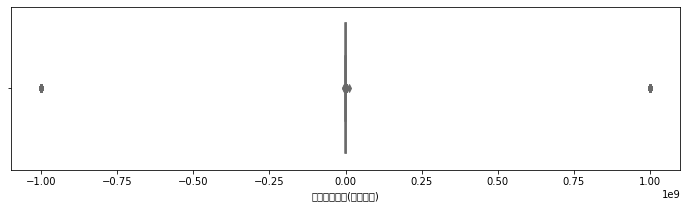

In [83]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns
target = "이자보상배율(이자비용)"

plt.figure(figsize=(12,3))
sns.boxplot(x=target, data=df_이자보상배율, palette="Set3")
# sns.swarmplot(data=df_이자보상배율, x=target)

In [84]:
# winsorizing을 이용한 이상치 대체 방법
from scipy.stats.mstats import winsorize
퍼센트=0.1 # 위아래 각각 5.0%씩 대체
df_이자보상배율["이자보상배율(이자비용)"] = winsorize(df_이자보상배율["이자보상배율(이자비용)"], limits=[퍼센트/2, 퍼센트/2])

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/3935368052.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


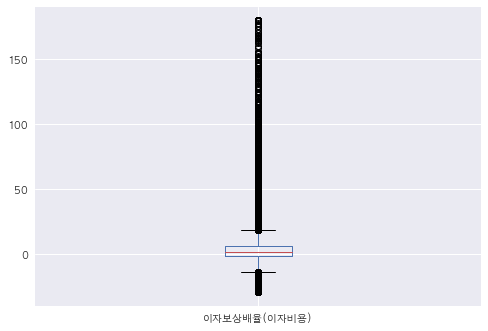

In [85]:
# 이상치 확인
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib
%matplotlib inline

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

df_이자보상배율[["이자보상배율(이자비용)"]].boxplot()
    
plt.show()

In [86]:
df_이자보상배율.sort_values(by="이자보상배율(이자비용)", ascending=False).head(5) # 최댓값 확인

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
9440,(주)시큐브,131090,2019.0,179.42
10590,(주)하츠,066130,2017.0,179.42
10670,(주)지씨셀,144510,2016.0,179.42
778,성보화학(주),003080,2011.0,179.42
4785,라온시큐어(주),042510,2017.0,179.42


In [87]:
df_이자보상배율.sort_values(by="이자보상배율(이자비용)", ascending=True).head(5) # 최솟값 확인

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
10063,(주)퓨전,195440,2017.0,-29.21
5714,(주)프리엠스,053160,2019.0,-29.21
4560,현대에이치티(주),039010,2011.0,-29.21
4559,현대에이치티(주),039010,2010.0,-29.21
5700,(주)소리바다,053110,2015.0,-29.21


### 3. Labeling

- 부실징후기업을 제거하기 위해서는 t-1, t-2년도의 이자보상배율 데이터가 필요하다. 그러나 2012~2019년에 상장한 기업의 경우 초기 2개년도에는 t-2년도 이자보상배율 데이터가 없기 때문에 이를 삭제시키면 정보 손실이 일어난다.
- 그러나 중간에 상장한 기업은 초기 2년 동안 한계기업이 될 수 없기 때문에, 모든 기업의 초기 2개 년도 t-1, t-2 이자보상배율 결측치 값을 1이상인 "2"로 대체 시켜 1이상인 기업으로 판단.

[예외의 경우]
- 각 기업의 2011~2019 사이의 데이터가 연속되지 않고 중간에 누락이 되어있다면 한계기업인지 확인하기 어려움.  

-> 중간에 데이터가 누락된 기업을 직접 확인!(2010데이터제외)

In [88]:
def func_yearnot2010(x):
    if x == 2010:
        return False
    else:
        return True
df_이자보상배율_test = df_이자보상배율[df_이자보상배율["회계년도"].map(func_yearnot2010)]
df_이자보상배율_test.sort_values(by=["거래소코드","회계년도"], axis=0, inplace=True, ascending=True)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/735035177.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_test.sort_values(by=["거래소코드","회계년도"], axis=0, inplace=True, ascending=True)


In [89]:
list_회계년도중간누락 = list()
list_code = list(df_이자보상배율_test["거래소코드"].unique())
for i in list_code:
    len_회계년도 = len(df_이자보상배율_test[df_이자보상배율_test["거래소코드"]==i])
    len_마지막년도첫년도차 = df_이자보상배율_test[df_이자보상배율_test["거래소코드"]==i]["회계년도"].iloc[-1] - df_이자보상배율_test[df_이자보상배율_test["거래소코드"]==i]["회계년도"].iloc[0] + 1
    if len_회계년도 != len_마지막년도첫년도차:
        list_회계년도중간누락.append(i)
list_회계년도중간누락

['004990', '011330', '118000']

In [90]:
df_이자보상배율[df_이자보상배율["거래소코드"]=="011330"]

,회사명,거래소코드,회계년도,이자보상배율(이자비용)
2286,(주)유니켐,011330,2010.0,0.56
2287,(주)유니켐,011330,2011.0,-7.33
2288,(주)유니켐,011330,2012.0,-3.86
2289,(주)유니켐,011330,2013.0,-5.62
2290,(주)유니켐,011330,2016.0,2.00
2291,(주)유니켐,011330,2017.0,2.06
2292,(주)유니켐,011330,2018.0,6.86
2293,(주)유니켐,011330,2019.0,10.63


In [91]:
def func_company_filter3(x):
    if x in list_회계년도중간누락:
        return False
    else:
        return True
    
df_이자보상배율 = df_이자보상배율[df_이자보상배율["거래소코드"].map(func_company_filter3)] # 회계년도중간누락 되는 기업 확인

[labeling]  
2011~2019 사이에 상장한 기업은 (t-2),(t-1)년도 데이터를 알 수 없지만, 초기 2개년 동안은 한계기업이 될 수 없기에 데이터를 삭제하지 않는다.

In [92]:
df_이자보상배율_label = df_이자보상배율.copy()
list_companycode = list(df_이자보상배율_label["거래소코드"].unique())

dfs = list()
for i in list_companycode:
    #각 기업별로 데이터프레임 생성
    df_concat = df_이자보상배율_label[df_이자보상배율_label["거래소코드"]==i]
    # 연도 누락된거 생성하여 shift 문제없도록
    list_year_all = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    list_year_real = list(df_concat["회계년도"].unique())
    for i in list_year_real:
        list_year_all.remove(i)
    df_year_all = pd.DataFrame({"회계년도":list_year_all})
    df_concat = pd.concat([df_concat,df_year_all])
    df_concat.sort_values(by="회계년도", inplace=True, ascending=True)
    
    df_concat["전년이자보상배율"] = df_concat["이자보상배율(이자비용)"].shift(1)
    dfs.append(df_concat)

df_이자보상배율_label = pd.concat(dfs)
df_이자보상배율_label.fillna(2) # 1이상인 2로 채워줌
df_이자보상배율_label.reset_index(drop=True, inplace=True)

In [93]:
list_companycode = list(df_이자보상배율_label["거래소코드"].unique())

dfs = list()
for i in list_companycode:
    #각 기업별로 데이터프레임 생성
    df_concat = df_이자보상배율_label[df_이자보상배율_label["거래소코드"]==i]
    # 연도 누락된거 생성하여 shift 문제없도록
    list_year_all = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    list_year_real = list(df_concat["회계년도"].unique())
    for i in list_year_real:
        list_year_all.remove(i)
    df_year_all = pd.DataFrame({"회계년도":list_year_all})
    df_concat = pd.concat([df_concat,df_year_all])
    df_concat.sort_values(by="회계년도", inplace=True, ascending=True)
    
    df_concat["내년이자보상배율"] = df_concat["이자보상배율(이자비용)"].shift(-1)
    dfs.append(df_concat)

df_이자보상배율_label = pd.concat(dfs)
df_이자보상배율_label.dropna(inplace=True)
df_이자보상배율_label.reset_index(drop=True, inplace=True)

In [94]:
df_이자보상배율_label

,회사명,거래소코드,회계년도,이자보상배율(이자비용),전년이자보상배율,내년이자보상배율
0,케이알모터스(주),000040,2011.0,2.21,3.74,-6.47
1,케이알모터스(주),000040,2012.0,-6.47,2.21,-4.29
2,케이알모터스(주),000040,2013.0,-4.29,-6.47,-4.60
3,케이알모터스(주),000040,2014.0,-4.60,-4.29,-4.59
4,케이알모터스(주),000040,2015.0,-4.59,-4.60,-2.26
...,...,...,...,...,...,...
8119,(주)어스앤에어로스페이스,263540,2018.0,-8.57,7.43,-22.81
8120,(주)데이타솔루션,263800,2018.0,-9.93,2.37,1.04
8121,(주)휴엠앤씨,263920,2018.0,-0.53,15.06,0.39
8122,영화테크(주),265560,2018.0,48.85,47.02,-29.21


In [95]:
def func_updown1(x):
    if x >= 1:
        return True
    else:
        return False
    
df_이자보상배율_label["전년1미만"] = df_이자보상배율_label["전년이자보상배율"].map(func_updown1)
df_이자보상배율_label["올해1미만"] = df_이자보상배율_label["이자보상배율(이자비용)"].map(func_updown1)
df_이자보상배율_label["내년1미만"] = df_이자보상배율_label["내년이자보상배율"].map(func_updown1)

df_이자보상배율_label["부실징후여부"] = df_이자보상배율_label["전년1미만"]+df_이자보상배율_label["올해1미만"] # False & False인 것만 부실징후로
df_이자보상배율_label = df_이자보상배율_label[df_이자보상배율_label["부실징후여부"]==False]
df_이자보상배율_label.drop(["전년1미만","전년이자보상배율","내년이자보상배율"], axis=1, inplace=True)
df_이자보상배율_label.dropna(axis=0, inplace=True)
df_이자보상배율_label

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/438310337.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label.drop(["전년1미만","전년이자보상배율","내년이자보상배율"], axis=1, inplace=True)
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/438310337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label.dropna(axis=0, inplace=True)


,회사명,거래소코드,회계년도,이자보상배율(이자비용),올해1미만,내년1미만,부실징후여부
2,케이알모터스(주),000040,2013.0,-4.29,False,False,False
3,케이알모터스(주),000040,2014.0,-4.60,False,False,False
4,케이알모터스(주),000040,2015.0,-4.59,False,False,False
5,케이알모터스(주),000040,2016.0,-2.26,False,False,False
6,케이알모터스(주),000040,2017.0,-6.04,False,False,False
...,...,...,...,...,...,...,...
8109,(주)얼라인드제네틱스,238120,2017.0,-29.21,False,False,False
8110,(주)얼라인드제네틱스,238120,2018.0,-29.21,False,False,False
8112,피씨엘(주),241820,2018.0,-29.21,False,False,False
8113,(주)아스타,246720,2018.0,-22.95,False,False,False


1. T/T, T/F는 뺴야함
2. F/T는 label=1
3. F/F는 label=0

In [96]:
df_이자보상배율_label_0 = df_이자보상배율_label[(df_이자보상배율_label["올해1미만"]==0)&(df_이자보상배율_label["내년1미만"]==0)]
df_이자보상배율_label_0["한계기업여부"] = 1
# df_이자보상배율_label_0
print(len(df_이자보상배율_label_0))

df_이자보상배율_label_1 = df_이자보상배율_label[(df_이자보상배율_label["올해1미만"]==0)&(df_이자보상배율_label["내년1미만"]==1)]
df_이자보상배율_label_1["한계기업여부"] = 0
# df_이자보상배율_label_1 
print(len(df_이자보상배율_label_1))

1790
583


/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/1949664480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label_0["한계기업여부"] = 1
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/1949664480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_이자보상배율_label_1["한계기업여부"] = 0


In [97]:
df_이자보상배율_label = pd.concat([df_이자보상배율_label_0,df_이자보상배율_label_1], axis=0, ignore_index=True)
df_이자보상배율_label.sort_values(by=["거래소코드","회계년도"], ascending=True, inplace=True)
df_이자보상배율_label.reset_index(drop=True, inplace=True)

df_이자보상배율_label = df_이자보상배율_label[["회사명", "거래소코드", "회계년도", "한계기업여부", "이자보상배율(이자비용)"]]
df_이자보상배율_label.to_csv("./datasets/부실징후_라벨링.csv")
df_이자보상배율_label

,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용)
0,케이알모터스(주),000040,2013.0,1,-4.29
1,케이알모터스(주),000040,2014.0,1,-4.60
2,케이알모터스(주),000040,2015.0,1,-4.59
3,케이알모터스(주),000040,2016.0,1,-2.26
4,케이알모터스(주),000040,2017.0,1,-6.04
...,...,...,...,...,...
2368,(주)얼라인드제네틱스,238120,2017.0,1,-29.21
2369,(주)얼라인드제네틱스,238120,2018.0,1,-29.21
2370,피씨엘(주),241820,2018.0,1,-29.21
2371,(주)아스타,246720,2018.0,1,-22.95


In [98]:
print("전체 잠재 한계기업수 :",len(df_이자보상배율_label[df_이자보상배율_label["한계기업여부"]==True]["거래소코드"].unique()))
print("전체 잠재 회생기업수 :",len(df_이자보상배율_label[df_이자보상배율_label["한계기업여부"]==False]["거래소코드"].unique()))
print("2018 잠재 한계기업수 :",len(df_이자보상배율_label[(df_이자보상배율_label["회계년도"]==2018)&(df_이자보상배율_label["한계기업여부"]==True)]["거래소코드"].unique()))
print("2018 잠재 회생기업수 :",len(df_이자보상배율_label[(df_이자보상배율_label["회계년도"]==2018)&(df_이자보상배율_label["한계기업여부"]==False)]["거래소코드"].unique()))

전체 잠재 한계기업수 : 617
전체 잠재 회생기업수 : 528
2018 잠재 한계기업수 : 298
2018 잠재 회생기업수 : 86


In [99]:
# 각 년도 기업수
list_year = [2012, 2013,2014,2015,2016,2017,2018]
for i in list_year:
    print(str(i)+"년 : ", len(df_이자보상배율_label[df_이자보상배율_label["회계년도"]==i]["거래소코드"].unique()))

2012년 :  279
2013년 :  324
2014년 :  327
2015년 :  293
2016년 :  286
2017년 :  325
2018년 :  384


In [100]:
df_이자보상배율_label.isna().sum()

회사명             0
거래소코드           0
회계년도            0
한계기업여부          0
이자보상배율(이자비용)    0
dtype: int64

---
## Labeling Data & 재무데이터 통합 + 이상치 처리

### 1. 전년도 데이터 컬럼 생성
1) 전년도 대비 컬럼 생성을 위해
2) 증가율 컬럼 전처리
   - ~증가율 컬럼에 이상치 0이 존재.
   - 전년도데이터를 사용하여 직접 계산하기 위해 전년도 컬럼 생성

- 총자본증가율 : "자산(*)(요약)(백만원)
- 유형자산증가율 : '유형자산(요약)(백만원)'
- 비유동자산증가율 : "자산(*)(요약)(백만원)" - "유동자산(*)(요약)(백만원)"
- 재고자산증가율 : '재고자산(요약)(백만원)'
- 자기자본증가율 : '자본(*)(요약)(백만원)'
- 매출액증가율 : '매출액(수익)(요약)(백만원)'
- 순이익증가율 : '당기순이익(손실)(요약)(백만원)'
- 종업원수증가율 :  '종업원수'

In [98]:
df_재무_통합 = pd.read_csv("./datasets/사업보고서_통합.csv", index_col=0)
df_재무_통합["거래소코드"] = df_재무_통합["거래소코드"].map(padding)
df_재무_통합 = df_재무_통합.drop(["회사명","이자보상배율(이자비용)"], axis=1)
df_재무_통합

,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),총자본증가율,유형자산증가율,비유동자산증가율,...,기타금융업부채(요약)(백만원),외국인_주식분포비율,매출원가(요약)(백만원),배당금(총합)_현금(천원),시가총액,매출원가(요약)(백만원)_전년도,매출액(수익)(요약)(백만원)_전년도,매출액대매출원가비율,매출액대매출원가비율_전년도,매출원가축소_여부
0,000040,2011.0,2815.70,1904.75,0.00,910.95,4089.55,-7.85,-3.04,-4.88,...,0.0,0.15,112256.0,0.0,7.936202e+10,NaN,NaN,87.892264,NaN,0
1,000040,2012.0,-24385.88,-8232.05,-12026.31,726.84,3605.56,-10.51,-3.38,-4.43,...,0.0,0.00,92177.0,0.0,5.895464e+10,112256.0,127720.0,94.128279,87.892264,0
2,000040,2013.0,9379.15,-6614.45,11471.40,603.89,3494.34,-2.01,1.02,-0.71,...,0.0,0.11,91997.0,0.0,5.227152e+10,92177.0,97927.0,92.410073,94.128279,0
3,000040,2014.0,4401.73,-12730.80,11786.16,2087.03,2821.24,17.03,13.52,21.97,...,0.0,16.16,78547.0,0.0,1.235183e+11,91997.0,99553.0,98.496476,92.410073,0
4,000040,2015.0,4620.05,-16719.74,13481.55,3107.67,3067.83,15.14,3.81,9.12,...,0.0,11.26,78630.0,0.0,2.226409e+11,78547.0,79746.0,97.484472,98.496476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,314130,2019.0,-78762.39,-84668.52,3722.52,1998.51,570.03,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,3.233185e+11,NaN,NaN,0.000000,NaN,0
9975,317120,2019.0,1781.44,-198.58,1523.15,38.58,269.32,0.00,0.00,0.00,...,0.0,0.88,3478.0,0.0,6.604850e+10,NaN,NaN,38.456435,NaN,0
9976,317530,2019.0,2221.02,-2413.75,3048.56,356.82,970.54,73.17,26.97,40.95,...,0.0,0.00,0.0,0.0,5.354867e+10,NaN,NaN,0.000000,NaN,0
9977,321550,2019.0,-5711.75,-7091.43,1461.92,-945.65,834.31,0.00,0.00,0.00,...,0.0,0.09,0.0,0.0,4.140659e+11,NaN,NaN,0.000000,NaN,0


In [99]:
df_재무_통합[df_재무_통합["총자본증가율"]==0][['총자본증가율', '유형자산증가율', '비유동자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율', '매출액증가율', '순이익증가율','종업원수증가율']]

,총자본증가율,유형자산증가율,비유동자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,매출액증가율,순이익증가율,종업원수증가율
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.88
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.63
...,...,...,...,...,...,...,...,...,...
9970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
9974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
9975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
9977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [100]:
# 증가율컬럼에 0 떠서 전처리 해주는 컬럼
list_col_lastyear1 = ['자본(*)(요약)(백만원)', '유형자산(요약)(백만원)', "자산(*)(요약)(백만원)", "유동자산(*)(요약)(백만원)", '재고자산(요약)(백만원)', '매출액(수익)(요약)(백만원)', '당기순이익(손실)(요약)(백만원)', '종업원수']
list_col_drop1 = ['총자본증가율', '유형자산증가율', '비유동자산증가율', '유동자산증가율', '재고자산증가율', '자기자본증가율', '매출액증가율', '순이익증가율','종업원수증가율']
df_재무_통합.drop(list_col_drop1, axis=1, inplace=True)

In [101]:
# 전년도 대비 증가율 컬럼
list_col_lastyear2 = ['배당성향', '투자활동으로인한현금흐름(*)(요약)(백만원)', '매출원가대매출액비율', '보통주배당금_현금(천원)', '장기금융부채(백만원)', "자본증가율_여부"]

df_재무_통합['장기금융부채(백만원)']=df_재무_통합['장기차입금(요약)(백만원)']+df_재무_통합['사채(요약)(백만원)']+df_재무_통합['장기매입채무및기타비유동채무(요약)(백만원)']
df_재무_통합['자산대비자본비율']=(df_재무_통합['자본(*)(요약)(백만원)']/df_재무_통합["자산(*)(요약)(백만원)"])*100

In [102]:
list_companycode = list(df_재무_통합["거래소코드"].unique())

dfs = list()
for i in list_companycode:
    #각 기업별로 데이터프레임 생성
    df_concat = df_재무_통합[df_재무_통합["거래소코드"]==i]
    # 연도 누락된거 생성하여 shift 문제없도록
    list_year_all = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    list_year_real = list(df_concat["회계년도"].unique())
    for i in list_year_real:
        list_year_all.remove(i)
    df_year_all = pd.DataFrame({"회계년도":list_year_all})
    df_concat = pd.concat([df_concat,df_year_all])
    df_concat.sort_values(by="회계년도", inplace=True, ascending=True)
    
    df_concat["자본(*)(요약)(백만원)_전년도"] = df_concat["자본(*)(요약)(백만원)"].shift(1)
    df_concat["유형자산(요약)(백만원)_전년도"] = df_concat["유형자산(요약)(백만원)"].shift(1)
    df_concat["자산(*)(요약)(백만원)_전년도"] = df_concat["자산(*)(요약)(백만원)"].shift(1)
    df_concat["유동자산(*)(요약)(백만원)_전년도"] = df_concat["유동자산(*)(요약)(백만원)"].shift(1)
    df_concat["재고자산(요약)(백만원)_전년도"] = df_concat["재고자산(요약)(백만원)"].shift(1)
    df_concat["당기순이익(손실)(요약)(백만원)_전년도"] = df_concat["당기순이익(손실)(요약)(백만원)"].shift(1)
    df_concat["종업원수_전년도"] = df_concat["종업원수"].shift(1)
    
    df_concat["투자활동으로인한현금흐름(*)(요약)(백만원)_전년도"] = df_concat["투자활동으로인한현금흐름(*)(요약)(백만원)"].shift(1)
    df_concat["배당금(총합)_현금(천원)_전년도"] = df_concat["배당금(총합)_현금(천원)"].shift(1)
    df_concat["자산대비자본비율_전년도"] = df_concat["자산대비자본비율"].shift(1)
    df_concat["장기금융부채(백만원)_전년도"] = df_concat["장기금융부채(백만원)"].shift(1)
    df_concat["자산(*)(요약)(백만원)_전년도"] = df_concat["자산(*)(요약)(백만원)"].shift(1)
    dfs.append(df_concat)

df_재무_통합 = pd.concat(dfs)
df_재무_통합.dropna(inplace=True)
df_재무_통합.reset_index(drop=True, inplace=True)
df_재무_통합.shape

(8638, 109)

In [103]:
df_재무_통합[df_재무_통합["거래소코드"]=="290660"]

,거래소코드,회계년도,부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,유형자산(요약)(백만원)_전년도,자산(*)(요약)(백만원)_전년도,유동자산(*)(요약)(백만원)_전년도,재고자산(요약)(백만원)_전년도,당기순이익(손실)(요약)(백만원)_전년도,종업원수_전년도,투자활동으로인한현금흐름(*)(요약)(백만원)_전년도,배당금(총합)_현금(천원)_전년도,자산대비자본비율_전년도,장기금융부채(백만원)_전년도
8634,290660,2019.0,-1668.6,-16027.05,11390.92,878.71,1819.75,26.21,-128.95,-32.89,...,4992.0,35920.0,29301.0,2211.0,-9634.0,64.0,-5060.0,0.0,78.649777,274.0


### 2. 라벨링 데이터와 통합

In [104]:
df_부실징후 = pd.read_csv("./datasets/부실징후_라벨링.csv", index_col=0)
df_부실징후["거래소코드"] = df_부실징후["거래소코드"].map(padding)
len(df_부실징후["회사명"].unique())

805

In [105]:
# 라벨링 데이터 불러오기
df_부실징후 = pd.read_csv("./datasets/부실징후_라벨링.csv", index_col=0)
df_부실징후["거래소코드"] = df_부실징후["거래소코드"].map(padding)

# 라벨링데이터와 재무데이터 결합
df_부실징후 = pd.merge(df_부실징후,df_재무_통합, on=["거래소코드","회계년도"], how = 'left')

# 중복기업 제거
df_부실징후.dropna(inplace=True)
df_부실징후.sort_values(by=["거래소코드","회계년도"], inplace=True, ascending=True)
df_부실징후.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_부실징후.reset_index(drop=True, inplace=True)
df_부실징후

,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),...,유형자산(요약)(백만원)_전년도,자산(*)(요약)(백만원)_전년도,유동자산(*)(요약)(백만원)_전년도,재고자산(요약)(백만원)_전년도,당기순이익(손실)(요약)(백만원)_전년도,종업원수_전년도,투자활동으로인한현금흐름(*)(요약)(백만원)_전년도,배당금(총합)_현금(천원)_전년도,자산대비자본비율_전년도,장기금융부채(백만원)_전년도
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,-6614.45,11471.40,603.89,3494.34,...,55810.0,119327.0,61685.0,24763.0,-8232.0,249.0,-527.0,0.0,50.949911,408.0
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,-2743.58,26305.23,1111.80,3750.38,...,219208.0,328454.0,101561.0,29976.0,130666.0,78.0,151698.0,0.0,78.357396,16043.0
2,디엘(주),000210,2014.0,0,-3.33,494645.17,-399132.20,730449.00,31419.37,79197.00,...,1402234.0,10783047.0,6933026.0,1036184.0,-10332.0,5456.0,-269731.0,4050000.0,45.166593,1155487.0
3,일동홀딩스(주),000230,2017.0,1,0.61,20134.11,-174.76,15539.49,1550.73,2502.66,...,49462.0,204088.0,79510.0,4934.0,266191.0,72.0,-42414.0,1046751.0,52.348987,30078.0
4,(주)대유플러스,000300,2012.0,0,-4.88,28096.06,-20808.00,24144.10,3110.15,11084.00,...,105879.0,605360.0,144700.0,21393.0,-4626.0,389.0,-20302.0,1063000.0,14.996531,20718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,(주)에이트원,230980,2018.0,1,-0.14,12878.02,-964.45,8872.93,4094.78,852.79,...,15922.0,48118.0,24037.0,11738.0,872.0,97.0,-14867.0,0.0,21.594829,4131.0
780,(주)얼라인드제네틱스,238120,2017.0,1,-29.21,2091.01,-1754.37,3290.81,-294.03,419.45,...,451.0,25861.0,24351.0,1711.0,-1556.0,57.0,-12817.0,0.0,93.511465,121.0
781,피씨엘(주),241820,2018.0,1,-29.21,-2639.11,-5771.24,2557.81,-28.40,602.71,...,2953.0,15874.0,12804.0,5.0,-3869.0,35.0,-7639.0,0.0,97.247071,30.0
782,(주)아스타,246720,2018.0,1,-22.95,-929.19,-3541.09,2194.05,-333.43,262.48,...,1003.0,23647.0,15266.0,1482.0,-4314.0,24.0,-13198.0,0.0,61.014082,2068.0


In [106]:
df_부실징후.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '한계기업여부': 0,
 '이자보상배율(이자비용)': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '감가상각비(백만원)': 0,
 '매출액총이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본순이익률': 0,
 '자기자본순이익률': 0,
 '경영자본순이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '인건비대총비용비율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '매입채무대재고자산비율': 0,
 '순운전자본비율': 0,
 '차입금의존도': 0,
 '차입금비율': 0,
 '총자본회전률': 0,
 '자기자본회전률': 0,
 '자본금회전률': 0,
 '타인자본회전률': 0,
 '매입채무회전률': 0,
 '유동자산회전률': 0,
 '당좌자산회전률': 0,
 '재고자산회전률': 0,
 '매출채권회전률': 0,
 '비유동자산회전률': 0,
 '유형자산회전율': 0,
 '순운전자본회전률': 0,
 '운전자본회전률': 0,
 '배당성향': 0,
 '종업원수': 0,
 '사내유보율': 0,
 '사내유보대자기자본비율': 0,
 '평균배당률': 0,
 '자기자본배당률': 0,
 '1주당순자산(원)': 0,
 '장기차입금(요약)(백만원)': 0,
 '자산(*)(요약)(백만원)': 0,
 '당기순이익(손실)(요약)(백

### 3. inf값 확인

In [107]:
list(df_부실징후.select_dtypes(include="object").columns) # object columns 확인

['회사명', '거래소코드', '통계청한국표준산업분류10차(대분류)']

In [108]:
list_inf = list()
list_재무_columns = list(df_부실징후.columns)
# df_부실징후.select_dtypes(include="object")
list_재무_columns.remove("회사명")
list_재무_columns.remove("거래소코드")
list_재무_columns.remove("회계년도")
list_재무_columns.remove("통계청한국표준산업분류10차(대분류)")

# 1) inf값 있는 기업 리스트로 확인
for i in list_재무_columns:
    if len(df_부실징후[np.isinf(abs(df_부실징후[i]))]) > 0:
        list_inf.append(i)
list_inf

[]

### 4. 이상치 처리

In [109]:
# 이상치 확인을 위한 boxplot 그리기 전 초기작업
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

In [110]:
df_부실징후.shape

(784, 112)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/3211290467.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


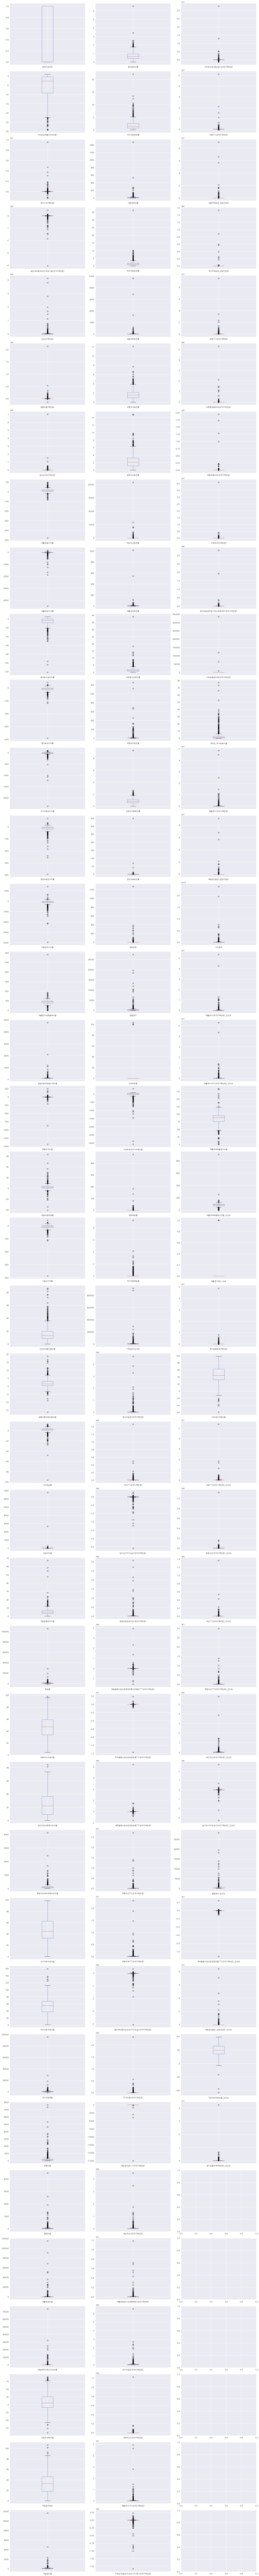

In [111]:
df_부실징후_outlier = df_부실징후.drop(['회사명', '거래소코드', '회계년도', '통계청한국표준산업분류10차(대분류)'], axis=1)
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 3
nrows = 38

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 200))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

In [112]:
list(df_부실징후.columns)

['회사명',
 '거래소코드',
 '회계년도',
 '한계기업여부',
 '이자보상배율(이자비용)',
 '부가가치(백만원)',
 '법인세비용차감전(계속사업)손익(백만원)',
 '인건비(백만원)',
 '금융비용(백만원)',
 '감가상각비(백만원)',
 '매출액총이익률',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '경영자본순이익률',
 '자본금순이익률',
 '매출원가대매출액비율',
 '영업비용대영업수익비율',
 '금융손익비율',
 '금융비용부담률',
 '기업순이익률',
 '인건비대총비용비율',
 '금융비용대총비용비율',
 '이자부담률',
 '지급이자율',
 '차입금평균이자율',
 '유보율',
 '유동자산구성비율',
 '재고자산대유동자산비율',
 '유동자산대비유동자산비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '자기자본배율',
 '유동비율',
 '현금비율',
 '매출채권비율',
 '매입채무대재고자산비율',
 '순운전자본비율',
 '차입금의존도',
 '차입금비율',
 '총자본회전률',
 '자기자본회전률',
 '자본금회전률',
 '타인자본회전률',
 '매입채무회전률',
 '유동자산회전률',
 '당좌자산회전률',
 '재고자산회전률',
 '매출채권회전률',
 '비유동자산회전률',
 '유형자산회전율',
 '순운전자본회전률',
 '운전자본회전률',
 '배당성향',
 '종업원수',
 '사내유보율',
 '사내유보대자기자본비율',
 '평균배당률',
 '자기자본배당률',
 '1주당순자산(원)',
 '장기차입금(요약)(백만원)',
 '자산(*)(요약)(백만원)',
 '당기순이익(손실)(요약)(백만원)',
 '현금및현금성자산(요약)(백만원)',
 '영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)',
 '투자활동으로인한현금흐름(*)(요약)(백만원)',
 '재무활동으로인한현금흐름(*)(요약)(백만원)',
 '유동자산(*)(요약)(백만원)',
 '유동부채(*)(요약)(백만원)',
 '법인세비용차감전순이익(손실)(요약)(백만원)'

In [113]:
list_2쩜5per = list(df_부실징후.columns)
list_0per = ["한계기업여부", "이자부담률", "순운전자본비율", "차입금의존도", "이자보상배율(이자비용)", "자기자본배당률","총자본회전률", "자기자본회전률", "타인자본회전률", "유동자산회전률", "당좌자산회전률", "총자본사업이익률", "총자본순이익률",
            "비유동자산회전률", "순운전자본회전률", "외국인_주식분포비율", "금융비용부담률", "자산대비자본비율", "기업순이익률", "인건비대총비용비율", "금융비용대총비용비율", "차입금평균이자율", "유동자산구성비율", "재고자산대유동자산비율", "자기자본구성비율", "타인자본구성비율",
            "자산대비자본비율_전년도", "사내유보율", "배당성향", "기타금융업부채(요약)(백만원)", '매출원가축소_여부']

list_0쩜5per = ["지급이자율", "자본금회전률", "매입채무회전률","매출액총이익률","매출액순이익률", "재고자산회전률", "매출채권회전률", "자기자본순이익률","경영자본순이익률", "유형자산회전율", "자본금순이익률","매출원가대매출액비율", "운전자본회전률", "영업비용대영업수익비율",
            "종업원수","사내유보대자기자본비율", "평균배당률", "차입금비율", "금융손익비율", "유보율", "유동자산대비유동자산비율", "종업원수_전년도", "자기자본배율", "유동비율", "현금비율",  "배당금지급(-)(요약)(백만원)", "우선주배당금_현금(천원)", '매출액대매출원가비율', '매출액대매출원가비율_전년도',]
for i in list_0per:
    list_2쩜5per.remove(i)
for i in list_0쩜5per:
    list_2쩜5per.remove(i)
list_2쩜5per.remove("회사명")
list_2쩜5per.remove("거래소코드")
list_2쩜5per.remove("회계년도")
list_2쩜5per.remove("통계청한국표준산업분류10차(대분류)")

In [114]:
# 상하위 0.5%, 2.5% 이상치 대체
from scipy.stats.mstats import winsorize
for i in list_0쩜5per:
    df_부실징후[i]= winsorize(df_부실징후[i], limits=[0.025, 0.025])
for i in list_2쩜5per:
    df_부실징후[i]= winsorize(df_부실징후[i], limits=[0.025, 0.025])

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_2177/3191098624.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


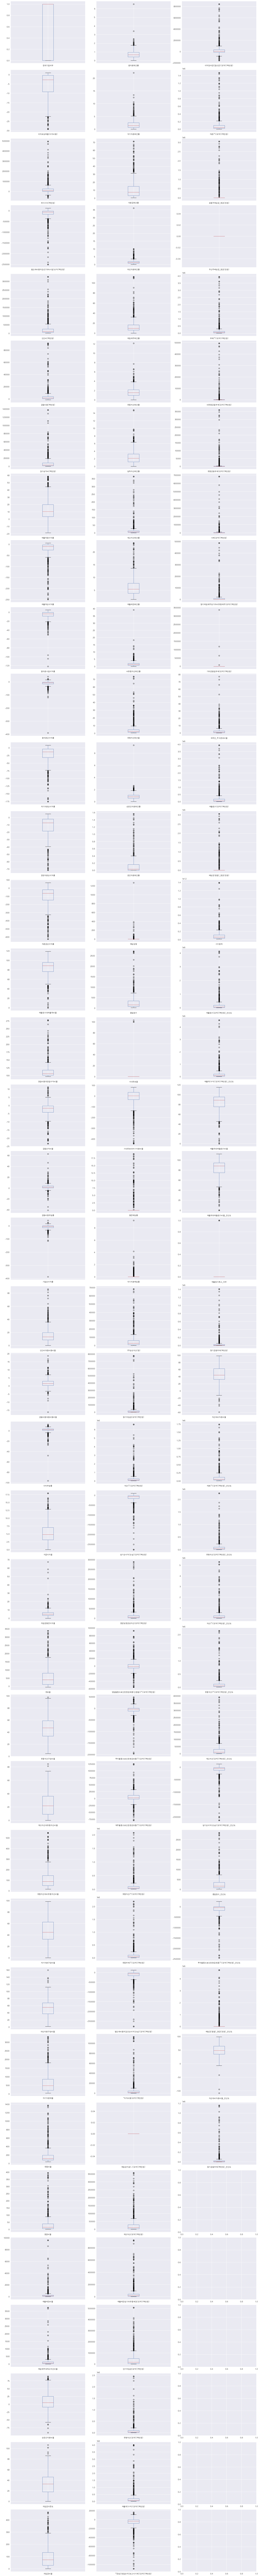

In [115]:
df_부실징후_outlier = df_부실징후.drop(['회사명', '거래소코드', '회계년도', '통계청한국표준산업분류10차(대분류)'], axis=1)
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 3
nrows = 38

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 200))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()


> # Q. “사내유보율”, “배당성향” 이상치 확인

사내유보율은 100또는 0이라 "사내유보금보유_여부"컬럼으로 반정형데이터 생성

<AxesSubplot: xlabel='사내유보율'>

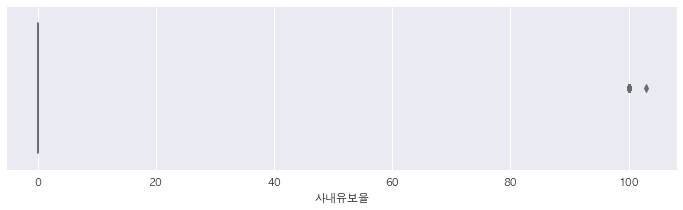

In [120]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns
target = "사내유보율"

plt.figure(figsize=(12,3))
sns.boxplot(x=target, data=df_부실징후, palette="Set3")
# sns.swarmplot(data=df_이자보상배율, x=target)

배당성향이 100%가 넘는 데이터 존재  
-> 직접 확인한 결과 당기순이익이 배당금보다 작은데, 배당을 많이하면 배당성향이 말도안되게 높게 나옴

![12](https://user-images.githubusercontent.com/88031549/208833134-8d4ec411-008b-47c1-8a45-12cb213dfc83.png)

<AxesSubplot: xlabel='배당성향'>

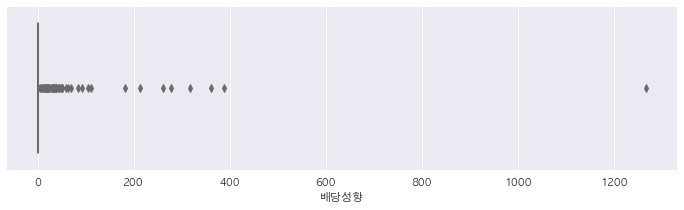

In [121]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns
target = "배당성향"

plt.figure(figsize=(12,3))
sns.boxplot(x=target, data=df_부실징후, palette="Set3")
# sns.swarmplot(data=df_이자보상배율, x=target)

In [122]:
df_부실징후["배당성향"].describe()

count     784.000000
mean        6.148546
std        53.833683
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1268.360000
Name: 배당성향, dtype: float64

In [123]:
df_부실징후[df_부실징후["배당성향"]>100][["회사명","거래소코드","회계년도","배당성향"]].sort_values(by="배당성향", ascending=False).head(5)

,회사명,거래소코드,회계년도,배당성향
90,한일사료(주),005860,2018.0,1268.36
244,(주)제이에스티나,026040,2018.0,388.49
125,대동기어(주),008830,2013.0,360.91
3,일동홀딩스(주),000230,2017.0,318.44
286,세종공업(주),033530,2018.0,278.35


In [124]:
# 상하위 2.5% 이상치 대체
from scipy.stats.mstats import winsorize
df_부실징후["배당성향"]= winsorize(df_부실징후["배당성향"], limits=[0.025, 0.025])

<AxesSubplot: xlabel='배당성향'>

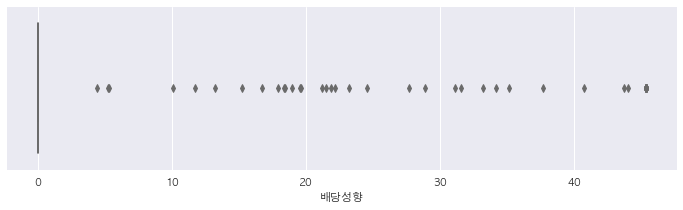

In [125]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns
target = "배당성향"

plt.figure(figsize=(12,3))
sns.boxplot(x=target, data=df_부실징후, palette="Set3")
# sns.swarmplot(data=df_이자보상배율, x=target)

---
# 파생변수 생성

In [126]:
df_부실징후_파생변수 = df_부실징후.copy()
print("row 수 :", df_부실징후_파생변수.shape[0])
df_부실징후_파생변수.head(3)

row 수 : 784


,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),법인세비용차감전(계속사업)손익(백만원),인건비(백만원),금융비용(백만원),감가상각비(백만원),...,유형자산(요약)(백만원)_전년도,자산(*)(요약)(백만원)_전년도,유동자산(*)(요약)(백만원)_전년도,재고자산(요약)(백만원)_전년도,당기순이익(손실)(요약)(백만원)_전년도,종업원수_전년도,투자활동으로인한현금흐름(*)(요약)(백만원)_전년도,배당금(총합)_현금(천원)_전년도,자산대비자본비율_전년도,장기금융부채(백만원)_전년도
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,-6614.45,11471.40,603.89,3494.34,...,55810.0,119327.0,61685.0,24763.0,-8232.0,249.0,-527.0,0.0,50.949911,408.0
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,-2743.58,26305.23,1111.80,3750.38,...,219208.0,328454.0,101561.0,29976.0,13091.0,78.0,24710.0,0.0,78.357396,16043.0
2,디엘(주),000210,2014.0,0,-3.33,494645.17,-250371.85,325771.45,31419.37,79197.00,...,1402234.0,5310310.0,2144305.0,389965.0,-10332.0,2849.0,-244402.0,4050000.0,45.166593,1155487.0


### 1. 증가율컬럼 생성
- 총자본증가율 : "자산(*)(요약)(백만원)
- 유형자산증가율 : '유형자산(요약)(백만원)'
- 비유동자산증가율 : "자산(*)(요약)(백만원)" - "유동자산(*)(요약)(백만원)"
- 재고자산증가율 : '재고자산(요약)(백만원)'
- 자기자본증가율 : '자본(*)(요약)(백만원)'
- 매출액증가율 : '매출액(수익)(요약)(백만원)'
- 순이익증가율 : '당기순이익(손실)(요약)(백만원)'
- 종업원수증가율 :  '종업원수'

In [127]:
df_부실징후_파생변수['총자본증가율'] = (df_부실징후_파생변수['자산(*)(요약)(백만원)'] - df_부실징후_파생변수['자산(*)(요약)(백만원)_전년도'] ) / df_부실징후_파생변수['자산(*)(요약)(백만원)_전년도'] *100
df_부실징후_파생변수['유형자산증가율'] = (df_부실징후_파생변수['유형자산(요약)(백만원)'] - df_부실징후_파생변수['유형자산(요약)(백만원)_전년도'] ) / df_부실징후_파생변수['유형자산(요약)(백만원)_전년도'] *100
df_부실징후_파생변수['비유동자산(백만원)'] = (df_부실징후_파생변수['자산(*)(요약)(백만원)'] - df_부실징후_파생변수['유동자산(*)(요약)(백만원)'] ) 
df_부실징후_파생변수['비유동자산(백만원)_전년도'] = (df_부실징후_파생변수['자산(*)(요약)(백만원)_전년도'] - df_부실징후_파생변수['유형자산(요약)(백만원)_전년도'] ) 
df_부실징후_파생변수['비유동자산증가율'] = (df_부실징후_파생변수['비유동자산(백만원)']-df_부실징후_파생변수['비유동자산(백만원)_전년도']) / df_부실징후_파생변수['비유동자산(백만원)_전년도'] * 100
# df_부실징후_파생변수['재고자산증가율'] = (df_부실징후_파생변수['재고자산(요약)(백만원)'] - df_부실징후_파생변수['재고자산(요약)(백만원)_전년도'] ) / df_부실징후_파생변수['재고자산(요약)(백만원)_전년도'] *100 # 자본증가율 계산에 사용됨. 그러나 자본증가율이 inf값이 많아 drop
df_부실징후_파생변수['자기자본증가율'] = (df_부실징후_파생변수['자본(*)(요약)(백만원)'] - df_부실징후_파생변수['자본(*)(요약)(백만원)_전년도'] ) / df_부실징후_파생변수['자본(*)(요약)(백만원)_전년도'] *100
df_부실징후_파생변수['매출액증가율'] = (df_부실징후_파생변수['매출액(수익)(요약)(백만원)'] - df_부실징후_파생변수['매출액(수익)(요약)(백만원)_전년도'] ) / df_부실징후_파생변수['매출액(수익)(요약)(백만원)_전년도'] *100
# df_부실징후_파생변수['순이익증가율'] = (df_부실징후_파생변수['당기순이익(손실)(요약)(백만원)'] - df_부실징후_파생변수['당기순이익(손실)(요약)(백만원)_전년도'] ) / df_부실징후_파생변수['당기순이익(손실)(요약)(백만원)_전년도'] *100
df_부실징후_파생변수['종업원수증가율'] = (df_부실징후_파생변수['종업원수'] - df_부실징후_파생변수['종업원수_전년도'] ) / df_부실징후_파생변수['종업원수_전년도'] *100

결측치 확인

In [128]:
df_부실징후_파생변수.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '한계기업여부': 0,
 '이자보상배율(이자비용)': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '감가상각비(백만원)': 0,
 '매출액총이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본순이익률': 0,
 '자기자본순이익률': 0,
 '경영자본순이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '인건비대총비용비율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '매입채무대재고자산비율': 0,
 '순운전자본비율': 0,
 '차입금의존도': 0,
 '차입금비율': 0,
 '총자본회전률': 0,
 '자기자본회전률': 0,
 '자본금회전률': 0,
 '타인자본회전률': 0,
 '매입채무회전률': 0,
 '유동자산회전률': 0,
 '당좌자산회전률': 0,
 '재고자산회전률': 0,
 '매출채권회전률': 0,
 '비유동자산회전률': 0,
 '유형자산회전율': 0,
 '순운전자본회전률': 0,
 '운전자본회전률': 0,
 '배당성향': 0,
 '종업원수': 0,
 '사내유보율': 0,
 '사내유보대자기자본비율': 0,
 '평균배당률': 0,
 '자기자본배당률': 0,
 '1주당순자산(원)': 0,
 '장기차입금(요약)(백만원)': 0,
 '자산(*)(요약)(백만원)': 0,
 '당기순이익(손실)(요약)(백

In [129]:
df_부실징후_파생변수.dropna(inplace=True)
df_부실징후_파생변수.reset_index(drop=True, inplace=True)

### 2. 반정형데이터 생성

In [130]:
df_부실징후_파생변수["투자활동현금흐름증감률"] = (df_부실징후_파생변수['투자활동으로인한현금흐름(*)(요약)(백만원)'] - df_부실징후_파생변수['투자활동으로인한현금흐름(*)(요약)(백만원)_전년도'])/df_부실징후_파생변수['투자활동으로인한현금흐름(*)(요약)(백만원)_전년도']*100
df_부실징후_파생변수["직원증감률"] = (df_부실징후_파생변수['종업원수'] - df_부실징후_파생변수['종업원수_전년도'])/df_부실징후_파생변수['종업원수_전년도']*100
# df_부실징후_파생변수['배당금증감률']=(df_부실징후_파생변수['배당금(총합)_현금(천원)'] - df_부실징후_파생변수['배당금(총합)_현금(천원)_전년도'])/df_부실징후_파생변수['배당금(총합)_현금(천원)_전년도']*100
# df_부실징후_파생변수['배당금증감률'] = df_부실징후_파생변수['배당금증감률'].fillna(0)
df_부실징후_파생변수['자본증가률']=(df_부실징후_파생변수['자산대비자본비율'] - df_부실징후_파생변수['자산대비자본비율_전년도'])/df_부실징후_파생변수['자산대비자본비율_전년도']*100
# df_부실징후_파생변수['장기금융부채증감률']=(df_부실징후_파생변수['장기금융부채(백만원)'] - df_부실징후_파생변수['장기금융부채(백만원)_전년도'])/df_부실징후_파생변수['장기금융부채(백만원)_전년도']*100 # inf 많아서 drop
# df_부실징후_파생변수['자본증가율']=df_부실징후_파생변수['자산(*)(요약)(백만원)'] /df_부실징후_파생변수['장기금융부채(백만원)']*100 # inf 많아서 drop
df_부실징후_파생변수['차입']=df_부실징후_파생변수['장기금융부채(백만원)']/df_부실징후_파생변수['자산(*)(요약)(백만원)']*100
df_부실징후_파생변수["자산대비_장기금융부채비율"] = df_부실징후_파생변수["장기금융부채(백만원)"]/df_부실징후_파생변수['자산(*)(요약)(백만원)']
# df_부실징후_파생변수["자산대비_장기금융부채비율_전년도"] = df_부실징후_파생변수["장기금융부채(백만원)_전년도"]/df_부실징후_파생변수['자산(*)(요약)(백만원)_전년도']
# df_부실징후_파생변수["자산대비_장기금융부채비율_증가율"] = df_부실징후_파생변수["자산대비_장기금융부채비율"]/df_부실징후_파생변수['자산대비_장기금융부채비율_전년도']

> # 분모가 0일경우 NA값이 된다.
> #### 결측치 있는 컬럼 : '배당금증감률', '장기금융부채증감률', '자산대비_장기금융부채비율_증가율'
- #### 전년도 0에서 올해 0이 되면 0으로
- #### 전년도 0에서 올해 0이상이되면 drop
- #### inf값이 많은건 drop

In [131]:
df_부실징후_파생변수.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '한계기업여부': 0,
 '이자보상배율(이자비용)': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '감가상각비(백만원)': 0,
 '매출액총이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본순이익률': 0,
 '자기자본순이익률': 0,
 '경영자본순이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '인건비대총비용비율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '매입채무대재고자산비율': 0,
 '순운전자본비율': 0,
 '차입금의존도': 0,
 '차입금비율': 0,
 '총자본회전률': 0,
 '자기자본회전률': 0,
 '자본금회전률': 0,
 '타인자본회전률': 0,
 '매입채무회전률': 0,
 '유동자산회전률': 0,
 '당좌자산회전률': 0,
 '재고자산회전률': 0,
 '매출채권회전률': 0,
 '비유동자산회전률': 0,
 '유형자산회전율': 0,
 '순운전자본회전률': 0,
 '운전자본회전률': 0,
 '배당성향': 0,
 '종업원수': 0,
 '사내유보율': 0,
 '사내유보대자기자본비율': 0,
 '평균배당률': 0,
 '자기자본배당률': 0,
 '1주당순자산(원)': 0,
 '장기차입금(요약)(백만원)': 0,
 '자산(*)(요약)(백만원)': 0,
 '당기순이익(손실)(요약)(백

In [132]:
# df_부실징후_정상 = df_부실징후_파생변수[((df_부실징후_파생변수["배당금(총합)_현금(천원)"]==0)&(df_부실징후_파생변수["배당금(총합)_현금(천원)_전년도"]==0)&(df_부실징후_파생변수["배당금(총합)_현금(천원)_전년도"]==0)).map(func_not)]
# df_부실징후_결측 = df_부실징후_파생변수[(df_부실징후_파생변수["배당금(총합)_현금(천원)"]==0)&(df_부실징후_파생변수["배당금(총합)_현금(천원)_전년도"]==0)&(df_부실징후_파생변수["배당금(총합)_현금(천원)_전년도"]==0)]
# df_부실징후_결측["배당금증감률"]=0
# df_부실징후_파생변수 = pd.concat([df_부실징후_정상, df_부실징후_결측], axis=0)
# print("row drop 수 : ", df_부실징후_파생변수[df_부실징후_파생변수["배당금증감률"].isna()].shape[0])
# df_부실징후_파생변수 = df_부실징후_파생변수[df_부실징후_파생변수["배당금증감률"].isna().map(func_not)]
# df_부실징후_파생변수.reset_index(drop=True, inplace=True)

In [133]:
# df_부실징후_정상 = df_부실징후_파생변수[((df_부실징후_파생변수["장기금융부채(백만원)"]==0)&(df_부실징후_파생변수["장기금융부채(백만원)_전년도"]==0)).map(func_not)]
# df_부실징후_결측 = df_부실징후_파생변수[(df_부실징후_파생변수["장기금융부채(백만원)"]==0)&(df_부실징후_파생변수["장기금융부채(백만원)_전년도"]==0)]
# df_부실징후_결측["장기금융부채증감률"]=0
# df_부실징후_파생변수 = pd.concat([df_부실징후_정상, df_부실징후_결측], axis=0)
# print("row drop 수 : ", df_부실징후_파생변수[df_부실징후_파생변수["장기금융부채증감률"].isna()].shape[0])
# df_부실징후_파생변수 = df_부실징후_파생변수[df_부실징후_파생변수["장기금융부채증감률"].isna().map(func_not)]
# df_부실징후_파생변수.reset_index(drop=True, inplace=True)

In [134]:
# df_부실징후_정상 = df_부실징후_파생변수[((df_부실징후_파생변수["자산대비_장기금융부채비율"]==0)&(df_부실징후_파생변수["자산대비_장기금융부채비율_전년도"]==0)).map(func_not)]
# df_부실징후_결측 = df_부실징후_파생변수[(df_부실징후_파생변수["자산대비_장기금융부채비율"]==0)&(df_부실징후_파생변수["자산대비_장기금융부채비율_전년도"]==0)]
# df_부실징후_결측["자산대비_장기금융부채비율_증가율"]=0
# df_부실징후_파생변수 = pd.concat([df_부실징후_정상, df_부실징후_결측], axis=0)
# print("row drop 수 : ", df_부실징후_파생변수[df_부실징후_파생변수["자산대비_장기금융부채비율_증가율"].isna()].shape[0])
# df_부실징후_파생변수 = df_부실징후_파생변수[df_부실징후_파생변수["자산대비_장기금융부채비율_증가율"].isna().map(func_not)]
# df_부실징후_파생변수.reset_index(drop=True, inplace=True)

In [135]:
df_부실징후_파생변수.shape[0]

784

In [136]:
# 결측치 없음
# df_부실징후_파생변수.isna().sum().to_dict()

In [137]:
#투자활동현금흐름증감률_label t－1기 대비 15% 이상 감소한 경우 0, 아닐 경우 1
def func1_TF(x):
    if (x <= -15) :
        return 1
    else:
        return 0

#직원증감률_label t－1기 대비 20%이상 줄어든 경우 0, 아닐 경우1
def func2_TF(x):
    if (x <= -20) :
        return 1
    else:
        return 0    

def func3_TF(x):
    if x==0:
        return 0
    else:
        return 1

# 자산매각_label 고정자산(비유동자산)이 15% 이상 줄어드는 경우0, 아닐 경우 1   
def func4_TF(x):
    if (x <= -15):
        return 1
    else:
        return 0

# 배당금증감률_label
def func5_TF(x):
    if (x <= -25):
        return 1
    else:
        return 0     

# 증자증감률_label 증자를 통한 재무적 범주 구조조정 더미변수, t기 또는 t＋1기의 (자본/총자산)의 증가가 5% 이상인 경우 0, 아닐 경우 1  
# 차입_label (현금흐름표상 장기금융부채의 증가치/총자산)의 증가치가 5% 이상인 경우 0 아닐 경우 1   
def func6_TF(x):
    if (x >=5):
        return 1
    else:
        return 0        

def func7_TF(x):
    if x==0:
        return 0
    else:
        return 1

In [138]:
df_부실징후_파생변수['투자축소_여부']=df_부실징후_파생변수['투자활동현금흐름증감률'].map(func1_TF)
df_부실징후_파생변수['직원증감률_여부']=df_부실징후_파생변수['종업원수증가율'].map(func2_TF)
df_부실징후_파생변수['사내유보금보유_여부']=df_부실징후_파생변수['사내유보율'].map(func3_TF)
df_부실징후_파생변수['자산매각_여부']=df_부실징후_파생변수['비유동자산증가율'].map(func4_TF)
# df_부실징후_파생변수['배당금축소_여부']=df_부실징후_파생변수['배당금증감률'].map(func5_TF)
df_부실징후_파생변수['자본증가율_여부']=df_부실징후_파생변수['자본증가률'].map(func6_TF)
df_부실징후_파생변수['차입_여부']=df_부실징후_파생변수['차입'].map(func6_TF)
# df_부실징후_파생변수["자산대비_장기금융부채비율_증가율"]=df_부실징후_파생변수["자산대비_장기금융부채비율_증가율"].map(func6_TF) # 자산대비_장기금융부채비율_증가율에 inf가 많아 drop

In [139]:
df_부실징후_파생변수["운용적범주전략(OPS)변수"] = df_부실징후_파생변수['투자축소_여부']+df_부실징후_파생변수["매출원가축소_여부"]+df_부실징후_파생변수['직원증감률_여부']
# df_부실징후_파생변수["재무적범주전략(FIN)변수"] = df_부실징후_파생변수['자산매각_여부']+df_부실징후_파생변수["배당금축소_여부"]+df_부실징후_파생변수['차입_여부']+df_부실징후_파생변수['자본증가율_여부'] # 배당금증감률에 inf가 많아 drop
df_부실징후_파생변수["운용적범주전략(OPS)변수"] = df_부실징후_파생변수["운용적범주전략(OPS)변수"].map(func7_TF)
# df_부실징후_파생변수["재무적범주전략(FIN)변수"] = df_부실징후_파생변수["재무적범주전략(FIN)변수"].map(func7_TF)

### 3. 논문기반_재무적 제약수준 측정방법

In [140]:
df_부실징후_파생변수['배당금합산(천원)'] = df_부실징후_파생변수['보통주배당금_현금(천원)'] + df_부실징후_파생변수['우선주배당금_현금(천원)']
df_부실징후_파생변수['총자산자연로그']=''

In [141]:
# 배당금 지급하면 1을 가지는 더미변수 -> WW지수를 위해

def func_배당금여부(x):
  if x==0:
    return 0
  else:
    return 1

In [142]:
# 총자산에 자연로그를 취한값 -> WW지수를 위해
from numpy import log as ln
for i in range(len(df_부실징후_파생변수)):
  df_부실징후_파생변수['총자산자연로그'][i] = ln(df_부실징후_파생변수['자산(*)(요약)(백만원)'][i])

def func_float(x):
  return float(x)
df_부실징후_파생변수['총자산자연로그'] = df_부실징후_파생변수['총자산자연로그'].map(func_float)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/2148366338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_부실징후_파생변수['총자산자연로그'][i] = ln(df_부실징후_파생변수['자산(*)(요약)(백만원)'][i])


In [143]:
df_부실징후_파생변수['배당금지급_여부']=df_부실징후_파생변수['배당금합산(천원)'].map(func_배당금여부)

In [144]:
df_부실징후_파생변수.drop(columns = ['배당금합산(천원)'],inplace=True)

#### 1) LEV지수

In [145]:
# LEV지수 = 장기차입금 / (총자산 - 자본금 + 시가총액)
df_부실징후_파생변수['LEV지수'] = df_부실징후_파생변수['장기차입금(요약)(백만원)']*1000000 / (df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000 - df_부실징후_파생변수['자본(*)(요약)(백만원)']*1000000 + df_부실징후_파생변수['시가총액'])

#### 2) KZ지수

In [146]:
# 순자산가치(자기자본) = 1주당 순자산 * 발행주식수 
# 타인자본 + 자기자본 (부채 + 자본) 
# 순자산가치 = 자기자본 = 자산 - 부채
df_부실징후_파생변수["순자산가치(백만원)"] = df_부실징후_파생변수['자산(*)(요약)(백만원)'] - df_부실징후_파생변수['부채(*)(요약)(백만원)']

In [147]:
df_부실징후_파생변수.select_dtypes(include="object")

,회사명,거래소코드,통계청한국표준산업분류10차(대분류)
0,케이알모터스(주),000040,제조업
1,성창기업지주(주),000180,"전문, 과학 및 기술 서비스업"
2,디엘(주),000210,"전문, 과학 및 기술 서비스업"
3,일동홀딩스(주),000230,제조업
4,(주)대유플러스,000300,제조업
...,...,...,...
779,(주)에이트원,230980,정보통신업
780,(주)얼라인드제네틱스,238120,제조업
781,피씨엘(주),241820,제조업
782,(주)아스타,246720,제조업


In [148]:
# 단위 통일 시켜줘야할듯 어떤건 백만원 어떤건 천원이럼 (단위통일 필수 !!!! )
# 자산(*)(요약) -> (*) 총이라는 뜻인듯!
# KZ지수 = = -1.002 * (당기순이익 + 감가상각비) + 0.28 (시가총액 + 순자산가치)/(장기차입금 + 자본)+3.139 * (장기차입금/장기차입금+자본금) - 39.368(보통주배당금+우선주배당금/총자산)-1.315(현금과 현금성자산/총자산) 
df_부실징후_파생변수['KZ지수'] = -1.002 * (df_부실징후_파생변수['당기순이익(손실)(요약)(백만원)']*1000000 + df_부실징후_파생변수['감가상각비(백만원)']*1000000) + 0.28* (df_부실징후_파생변수['시가총액'] + df_부실징후_파생변수["순자산가치(백만원)"]*1000000) / (df_부실징후_파생변수['장기차입금(요약)(백만원)']*1000000+df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000) + 3.139 *(df_부실징후_파생변수['장기차입금(요약)(백만원)']*1000000/(df_부실징후_파생변수['장기차입금(요약)(백만원)']*1000000+df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000)) - 39.368 * ( (df_부실징후_파생변수['보통주배당금_현금(천원)']*1000 +df_부실징후_파생변수['우선주배당금_현금(천원)']*1000)/df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000) -1.315*(df_부실징후_파생변수['현금및현금성자산(요약)(백만원)']*1000000/df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000)

#### 3) WW지수

In [149]:
df_산업매출성장률 = pd.read_excel("./datasets/raw/산업별_매출액증가율.xlsx", index_col=0)
df_산업매출성장률 = df_산업매출성장률[["회사명", "년도", "매출액증가율(계산)"]]
df_산업매출성장률.rename(columns={"회사명":'통계청한국표준산업분류10차(대분류)',"년도":"회계년도", "매출액증가율(계산)":"산업매출성장률"}, inplace=True)
df_산업매출성장률.dropna(axis=0, inplace=True)
df_산업매출성장률

,통계청한국표준산업분류10차(대분류),회계년도,산업매출성장률
1,건설업,2012,5.213873
2,건설업,2013,0.779270
3,건설업,2014,0.855995
4,건설업,2015,6.295117
5,건설업,2016,1.856492
...,...,...,...
129,제조업,2015,-0.947473
130,제조업,2016,0.061381
131,제조업,2017,7.191381
132,제조업,2018,2.340424


In [150]:
df_부실징후_파생변수.shape

(784, 137)

In [151]:
df_부실징후_파생변수 = pd.merge(df_부실징후_파생변수, df_산업매출성장률, on=["통계청한국표준산업분류10차(대분류)","회계년도"], how = 'left')
print(df_부실징후_파생변수["산업매출성장률"].isna().sum())
df_부실징후_파생변수.dropna(axis=0, inplace=True)
df_부실징후_파생변수.reset_index(drop=True, inplace=True)

3


In [152]:
# WW지수 = -0.091(현금흐름 / 총자산) - 0.062*(배당금을 지급하면 1을 가지는 더미변수) +0.021 * (장기차입금/총자산) - 0.044 * (총자산에 자연로그를 취한값) + 0.102 * (기업이 속한 산업의 매출성장률)+0.035 * (기업의 매출성장률)
# 현금흐름은 영업에서 창출된 현금흐름
df_부실징후_파생변수['WW지수'] = -0.091 * (df_부실징후_파생변수['영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)']*1000000/df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000) - 0.062 * df_부실징후_파생변수['배당금(총합)_현금(천원)']*1000 + 0.021*(df_부실징후_파생변수['장기차입금(요약)(백만원)']*1000000/df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000) - 0.044 * df_부실징후_파생변수['총자산자연로그'] + 0.102 * df_부실징후_파생변수["산업매출성장률"] + 0.035 * df_부실징후_파생변수['매출액증가율']

#### 4) CL지수

In [153]:
# # CL지수(FCCL) = = 0.0432 * (유동자산 / 유동부채) - 0.0011 * [(법인세비용차감전순이익-이자비용)/(이자비용+우선주배당금)] + 0.0039 * [(현금+0.5재고자산 +0.7매출채권-단기차입금)/유형자산]-3.3525*(당기순이익 / 총매출) -0.5723 * (매출성장률=매출액증가율) +0.6067 *(장기차입금/총자산)
# df_부실징후_파생변수['CL지수'] = 0.0432 * (df_부실징후_파생변수['유동자산(*)(요약)(백만원)']*1000000/df_부실징후_파생변수['유동부채(*)(요약)(백만원)']*1000000) - 0.0011*((df_부실징후_파생변수['법인세비용차감전순이익(손실)(요약)(백만원)']*1000000 -df_부실징후_파생변수['*이자비용(요약)(백만원)']*1000000)/(df_부실징후_파생변수['*이자비용(요약)(백만원)']*1000000+df_부실징후_파생변수['우선주배당금_현금(천원)']*1000)) + 0.0039 *((df_부실징후_파생변수['현금및현금성자산(요약)(백만원)']*1000000+0.5*df_부실징후_파생변수['재고자산(요약)(백만원)']*1000000+0.7*df_부실징후_파생변수['매출채권및기타유동채권(요약)(백만원)']*1000000-df_부실징후_파생변수['단기차입금(요약)(백만원)']*1000000)/df_부실징후_파생변수['유형자산(요약)(백만원)']*1000000)-3.3525*(df_부실징후_파생변수['당기순이익(손실)(요약)(백만원)']*1000000/df_부실징후_파생변수['매출액(수익)(요약)(백만원)']*1000000) -0.5723 * df_부실징후_파생변수['매출액증가율'] +0.6067*(df_부실징후_파생변수['장기차입금(요약)(백만원)']*1000000/df_부실징후_파생변수['자산(*)(요약)(백만원)']*1000000)

#### 5) NCAV지수

In [154]:
# - 파생변수 NCAV (유동자산-부채총계)/시가총액 
df_부실징후_파생변수["NCAV지수"] = ((df_부실징후_파생변수['유동자산(*)(요약)(백만원)']*1000000) - (df_부실징후_파생변수['부채(*)(요약)(백만원)']*1000000)) / df_부실징후_파생변수['시가총액']

In [155]:
list_inf = list()
list_재무_columns = list(df_부실징후_파생변수.columns)
# df_부실징후_파생변수.select_dtypes(include="object")
list_재무_columns.remove("회사명")
list_재무_columns.remove("거래소코드")
list_재무_columns.remove("회계년도")
list_재무_columns.remove("통계청한국표준산업분류10차(대분류)")

# 1) inf값 있는 기업 리스트로 확인
for i in list_재무_columns:
    if len(df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수[i]))]) > 0:
        list_inf.append(i)
list_inf


## inf있는 컬럼 다 지워

[]

In [156]:
df_부실징후_파생변수.shape

(781, 140)

In [157]:
# # inf 수 : 14개
# print(len(df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["배당금증감률"]))][["회사명","회계년도","배당금증감률","배당금(총합)_현금(천원)","배당금(총합)_현금(천원)_전년도"]]))
# df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["배당금증감률"]))][["회사명","회계년도","배당금증감률","배당금(총합)_현금(천원)","배당금(총합)_현금(천원)_전년도"]]
# # row drop!

In [158]:
# # inf수 : 51개 -> drop
# print(len(df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["장기금융부채증감률"]))][["회사명","회계년도","장기금융부채증감률","장기금융부채(백만원)","장기금융부채(백만원)_전년도"]]))
# df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["장기금융부채증감률"]))][["회사명","회계년도","장기금융부채증감률","장기금융부채(백만원)","장기금융부채(백만원)_전년도"]]
# # inf값 66개를 drop하기에는 정보손실이 커서 컬럼생성 x

In [159]:
# # inf 수 : 110개 -> drop
# print(len(df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["자본증가율"]))][["회사명","회계년도","자본증가율","자산(*)(요약)(백만원)","장기금융부채(백만원)"]]))
# df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["자본증가율"]))][["회사명","회계년도","자본증가율","자산(*)(요약)(백만원)","장기금융부채(백만원)"]]
# # # inf값 110개를 drop하기에는 정보손실이 커서 컬럼생성 x

In [160]:
# # inf 수 : 110개 -> drop
# print(len(df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["CL지수"]))][["회사명","회계년도","CL지수","자산(*)(요약)(백만원)","장기금융부채(백만원)"]]))
# df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["CL지수"]))][["회사명","회계년도","CL지수","자산(*)(요약)(백만원)","장기금융부채(백만원)"]]
# # # inf값 110개를 drop하기에는 정보손실이 커서 컬럼생성 x

In [161]:
# # inf값 있는 row 제거 (배담금증감률)
# df_부실징후_파생변수 = df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["배당금증감률"])).map(func_not)]
# # df_부실징후_파생변수 = df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["장기금융부채증감률"])).map(func_not)]
# # df_부실징후_파생변수 = df_부실징후_파생변수[np.isinf(abs(df_부실징후_파생변수["자본증가율"])).map(func_not)]

In [162]:
df_부실징후_파생변수.shape

(781, 140)

### 4. 기업생명주기
- '영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)' / '투자활동으로인한현금흐름(*)(요약)(백만원)' / '재무활동으로인한현금흐름(*)(요약)(백만원)'
- 도입기 : 0
- 성장기 : 1
- 성숙기 : 2
- 쇄신기 : 3
- 쇠퇴기 : 4

In [163]:
def func_lifecycle(x):
    if x >= 0:
        return True
    else:
        return False

df_부실징후_파생변수["영업흐름_플마_영업"] = df_부실징후_파생변수['영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)'].map(func_lifecycle)
df_부실징후_파생변수["영업흐름_플마_투자"] = df_부실징후_파생변수['투자활동으로인한현금흐름(*)(요약)(백만원)'].map(func_lifecycle)
df_부실징후_파생변수["영업흐름_플마_재무"] = df_부실징후_파생변수['재무활동으로인한현금흐름(*)(요약)(백만원)'].map(func_lifecycle)

In [164]:
df_부실징후_도입기 = df_부실징후_파생변수[(df_부실징후_파생변수["영업흐름_플마_영업"]==False)&(df_부실징후_파생변수["영업흐름_플마_투자"]==False)&(df_부실징후_파생변수["영업흐름_플마_재무"]==True)]
df_부실징후_성장기 = df_부실징후_파생변수[(df_부실징후_파생변수["영업흐름_플마_영업"]==True)&(df_부실징후_파생변수["영업흐름_플마_투자"]==False)&(df_부실징후_파생변수["영업흐름_플마_재무"]==True)]
df_부실징후_성숙기 = df_부실징후_파생변수[(df_부실징후_파생변수["영업흐름_플마_영업"]==True)&(df_부실징후_파생변수["영업흐름_플마_투자"]==False)&(df_부실징후_파생변수["영업흐름_플마_재무"]==False)]
df_부실징후_쇄신기 = df_부실징후_파생변수[((df_부실징후_파생변수["영업흐름_플마_영업"]==False)&(df_부실징후_파생변수["영업흐름_플마_투자"]==False)&(df_부실징후_파생변수["영업흐름_플마_재무"]==True)).map(func_not)&
                            ((df_부실징후_파생변수["영업흐름_플마_영업"]==True)&(df_부실징후_파생변수["영업흐름_플마_투자"]==False)&(df_부실징후_파생변수["영업흐름_플마_재무"]==True)).map(func_not)&
                            ((df_부실징후_파생변수["영업흐름_플마_영업"]==True)&(df_부실징후_파생변수["영업흐름_플마_투자"]==False)&(df_부실징후_파생변수["영업흐름_플마_재무"]==False)).map(func_not)&
                            ((df_부실징후_파생변수["영업흐름_플마_영업"]==False)&(df_부실징후_파생변수["영업흐름_플마_투자"]==True)&(df_부실징후_파생변수["영업흐름_플마_재무"]==False)).map(func_not)]
df_부실징후_쇠퇴기 = df_부실징후_파생변수[(df_부실징후_파생변수["영업흐름_플마_영업"]==False)&(df_부실징후_파생변수["영업흐름_플마_투자"]==True)&(df_부실징후_파생변수["영업흐름_플마_재무"]==False)]


df_부실징후_도입기["기업생명주기"] = 0
df_부실징후_성장기["기업생명주기"] = 1
df_부실징후_성숙기["기업생명주기"] = 2
df_부실징후_쇄신기["기업생명주기"] = 3
df_부실징후_쇠퇴기["기업생명주기"] = 4

dfs = list()
dfs.append(df_부실징후_도입기)
dfs.append(df_부실징후_성장기)
dfs.append(df_부실징후_성숙기)
dfs.append(df_부실징후_쇄신기)
dfs.append(df_부실징후_쇠퇴기)

df_부실징후_파생변수 = pd.concat(dfs)
df_부실징후_파생변수.drop(['영업흐름_플마_영업', '영업흐름_플마_투자', '영업흐름_플마_재무'], axis=1, inplace=True)
df_부실징후_파생변수.sort_values(by=["거래소코드","회계년도"], inplace=True, ascending=True)
df_부실징후_파생변수.reset_index(drop=True, inplace=True)


/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/3408505952.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_부실징후_도입기["기업생명주기"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/3408505952.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_부실징후_성장기["기업생명주기"] = 1
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/3408505952.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [165]:
print("전체 :",df_부실징후_파생변수.shape[0])
print("각 생명주기 총합 :", df_부실징후_도입기.shape[0]+df_부실징후_성장기.shape[0]+df_부실징후_성숙기.shape[0]+df_부실징후_쇠퇴기.shape[0]+df_부실징후_쇄신기.shape[0])
print("도입기 :",df_부실징후_도입기.shape[0])
print("성장기 :",df_부실징후_성장기.shape[0])
print("성숙기 :",df_부실징후_성숙기.shape[0])
print("쇄신기 :",df_부실징후_쇄신기.shape[0])
print("쇠퇴기 :",df_부실징후_쇠퇴기.shape[0])

전체 : 781
각 생명주기 총합 : 781
도입기 : 265
성장기 : 145
성숙기 : 117
쇄신기 : 179
쇠퇴기 : 75


In [166]:
df_부실징후_파생변수.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '한계기업여부': 0,
 '이자보상배율(이자비용)': 0,
 '부가가치(백만원)': 0,
 '법인세비용차감전(계속사업)손익(백만원)': 0,
 '인건비(백만원)': 0,
 '금융비용(백만원)': 0,
 '감가상각비(백만원)': 0,
 '매출액총이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본순이익률': 0,
 '자기자본순이익률': 0,
 '경영자본순이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '인건비대총비용비율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '매입채무대재고자산비율': 0,
 '순운전자본비율': 0,
 '차입금의존도': 0,
 '차입금비율': 0,
 '총자본회전률': 0,
 '자기자본회전률': 0,
 '자본금회전률': 0,
 '타인자본회전률': 0,
 '매입채무회전률': 0,
 '유동자산회전률': 0,
 '당좌자산회전률': 0,
 '재고자산회전률': 0,
 '매출채권회전률': 0,
 '비유동자산회전률': 0,
 '유형자산회전율': 0,
 '순운전자본회전률': 0,
 '운전자본회전률': 0,
 '배당성향': 0,
 '종업원수': 0,
 '사내유보율': 0,
 '사내유보대자기자본비율': 0,
 '평균배당률': 0,
 '자기자본배당률': 0,
 '1주당순자산(원)': 0,
 '장기차입금(요약)(백만원)': 0,
 '자산(*)(요약)(백만원)': 0,
 '당기순이익(손실)(요약)(백

### 5. 파생변수 winsorizing

In [167]:
# list_boxplot_파생 = ['총자본증가율', '유형자산증가율', '비유동자산(백만원)', '자기자본증가율', '매출액증가율',
#                 '순이익증가율', '직원증감률', '자산대비_장기금융부채비율', 'LEV지수', 'KZ지수', 'WW지수', 'CL지수', 'NCAV지수']

list_boxplot_파생 = ['총자본증가율',
    '유형자산증가율',
    '비유동자산(백만원)',
    '비유동자산증가율',
    '자기자본증가율',
    '매출액증가율',
    # '순이익증가율',
    '종업원수증가율',
    '투자활동현금흐름증감률',
    '직원증감률',
    # '배당금증감률',
    '자본증가률',
    '차입',
    '자산대비_장기금융부채비율',
    # '자산대비_장기금융부채비율_전년도',
    # '자산대비_장기금융부채비율_증가율',
    '운용적범주전략(OPS)변수',
    # '재무적범주전략(FIN)변수',
    '총자산자연로그',
    'LEV지수',
    '순자산가치(백만원)',
    'KZ지수',
    '산업매출성장률',
    'WW지수',
    # 'CL지수',
    'NCAV지수']

In [168]:
len(list_boxplot_파생)/5

4.0

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_88610/1569507766.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


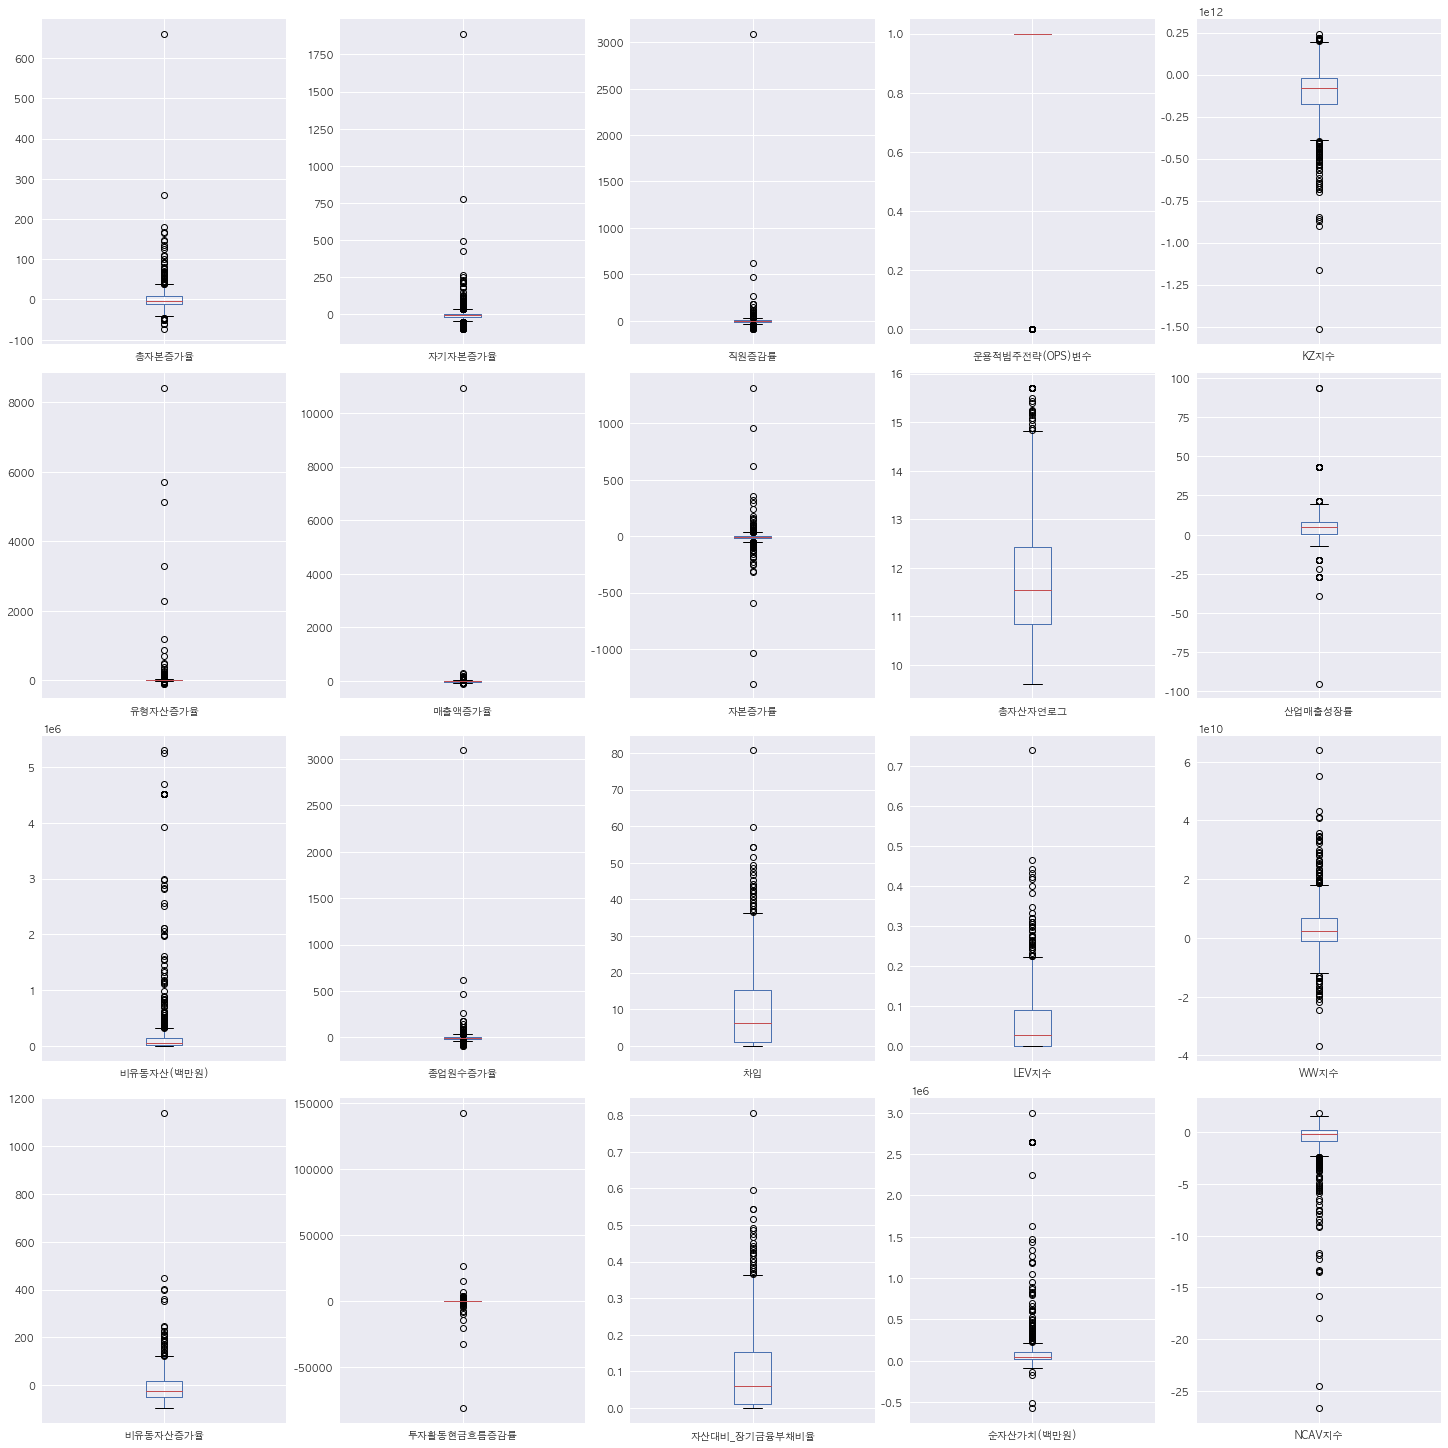

In [169]:
df_부실징후_outlier = df_부실징후_파생변수[list_boxplot_파생]
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 5
nrows = 4

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 20))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

In [170]:
# 상하위 2.5% 이상치 대체
from scipy.stats.mstats import winsorize
for i in list_boxplot_파생:
    df_부실징후_파생변수[i]= winsorize(df_부실징후_파생변수[i], limits=[0.025, 0.025])

In [171]:
# df_부실징후_outlier = df_부실징후_파생변수[list_boxplot_파생]
# %matplotlib inline
# plt.style.use('seaborn')
# warnings.simplefilter(action='ignore', category=FutureWarning)
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams["font.family"] = "AppleGothic"

# ncols = 5
# nrows = 6

# fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

# fig.set_size_inches((20, 10))

# for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
#     df_부실징후_outlier[[col]].boxplot(ax=ax)
    
# plt.show()

### 6. 최종 재무 피쳐 선택

In [172]:
list(df_부실징후_파생변수.columns)

['회사명',
 '거래소코드',
 '회계년도',
 '한계기업여부',
 '이자보상배율(이자비용)',
 '부가가치(백만원)',
 '법인세비용차감전(계속사업)손익(백만원)',
 '인건비(백만원)',
 '금융비용(백만원)',
 '감가상각비(백만원)',
 '매출액총이익률',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '경영자본순이익률',
 '자본금순이익률',
 '매출원가대매출액비율',
 '영업비용대영업수익비율',
 '금융손익비율',
 '금융비용부담률',
 '기업순이익률',
 '인건비대총비용비율',
 '금융비용대총비용비율',
 '이자부담률',
 '지급이자율',
 '차입금평균이자율',
 '유보율',
 '유동자산구성비율',
 '재고자산대유동자산비율',
 '유동자산대비유동자산비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '자기자본배율',
 '유동비율',
 '현금비율',
 '매출채권비율',
 '매입채무대재고자산비율',
 '순운전자본비율',
 '차입금의존도',
 '차입금비율',
 '총자본회전률',
 '자기자본회전률',
 '자본금회전률',
 '타인자본회전률',
 '매입채무회전률',
 '유동자산회전률',
 '당좌자산회전률',
 '재고자산회전률',
 '매출채권회전률',
 '비유동자산회전률',
 '유형자산회전율',
 '순운전자본회전률',
 '운전자본회전률',
 '배당성향',
 '종업원수',
 '사내유보율',
 '사내유보대자기자본비율',
 '평균배당률',
 '자기자본배당률',
 '1주당순자산(원)',
 '장기차입금(요약)(백만원)',
 '자산(*)(요약)(백만원)',
 '당기순이익(손실)(요약)(백만원)',
 '현금및현금성자산(요약)(백만원)',
 '영업활동으로인한현금흐름(간접법)(*)(요약)(백만원)',
 '투자활동으로인한현금흐름(*)(요약)(백만원)',
 '재무활동으로인한현금흐름(*)(요약)(백만원)',
 '유동자산(*)(요약)(백만원)',
 '유동부채(*)(요약)(백만원)',
 '법인세비용차감전순이익(손실)(요약)(백만원)'

In [ ]:
list_col_final = ['회사명', '거래소코드', '회계년도', '한계기업여부', '이자보상배율(이자비용)', '부가가치(백만원)',
    '금융비용(백만원)', '매출액총이익률', '매출액순이익률', '총자본사업이익률', '총자본순이익률', '자기자본순이익률',
    '경영자본순이익률', '자본금순이익률', '매출원가대매출액비율', '영업비용대영업수익비율', '금융손익비율', '금융비용부담률', 
    '기업순이익률', '인건비대총비용비율', '금융비용대총비용비율', '이자부담률', '지급이자율', '차입금평균이자율', '유보율',
    '유동자산구성비율', '재고자산대유동자산비율', '유동자산대비유동자산비율', '자기자본구성비율', '타인자본구성비율', '자기자본배율', 
    '유동비율', '현금비율', '매출채권비율', '매입채무대재고자산비율', '순운전자본비율', '차입금의존도', '차입금비율', '총자본회전률',
    '자기자본회전률', '자본금회전률', '타인자본회전률', '매입채무회전률', '당좌자산회전률', '재고자산회전률',
    '매출채권회전률', '비유동자산회전률', '유형자산회전율', '순운전자본회전률', '사내유보대자기자본비율',
    '자기자본배당률', '배당성향', '이익잉여금(결손금)(요약)(백만원)', '비유동금융부채(요약)(백만원)', '비유동자산증가율',
    '유동금융부채(요약)(백만원)', '외국인_주식분포비율', '장기금융부채(백만원)', '자산대비자본비율', '차입',
    '총자본증가율', '유형자산증가율', '비유동자산(백만원)', '자기자본증가율', '매출액증가율',
    '직원증감률', '자산대비_장기금융부채비율', '투자축소_여부', '직원증감률_여부', '종업원수증가율', '투자활동현금흐름증감률',
    '매출원가축소_여부', '자산매각_여부', '자본증가율_여부', '차입_여부', '사내유보금보유_여부',
    '운용적범주전략(OPS)변수', 'LEV지수', '순자산가치(백만원)', 'KZ지수', '산업매출성장률', 'WW지수', 'NCAV지수','기업생명주기']
#   제외 :  '순이익증가율', '자산대비_장기금융부채비율_증가율', '재무적범주전략(FIN)변수', '배당금축소_여부', 'CL지수'

df_부실징후_파생변수 = df_부실징후_파생변수[list_col_final]

In [174]:
df_부실징후_파생변수

,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,차입_여부,사내유보금보유_여부,운용적범주전략(OPS)변수,LEV지수,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,603.89,7.59,-6.64,-2.77,...,0,0,0,0.000000,57315.0,-8.591876e+10,8.405309,-6.576044e+08,0.001550,1
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,1111.80,14.62,-2.82,-0.52,...,0,0,1,0.078762,253423.0,-4.619692e+10,8.684003,2.632381e+09,0.106379,0
2,디엘(주),000210,2014.0,0,-3.33,494645.17,31419.37,2.11,-4.74,-2.06,...,1,0,1,0.119150,2648892.0,8.205913e+10,-2.139125,1.844954e+09,-1.336562,1
3,일동홀딩스(주),000230,2017.0,1,0.61,20134.11,1550.73,44.23,0.06,0.78,...,0,0,1,0.000232,174057.0,-4.613540e+11,7.191381,6.045934e+08,-0.263390,0
4,(주)대유플러스,000300,2012.0,0,-4.88,28096.06,3110.15,0.91,-4.78,-2.90,...,0,0,0,0.015758,101198.0,-2.580369e+10,5.164151,7.068060e+08,-2.521432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,(주)에이트원,230980,2018.0,1,-0.14,12878.02,4094.78,9.05,-1.56,-1.08,...,0,0,1,0.034893,22545.0,-1.272294e+11,6.732754,-5.899405e+09,-0.068759,1
777,(주)얼라인드제네틱스,238120,2017.0,1,-29.21,2091.01,-294.03,58.33,-31.13,-4.97,...,0,0,1,0.000000,22022.0,-3.992706e+11,7.191381,3.283293e+09,0.446974,0
778,피씨엘(주),241820,2018.0,1,-29.21,-2639.11,-28.40,34.40,-249.62,-45.10,...,0,0,1,0.000000,12676.0,-4.106535e+11,2.340424,2.617107e+10,0.049385,3
779,(주)아스타,246720,2018.0,1,-22.95,-929.19,-333.43,58.33,-202.15,-14.10,...,0,0,0,0.000000,33248.0,-1.545284e+10,2.340424,1.086485e+10,0.227212,0


### 7. 주가데이터 추가

In [175]:
df_기관_2012 = pd.read_csv("./datasets/raw/주가데이터/기관/df_2012_시총_co.csv", index_col=0)
df_기관_2012["거래소코드"] = df_기관_2012["거래소코드"].map(padding)
df_기관_2012["날짜"] = df_기관_2012["날짜"].map(change_year)
df_기관_2012 = df_기관_2012[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_기관_2012.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_기관_2012["날짜"]=2012

df_기관_2013 = pd.read_csv("./datasets/raw/주가데이터/기관/df_2013_시총_co.csv", index_col=0)
df_기관_2013["거래소코드"] = df_기관_2013["거래소코드"].map(padding)
df_기관_2013["날짜"] = df_기관_2013["날짜"].map(change_year)
df_기관_2013 = df_기관_2013[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_기관_2013.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_기관_2013["날짜"]=2013

df_기관_2014 = pd.read_csv("./datasets/raw/주가데이터/기관/df_2014_시총_co.csv", index_col=0)
df_기관_2014["거래소코드"] = df_기관_2014["거래소코드"].map(padding)
df_기관_2014["날짜"] = df_기관_2014["날짜"].map(change_year)
df_기관_2014 = df_기관_2014[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_기관_2014.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_기관_2014["날짜"]=2014

df_기관_2015 = pd.read_csv("./datasets/raw/주가데이터/기관/df_2015_시총_co.csv", index_col=0)
df_기관_2015["거래소코드"] = df_기관_2015["거래소코드"].map(padding)
df_기관_2015["날짜"] = df_기관_2015["날짜"].map(change_year)
df_기관_2015 = df_기관_2015[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_기관_2015.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_기관_2015["날짜"]=2015

df_기관_2016 = pd.read_csv("./datasets/raw/주가데이터/기관/df_2016_시총_co.csv", index_col=0)
df_기관_2016["거래소코드"] = df_기관_2016["거래소코드"].map(padding)
df_기관_2016["날짜"] = df_기관_2016["날짜"].map(change_year)
df_기관_2016 = df_기관_2016[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_기관_2016.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_기관_2016["날짜"]=2016

df_기관_2017 = pd.read_csv("./datasets/raw/주가데이터/기관/df_2017_시총_co.csv", index_col=0)
df_기관_2017["거래소코드"] = df_기관_2017["거래소코드"].map(padding)
df_기관_2017["날짜"] = df_기관_2017["날짜"].map(change_year)
df_기관_2017 = df_기관_2017[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_기관_2017.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_기관_2017["날짜"]=2017

df_기관_2018 = pd.read_csv("./datasets/raw/주가데이터/기관/df_2018_시총_co.csv", index_col=0)
df_기관_2018["거래소코드"] = df_기관_2018["거래소코드"].map(padding)
df_기관_2018["날짜"] = df_기관_2018["날짜"].map(change_year)
df_기관_2018 = df_기관_2018[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_기관_2018.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_기관_2018["날짜"]=2018

df_기관_통합 = pd.concat([df_기관_2012,df_기관_2013,df_기관_2014,df_기관_2015,df_기관_2016,df_기관_2017,df_기관_2018], axis=0)
df_기관_통합.rename(columns={"날짜":"회계년도", "순매수거래량_최종":"순매수거래량_기관", "순매수거래대금 비중_외국인":"순매수거래대금 비중_기관"}, inplace=True)
df_기관_통합

,거래소코드,회계년도,순매수거래량_기관,순매수거래대금 비중_기관
0,138930,2012,-796505.0,-9.127250e-05
6,001460,2012,-1178.0,-4.485817e-05
12,001465,2012,-2.0,-8.968827e-07
13,001040,2012,-649706.0,-3.913720e-03
19,079160,2012,-578719.0,-9.211530e-03
...,...,...,...,...
11663,161570,2018,0.0,4.872490e-06
11664,239340,2018,-1606598.0,-5.375571e-02
11665,009620,2018,0.0,0.000000e+00
11666,019990,2018,-41146.0,-8.320149e-04


In [176]:
df_외국인_2012 = pd.read_csv("./datasets/raw/주가데이터/외국인/df_2012_시총_fo.csv", index_col=0)
df_외국인_2012["거래소코드"] = df_외국인_2012["거래소코드"].map(padding)
df_외국인_2012["날짜"] = df_외국인_2012["날짜"].map(change_year)
df_외국인_2012 = df_외국인_2012[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_외국인_2012.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_외국인_2012["날짜"]=2012

df_외국인_2013 = pd.read_csv("./datasets/raw/주가데이터/외국인/df_2013_시총_fo.csv", index_col=0)
df_외국인_2013["거래소코드"] = df_외국인_2013["거래소코드"].map(padding)
df_외국인_2013["날짜"] = df_외국인_2013["날짜"].map(change_year)
df_외국인_2013 = df_외국인_2013[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_외국인_2013.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_외국인_2013["날짜"]=2013

df_외국인_2014 = pd.read_csv("./datasets/raw/주가데이터/외국인/df_2014_시총_fo.csv", index_col=0)
df_외국인_2014["거래소코드"] = df_외국인_2014["거래소코드"].map(padding)
df_외국인_2014["날짜"] = df_외국인_2014["날짜"].map(change_year)
df_외국인_2014 = df_외국인_2014[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_외국인_2014.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_외국인_2014["날짜"]=2014

df_외국인_2015 = pd.read_csv("./datasets/raw/주가데이터/외국인/df_2015_시총_fo.csv", index_col=0)
df_외국인_2015["거래소코드"] = df_외국인_2015["거래소코드"].map(padding)
df_외국인_2015["날짜"] = df_외국인_2015["날짜"].map(change_year)
df_외국인_2015 = df_외국인_2015[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_외국인_2015.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_외국인_2015["날짜"]=2015

df_외국인_2016 = pd.read_csv("./datasets/raw/주가데이터/외국인/df_2016_시총_fo.csv", index_col=0)
df_외국인_2016["거래소코드"] = df_외국인_2016["거래소코드"].map(padding)
df_외국인_2016["날짜"] = df_외국인_2016["날짜"].map(change_year)
df_외국인_2016 = df_외국인_2016[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_외국인_2016.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_외국인_2016["날짜"]=2016

df_외국인_2017 = pd.read_csv("./datasets/raw/주가데이터/외국인/df_2017_시총_fo.csv", index_col=0)
df_외국인_2017["거래소코드"] = df_외국인_2017["거래소코드"].map(padding)
df_외국인_2017["날짜"] = df_외국인_2017["날짜"].map(change_year)
df_외국인_2017 = df_외국인_2017[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_외국인_2017.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_외국인_2017["날짜"]=2017

df_외국인_2018 = pd.read_csv("./datasets/raw/주가데이터/외국인/df_2018_시총_fo.csv", index_col=0)
df_외국인_2018["거래소코드"] = df_외국인_2018["거래소코드"].map(padding)
df_외국인_2018["날짜"] = df_외국인_2018["날짜"].map(change_year)
df_외국인_2018 = df_외국인_2018[["거래소코드","날짜","순매수거래량_최종","순매수거래대금 비중_외국인"]]
df_외국인_2018.drop_duplicates(['거래소코드'], keep='first', inplace=True)
df_외국인_2018["날짜"]=2018

df_외국인_통합 = pd.concat([df_외국인_2012,df_외국인_2013,df_외국인_2014,df_외국인_2015,df_외국인_2016,df_외국인_2017,df_외국인_2018], axis=0)
df_외국인_통합.rename(columns={"날짜":"회계년도", "순매수거래량_최종":"순매수거래량_외국인"}, inplace=True)
df_외국인_통합

,거래소코드,회계년도,순매수거래량_외국인,순매수거래대금 비중_외국인
0,138930,2012,6971675.0,5.264732e-03
6,001040,2012,480544.0,3.124214e-03
12,079160,2012,245424.0,7.009169e-03
18,011150,2012,52850.0,4.944929e-04
24,097950,2012,478652.0,4.978564e-03
...,...,...,...,...
12211,000325,2018,-391.0,-4.324401e-04
12212,023450,2018,9.0,5.393739e-07
12213,253590,2018,60994.0,3.321575e-04
12214,310200,2018,-607.0,-3.942778e-05


### 8. 최종 데이터 통합

In [177]:
df_부실징후_최종 = pd.merge(df_부실징후_파생변수, df_기관_통합, on=["거래소코드","회계년도"], how = 'left')
df_부실징후_최종 = pd.merge(df_부실징후_최종, df_외국인_통합, on=["거래소코드","회계년도"], how = 'left')
df_부실징후_최종.fillna(0, inplace=True) # 주가데이터 없는건 0으로 대체
df_부실징후_최종

,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,603.89,7.59,-6.64,-2.77,...,57315.0,-8.591876e+10,8.405309,-6.576044e+08,0.001550,1,154.0,0.000010,666080.0,0.001283
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,1111.80,14.62,-2.82,-0.52,...,253423.0,-4.619692e+10,8.684003,2.632381e+09,0.106379,0,28438.0,0.001337,-43268.0,0.000147
2,디엘(주),000210,2014.0,0,-3.33,494645.17,31419.37,2.11,-4.74,-2.06,...,2648892.0,8.205913e+10,-2.139125,1.844954e+09,-1.336562,1,-2124518.0,-0.010160,-122922.0,0.000605
3,일동홀딩스(주),000230,2017.0,1,0.61,20134.11,1550.73,44.23,0.06,0.78,...,174057.0,-4.613540e+11,7.191381,6.045934e+08,-0.263390,0,-854.0,0.000013,-148806.0,-0.001702
4,(주)대유플러스,000300,2012.0,0,-4.88,28096.06,3110.15,0.91,-4.78,-2.90,...,101198.0,-2.580369e+10,5.164151,7.068060e+08,-2.521432,0,-1414659.0,-0.002001,-1238620.0,-0.002065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,(주)에이트원,230980,2018.0,1,-0.14,12878.02,4094.78,9.05,-1.56,-1.08,...,22545.0,-1.272294e+11,6.732754,-5.899405e+09,-0.068759,1,8810.0,0.000218,-192641.0,-0.005370
777,(주)얼라인드제네틱스,238120,2017.0,1,-29.21,2091.01,-294.03,58.33,-31.13,-4.97,...,22022.0,-3.992706e+11,7.191381,3.283293e+09,0.446974,0,30809.0,0.001985,-8713.0,-0.000922
778,피씨엘(주),241820,2018.0,1,-29.21,-2639.11,-28.40,34.40,-249.62,-45.10,...,12676.0,-4.106535e+11,2.340424,2.617107e+10,0.049385,3,0.0,0.000000,-51504.0,-0.001132
779,(주)아스타,246720,2018.0,1,-22.95,-929.19,-333.43,58.33,-202.15,-14.10,...,33248.0,-1.545284e+10,2.340424,1.086485e+10,0.227212,0,0.0,0.000000,-139221.0,-0.001538


In [184]:
print(len(df_부실징후_최종["거래소코드"].unique()))
print(len(df_부실징후_최종[df_부실징후_최종["한계기업여부"]==0]))
print(len(df_부실징후_최종[df_부실징후_최종["한계기업여부"]==1]))

781
219
562


---
## 막간EDA

### 1. 생명주기

In [185]:
len(df_부실징후_최종["회사명"].unique())

781

기업생애주기별 잠재한계기업 수

전체 : 781
각 생명주기 총합 : 781
도입기 : 265
성장기 : 145
성숙기 : 117
쇄신기 : 179
쇠퇴기 : 75


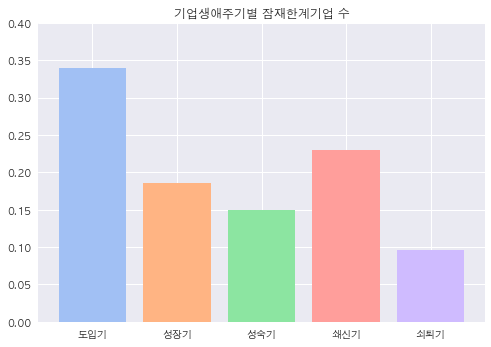

In [209]:
import matplotlib.pyplot as plt
import numpy as np

val_기업 = df_부실징후_최종.shape[0]
print("전체 :",df_부실징후_최종.shape[0])
print("각 생명주기 총합 :", df_부실징후_도입기.shape[0]+df_부실징후_성장기.shape[0]+df_부실징후_성숙기.shape[0]+df_부실징후_쇠퇴기.shape[0]+df_부실징후_쇄신기.shape[0])
print("도입기 :",df_부실징후_도입기.shape[0])
print("성장기 :",df_부실징후_성장기.shape[0])
print("성숙기 :",df_부실징후_성숙기.shape[0])
print("쇄신기 :",df_부실징후_쇄신기.shape[0])
print("쇠퇴기 :",df_부실징후_쇠퇴기.shape[0])

# --------------
x = np.arange(5)
years = ['도입기', '성장기', '성숙기', '쇄신기', '쇠퇴기']
values = [df_부실징후_도입기.shape[0]/val_기업,
        df_부실징후_성장기.shape[0]/val_기업,
        df_부실징후_성숙기.shape[0]/val_기업,
        df_부실징후_쇄신기.shape[0]/val_기업,
        df_부실징후_쇠퇴기.shape[0]/val_기업]

plt.bar(x, values, color=["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF"])
plt.xticks(x, years)
plt.title('기업생애주기별 잠재한계기업 수')
plt.ylim(0,0.4)
plt.show()

기업생명주기별 한계기업

한계기업 수 : 562
도입기 : 207
성장기 : 103
성숙기 : 69
쇄신기 : 126
쇠퇴기 : 57


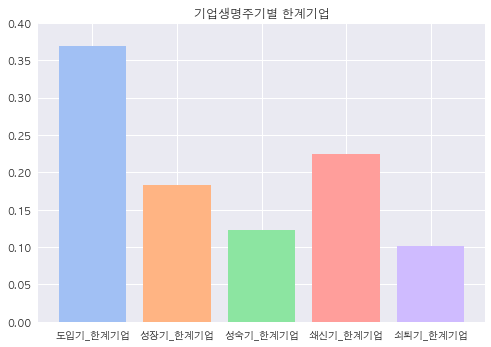

In [210]:
import matplotlib.pyplot as plt
import numpy as np

val_한계기업 = len(df_부실징후_최종[df_부실징후_최종["한계기업여부"]==1])
print("한계기업 수 :", df_부실징후_도입기[df_부실징후_도입기["한계기업여부"]==1].shape[0]+df_부실징후_성장기[df_부실징후_성장기["한계기업여부"]==1].shape[0]+df_부실징후_성숙기[df_부실징후_성숙기["한계기업여부"]==1].shape[0]+df_부실징후_쇄신기[df_부실징후_쇄신기["한계기업여부"]==1].shape[0]+df_부실징후_쇠퇴기[df_부실징후_쇠퇴기["한계기업여부"]==1].shape[0])
print("도입기 :",df_부실징후_도입기[df_부실징후_도입기["한계기업여부"]==1].shape[0])
print("성장기 :",df_부실징후_성장기[df_부실징후_성장기["한계기업여부"]==1].shape[0])
print("성숙기 :",df_부실징후_성숙기[df_부실징후_성숙기["한계기업여부"]==1].shape[0])
print("쇄신기 :",df_부실징후_쇄신기[df_부실징후_쇄신기["한계기업여부"]==1].shape[0])
print("쇠퇴기 :",df_부실징후_쇠퇴기[df_부실징후_쇠퇴기["한계기업여부"]==1].shape[0])

# --------------
x = np.arange(5)
years = ['도입기_한계기업', '성장기_한계기업', '성숙기_한계기업', '쇄신기_한계기업', '쇠퇴기_한계기업']
values = [df_부실징후_도입기[df_부실징후_도입기["한계기업여부"]==1].shape[0]/val_한계기업,
        df_부실징후_성장기[df_부실징후_성장기["한계기업여부"]==1].shape[0]/val_한계기업,
        df_부실징후_성숙기[df_부실징후_성숙기["한계기업여부"]==1].shape[0]/val_한계기업,
        df_부실징후_쇄신기[df_부실징후_쇄신기["한계기업여부"]==1].shape[0]/val_한계기업,
        df_부실징후_쇠퇴기[df_부실징후_쇠퇴기["한계기업여부"]==1].shape[0]/val_한계기업]

plt.bar(x, values, color=["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF"])
plt.xticks(x, years)
plt.title('기업생명주기별 한계기업')
plt.ylim(0,0.4)
plt.show()

기업생명주기별 회생기업

회생기업 수 : 219
도입기 : 58
성장기 : 42
성숙기 : 48
쇄신기 : 53
쇠퇴기 : 18


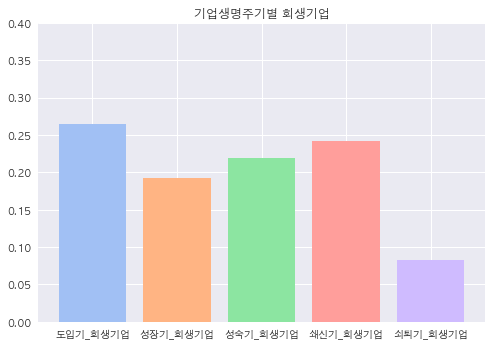

In [211]:
import matplotlib.pyplot as plt
import numpy as np

val_회생기업 = len(df_부실징후_최종[df_부실징후_최종["한계기업여부"]==0])
print("회생기업 수 :", df_부실징후_도입기[df_부실징후_도입기["한계기업여부"]==0].shape[0]+df_부실징후_성장기[df_부실징후_성장기["한계기업여부"]==0].shape[0]+df_부실징후_성숙기[df_부실징후_성숙기["한계기업여부"]==0].shape[0]+df_부실징후_쇄신기[df_부실징후_쇄신기["한계기업여부"]==0].shape[0]+df_부실징후_쇠퇴기[df_부실징후_쇠퇴기["한계기업여부"]==0].shape[0])
print("도입기 :",df_부실징후_도입기[df_부실징후_도입기["한계기업여부"]==0].shape[0])
print("성장기 :",df_부실징후_성장기[df_부실징후_성장기["한계기업여부"]==0].shape[0])
print("성숙기 :",df_부실징후_성숙기[df_부실징후_성숙기["한계기업여부"]==0].shape[0])
print("쇄신기 :",df_부실징후_쇄신기[df_부실징후_쇄신기["한계기업여부"]==0].shape[0])
print("쇠퇴기 :",df_부실징후_쇠퇴기[df_부실징후_쇠퇴기["한계기업여부"]==0].shape[0])

# --------------
x = np.arange(5)
years = ['도입기_회생기업', '성장기_회생기업', '성숙기_회생기업', '쇄신기_회생기업', '쇠퇴기_회생기업']
values = [df_부실징후_도입기[df_부실징후_도입기["한계기업여부"]==0].shape[0]/val_회생기업,
        df_부실징후_성장기[df_부실징후_성장기["한계기업여부"]==0].shape[0]/val_회생기업,
        df_부실징후_성숙기[df_부실징후_성숙기["한계기업여부"]==0].shape[0]/val_회생기업,
        df_부실징후_쇄신기[df_부실징후_쇄신기["한계기업여부"]==0].shape[0]/val_회생기업,
        df_부실징후_쇠퇴기[df_부실징후_쇠퇴기["한계기업여부"]==0].shape[0]/val_회생기업]

plt.bar(x, values, color=["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF"])
plt.xticks(x, years)
plt.title('기업생명주기별 회생기업')
plt.ylim(0,0.4)
plt.show()

### 3. 한계/회생기업 수

전체 데이터 수 : 781
한계기업 데이터 수 : 562
회생기업 데이터 수 : 219


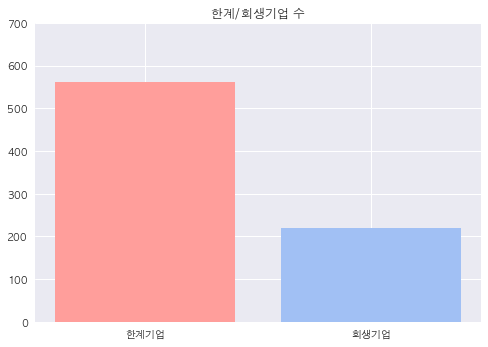

In [212]:
import matplotlib.pyplot as plt
import numpy as np

print("전체 데이터 수 :", df_부실징후_최종.shape[0])
print("한계기업 데이터 수 :", df_부실징후_최종[df_부실징후_최종["한계기업여부"]==1].shape[0])
print("회생기업 데이터 수 :", df_부실징후_최종[df_부실징후_최종["한계기업여부"]==0].shape[0])

# --------------
x = np.arange(2)
years = ['한계기업', '회생기업']
values = [df_부실징후_최종[df_부실징후_최종["한계기업여부"]==1].shape[0], df_부실징후_최종[df_부실징후_최종["한계기업여부"]==0].shape[0]]

plt.bar(x, values, color=["#FF9E9B", "#A1C0F4"])
plt.xticks(x, years)
plt.title('한계/회생기업 수')
plt.ylim(0,700)
plt.show()

### 4. 마지막 결측치 확인

### 4. 마지막 결측치 확인

In [585]:
df_부실징후_최종.isna().sum().to_dict()

{'회사명': 0,
 '거래소코드': 0,
 '회계년도': 0,
 '한계기업여부': 0,
 '이자보상배율(이자비용)': 0,
 '부가가치(백만원)': 0,
 '금융비용(백만원)': 0,
 '매출액총이익률': 0,
 '매출액순이익률': 0,
 '총자본사업이익률': 0,
 '총자본순이익률': 0,
 '자기자본순이익률': 0,
 '경영자본순이익률': 0,
 '자본금순이익률': 0,
 '매출원가대매출액비율': 0,
 '영업비용대영업수익비율': 0,
 '금융손익비율': 0,
 '금융비용부담률': 0,
 '기업순이익률': 0,
 '인건비대총비용비율': 0,
 '금융비용대총비용비율': 0,
 '이자부담률': 0,
 '지급이자율': 0,
 '차입금평균이자율': 0,
 '유보율': 0,
 '유동자산구성비율': 0,
 '재고자산대유동자산비율': 0,
 '유동자산대비유동자산비율': 0,
 '자기자본구성비율': 0,
 '타인자본구성비율': 0,
 '자기자본배율': 0,
 '유동비율': 0,
 '현금비율': 0,
 '매출채권비율': 0,
 '매입채무대재고자산비율': 0,
 '순운전자본비율': 0,
 '차입금의존도': 0,
 '차입금비율': 0,
 '총자본회전률': 0,
 '자기자본회전률': 0,
 '자본금회전률': 0,
 '타인자본회전률': 0,
 '매입채무회전률': 0,
 '당좌자산회전률': 0,
 '재고자산회전률': 0,
 '매출채권회전률': 0,
 '비유동자산회전률': 0,
 '유형자산회전율': 0,
 '순운전자본회전률': 0,
 '사내유보대자기자본비율': 0,
 '자기자본배당률': 0,
 '배당성향': 0,
 '이익잉여금(결손금)(요약)(백만원)': 0,
 '비유동금융부채(요약)(백만원)': 0,
 '비유동자산증가율': 0,
 '유동금융부채(요약)(백만원)': 0,
 '외국인_주식분포비율': 0,
 '장기금융부채(백만원)': 0,
 '자산대비자본비율': 0,
 '차입': 0,
 '총자본증가율': 0,
 '유형자산증가율': 0,
 '비유동자산(백만원)': 0,
 '자기자본증가율

### 5. 마지막 inf값 확인

In [586]:
list_inf = list()
list_재무_columns = list(df_부실징후_최종.columns)
# df_부실징후_최종.select_dtypes(include="object")
list_재무_columns.remove("회사명")
list_재무_columns.remove("거래소코드")
list_재무_columns.remove("회계년도")

# 1) inf값 있는 기업 리스트로 확인
for i in list_재무_columns:
    if len(df_부실징후_최종[np.isinf(abs(df_부실징후_최종[i]))]) > 0:
        list_inf.append(i)
list_inf

[]

In [587]:
df_부실징후_최종.to_csv("./datasets/부실징후_전처리끝.csv")

In [7]:
df_부실징후_최종 = pd.read_csv("./datasets/부실징후_전처리끝.csv", index_col=0)
df_부실징후_최종["거래소코드"] = df_부실징후_최종["거래소코드"].map(padding)
df_부실징후_최종

,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,603.89,7.59,-6.64,-2.77,...,57315.0,-8.591876e+10,8.405309,-6.576044e+08,0.001550,1,154.0,0.000010,666080.0,0.001283
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,1111.80,14.62,-2.82,-0.52,...,253423.0,-4.619692e+10,8.684003,2.632381e+09,0.106379,0,28438.0,0.001337,-43268.0,0.000147
2,디엘(주),000210,2014.0,0,-3.33,494645.17,31419.37,2.11,-4.74,-2.06,...,2648892.0,8.205913e+10,-2.139125,1.844954e+09,-1.336562,1,-2124518.0,-0.010160,-122922.0,0.000605
3,일동홀딩스(주),000230,2017.0,1,0.61,20134.11,1550.73,44.23,0.06,0.78,...,174057.0,-4.613540e+11,7.191381,6.045934e+08,-0.263390,0,-854.0,0.000013,-148806.0,-0.001702
4,(주)대유플러스,000300,2012.0,0,-4.88,28096.06,3110.15,0.91,-4.78,-2.90,...,101198.0,-2.580369e+10,5.164151,7.068060e+08,-2.521432,0,-1414659.0,-0.002001,-1238620.0,-0.002065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,(주)에이트원,230980,2018.0,1,-0.14,12878.02,4094.78,9.05,-1.56,-1.08,...,22545.0,-1.272294e+11,6.732754,-5.899405e+09,-0.068759,1,8810.0,0.000218,-192641.0,-0.005370
777,(주)얼라인드제네틱스,238120,2017.0,1,-29.21,2091.01,-294.03,58.33,-31.13,-4.97,...,22022.0,-3.992706e+11,7.191381,3.283293e+09,0.446974,0,30809.0,0.001985,-8713.0,-0.000922
778,피씨엘(주),241820,2018.0,1,-29.21,-2639.11,-28.40,34.40,-249.62,-45.10,...,12676.0,-4.106535e+11,2.340424,2.617107e+10,0.049385,3,0.0,0.000000,-51504.0,-0.001132
779,(주)아스타,246720,2018.0,1,-22.95,-929.19,-333.43,58.33,-202.15,-14.10,...,33248.0,-1.545284e+10,2.340424,1.086485e+10,0.227212,0,0.0,0.000000,-139221.0,-0.001538


In [ ]:
df_부실징후_최종

> # 전처리끝 :)